# functions, classes, libraries

In [135]:
class patient:
    def __init__(self, filepath, input_fileName, lengthPtID):
        ptID = input_fileName[:lengthPtID]
        self.ptID = ptID
        self.fileName = input_fileName
        #find the demographics in one of two sheets
        # directory = os.getcwd()
        file_adds = filepath + '/' + input_fileName
        file = pd.ExcelFile(file_adds)
        sheet_Names = file.sheet_names
        if 'Cancer_Registery Data' in sheet_Names:
            #do the thing for getting patient info
            df = pd.read_excel(input_fileName, sheet_name= 'Cancer_Registery Data')
            self.ptDemographics = df
            self.amyloid_status = df.at[0,"Amyloid Status"]
            self.survival = df.at[0,"Survival Time (Months)"]
            self.ageDx = df.at[0,"Age At Diagnosis"] 
            self.sex = df.at[0,"Gender Cancer Registry"]
            self.vitalStatus = df.at[0, "Vital Status Cancer Registry"]
            self.dx = df.at[0, "Histology"]

        elif '30 Cerner Patients ' in sheet_Names:
            #do the thing for getting patient info
            df = pd.read_excel(input_fileName, sheet_name= '30 Cerner Patients ')
            self.ptDemographics = df
            self.amyloid_status = df.at[0,"Amyloid Status"]
            self.survival = df.at[0,"Survival Time (months)"]
            self.ageDx = df.at[0,"Age At Diagnosis"] 
            self.sex = df.at[0,"Gender Cerner"]
            self.vitalStatus = df.at[0, "Vital Status (Cerner)"]
            self.dx = df.at[0, "Primary Site"]


        else: print("no patient identifying information")

        #now iterate through the list of sheets to import the patient data 
        if 'Labs' in sheet_Names:
            self.labsData = pd.read_excel(input_fileName, sheet_name= 'Labs')
        else: self.labsData = False
        
        if 'amyloid in subject' in sheet_Names:
            self.echoData = pd.read_excel(input_fileName, sheet_name= 'amyloid in subject')
        else: self.echoData = False

        if 'ChemoTx' in sheet_Names:
            self.ChemoTx = pd.read_excel(input_fileName, sheet_name= 'ChemoTx')
        else: self.ChemoTx = False

        if 'Hematologic Tx' in sheet_Names:
            self.HemeTx = pd.read_excel(input_fileName, sheet_name= 'Hematologic Tx')
        else: self.HemeTx = False

        if 'Immuno Tx' in sheet_Names:
            self.ImmunoTx = pd.read_excel(input_fileName, sheet_name= 'Immuno Tx')
        else: self.ImmunoTx = False

        if 'Radiation Tx' in sheet_Names:
            self.RadTx = pd.read_excel(input_fileName, sheet_name= 'Radiation Tx')
        else: self.RadTx = False

        if 'Other Tx' in sheet_Names:
            self.OtherTx = pd.read_excel(input_fileName, sheet_name = 'Other Tx')
        else: self.OtherTx = False

        if 'Physican_Notes' in sheet_Names:
            self.MDnotes = pd.read_excel(input_fileName, sheet_name= 'Physican_Notes')
        else: self.MDnotes = False

        #to create a callable list of treatments recieved for which we have data
        tx_sheets = ['ChemoTx', 'Hematologic Tx', 'Immuno Tx']
        treatmentTypesRecieved = []

        for possible in tx_sheets:
        
            if possible in sheet_Names:
                treatmentTypesRecieved.append(possible)
        self.txRecieved = treatmentTypesRecieved

def FilterList(list, keyWords_primary, keyWords_secondary = ["Empty"], omit = ["Empty"]):
    #store the filtered result
    filteredList = []

    if keyWords_secondary == ["Empty"]:
        for c in list: #loop the columns
            for buzz in keyWords_primary: #loop the key words
                if buzz in c: #if the column contains the key word
                    filteredList.append(c) #add the column to the list
                    break #do not continue testing primary key words for this column
    
    else: 
        for c in list: #loop the columns
            for buzz in keyWords_primary: #loop the key words
                if buzz in c: #if the column contains the key word
                    for secondary in keyWords_secondary:
                        if secondary in c:
                            filteredList.append(c) #add the column to the list
                            break #has been added to list based on passing the seondary 
                        else:
                            pass
                    break #do not continue to check primary key words for this column
                else:
                    pass
                
    if omit != ["Empty"]: 
        for x in omit: 
            for a in filteredList:
                if x in a:
                    filteredList.remove(a)
    
    #by iterating through the column names first, we keep the order of the columns

    return filteredList 

#createBinary function
#createBinary function
def createBinary(df, listOfLabs, timeColumn): 
    #list of labs needs to match exactly.  
    # Filter the dataframe before inputting
    #for boolean
    df_toBool = df[listOfLabs]
    df_bool = df_toBool.notna()
    df_asint = df_bool.astype(int)
    #add column back for time 
    df_asint.insert(0, timeColumn, df[timeColumn])
    return df_asint

def createBinarySum(df, listOfLabs, timeColumn, defaxis):
    #list of labs needs to match exactly.  
    # Filter the dataframe before inputting
    #for boolean
    df_toBool = df[listOfLabs]
    df_bool = df_toBool.notna()
    df_asint = df_bool.astype(int)
    #add column back for time 
    # df_asint.insert(0, timeColumn, df[timeColumn])
    #sum across the row
    #defaxis = 0 means the columns are preserved 
    #defaxis =1 means the rows are preserved
    df_new_sum = df_asint.sum(axis = defaxis)
    return df_new_sum

#get list of patients from directory 
def GetListOfPatientsFromDirectory (directory, fileExtension, fileCommon, lengthID):
    #get the directory 
    listFileNames = os.listdir(directory)
    outputList = []
    #loop through list of fileNames: 
    for file in listFileNames:
        #id if the file is patient data
        if fileCommon in file and file.endswith(fileExtension):
            #trim the file name to the pt ID
            ptID = file[:lengthID]
            outputList.append(ptID)
    return outputList

def GetListofPTfiles(directory, fileExtension, fileCommon):
    listFileNames = os.listdir(directory)
    outListFiles = []
    #loop through file names
    for file in listFileNames:
        if fileCommon in file and file.endswith(fileExtension):
            outListFiles.append(file)
    return outListFiles

def getNormalValue(filteredDataColumn, skipValue = 6666):
    test = filteredDataColumn
    #input is a series
    
    for entry in test:
        if entry != skipValue:
            outputValue = entry
                # print("this is output: ", outputValue)
                #set x to True
            break
        else:
            # print("entry is blank")
            pass
    return outputValue

#get amyloid status dictionary inputs, sort ptIDs to lists based on amyloid status 
def getListSortedByAmyloid(amyloidDictionary, listPositive, listNegative, listOther,
                           statusPositive = "yes", statusNegative = "no"):
    for pt in amyloidDictionary.keys():
        status = amyloidDictionary[pt]
        if status == statusPositive:
            listPositive.append(pt)
        elif status == statusNegative:
            listNegative.append(pt)
        else:
            listOther.append(pt)
    #does not check for double listed patient IDs

#function for masking a dataframe 
def patientSectionOfFrame(start_frame, sheet_name, column_toMask, ptID):
    #ptID is a row parameter in the column_toMask
    df_use = start_frame #copy of the frame

    #first check if sheet has the column of interest
    data_top = list(start_frame.columns) #returns the headers as a list

    #determine of the sheet contains the column of interest
    if data_top.count(column_toMask) > 0: 
        #if true, now find if the patient is present
        searchForPt = start_frame[column_toMask].str.startswith(ptID).sum() #returns the number of instances of the patient
        if searchForPt > 0:
            #patient is present 
            #mask the data for the patient
            df_clean = df_use.dropna(subset= [column_toMask]) #removing NA 
            mask = df_clean[column_toMask].str.startswith(ptID) #masking for the rows where the patient has data
            df_sub_tosave = df_clean[mask] #output dataframe filtered for the patient
            return df_sub_tosave
        else:
            #the patient isn't present
            # return print("The patient " + ptID + " is not in " + sheet_name)
            pass
    else:
        #the column of interest isn't present
        # return print("The column " + column_toMask + " is not in the sheet " + sheet_name)
        pass

#make folder path for data
def makeFolderPathForData(parent_dir, folderName_header, folderName_common, folderName_suffix):
    #makes a new directory for your files
    #returns the folder name for use in other functions
    folderName = folderName_header + folderName_common + folderName_suffix
    path = os.path.join(parent_dir,folderName)
    if not os.path.exists(path):
        os.mkdir(path)
    return folderName

#to excel function
def outputToExcel(df_data, fileName_header, fileName_Common, fileName_suffix,
                  parent_dir, folderName, sheetName):
    fileName = fileName_header + fileName_Common + fileName_suffix
    outfile_extension = '.xlsx'
    outfile_boxplts = fileName + outfile_extension
    path_out= os.path.join(parent_dir, folderName, outfile_boxplts)

    if os.path.exists(path_out):
            #if old sheet
            with pd.ExcelWriter(path_out, mode = 'a', if_sheet_exists = 'overlay') as writer:
                    df_data.to_excel(writer, sheet_name = sheetName, index = True)
    else: 
            #new sheet
            with pd.ExcelWriter(path_out) as writer:
                    df_data.to_excel(writer, sheet_name = sheetName, index = True) #if new sheet

def outputFiguresPath(fileName_header, fileName_mid, fileName_suff, parent_dir, folderName):
        fileName_header = str(fileName_header)
        fileName_mid = str(fileName_mid)
        fileName_suff = str(fileName_suff)

        #cleaning the input to prevent addition of / to the directory
        fileName_header = fileName_header.replace("/", "-")
        fileName_mid = fileName_mid.replace("/", "-")
        fileName_suff = fileName_suff.replace("/", "-")

        fileName = fileName_header + fileName_mid +fileName_suff
        out_filename = fileName + '.tif'
        new_filepath = os.path.join(parent_dir, folderName, out_filename)
        #the output path can be used to save the figure
        return new_filepath
        # plt.savefig(new_filepath, bbox_inches = 'tight')

In [136]:
#libraries and dirrectory 
# import missingno as msno
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit


# directory and data import

In [137]:
mpl.rcParams['figure.dpi'] = 150

In [138]:
#location of original data
starting_directory = os.getcwd()

# new_dirrectory = 'C:/Users/maega/Documents/3000 PhD/3300_BEAT Labs/Projects/Cardiac-Amyloidosis-Multiple-Myeloma/012 Processed Data/data-2024-06-05'
# # new_dirrectory = '/blue/ferrallm/mcremer/CardiacAmyloidosisMultipleMyeloma/012 Processed Data'

# machine_directory = 'C:/Users/mcremer' #the C and path to the project folder
machine_directory = 'C:/Users/maega' #when working from home machine
storage_directory = 'UFL Dropbox/Maegan Cremer/research-share/Maegan/Projects' #Local, HPG, or dropbox
project_directory = 'Cardiac-Amyloidosis-Multiple-Myeloma' #project folder
project_lv2_directory = '012 Processed Data/data-2024-06-05' #deeper part of project folder

path = os.path.join(machine_directory, storage_directory, 
                    project_directory, project_lv2_directory)

new_dirrectory = path

os.chdir(new_dirrectory)

In [139]:
#updates to directory management
storage_directory = 'UFL Dropbox/Maegan Cremer/research-share/Maegan/Projects' #Local, HPG, or dropbox
project_directory = 'Cardiac-Amyloidosis-Multiple-Myeloma' #project folder
project_lv2_directory = '013 Analyzed Data outputs' #deeper part of project folder

path = os.path.join(machine_directory, storage_directory, 
                    project_directory, project_lv2_directory)

# parent_dir = path
outputDir = path

In [140]:
folderNameHeader = "ALvsEchoVal_"
folderNameCommon = "2024-08-30_"
folderNameSuffix = "v1"

# fileNameHeader_Known = "AL_KnownPts_"
# fileNameHeader_Unknown = "AL_UnknownPts_"
# fileNameHeader_Pos = "AL_PosPts_"
# fileNameHeader_Neg = "AL_NegPts_"
fileNameHeader_all = "ALKnownPts_"
fileNameCommon = "ALvsEchoVal_"
fileNameSuffix = "2024-08-30_v1"

folder_data_out = makeFolderPathForData(parent_dir=outputDir, folderName_header=folderNameHeader, 
                                        folderName_common=folderNameCommon, folderName_suffix=folderNameSuffix)
# outputToExcel(*, fileName_header=fileNameHeader, fileName_Common= fileNameCommon, 
#               fileName_suffix= fileNameSuffix, folderName = folder_data_out, sheetName= *)

# fig_file_out = outputFiguresPath(fileName_header=fileNameHeader, fileName_mid=**, 
#                                  fileName_suff= fileNameSuffix, parent_dir=outputDir, folderName=folder_data_out)

folderNameOut = folder_data_out

## collecting data into objects

In [141]:
#importing patient data as dictionaries of dataframes
ptID_test = "E-01"

#build a dictionary of patients and their values 
ptFiles = GetListofPTfiles(new_dirrectory, '.xlsx', 'data')

patientDictAmyloid = {}
patientDictSurvival = {}
patientDictLabs = {}
patientDictEcho = {}
patientDictNotes = {}
patientDictDx = {}
patientDictVitalStatus = {}
patientDictSex = {}
patientDictAge = {}
patientDictChemo = {}
patientDictImmuno = {}
patientDictHeme = {}
patientDictRad = {}
patientDictOther = {}

#loop through the listOfPatients 
for file in ptFiles: 
    pt = patient(new_dirrectory, file, 4)
    patientDictAmyloid[pt.ptID] = pt.amyloid_status
    patientDictSurvival[pt.ptID] = pt.survival
    patientDictLabs[pt.ptID] = pt.labsData
    patientDictEcho[pt.ptID] = pt.echoData
    patientDictNotes[pt.ptID] = pt.MDnotes
    patientDictDx[pt.ptID] = pt.dx
    patientDictVitalStatus[pt.ptID] = pt.vitalStatus
    patientDictSex[pt.ptID] = pt.sex
    patientDictAge[pt.ptID] = pt.ageDx
    patientDictChemo[pt.ptID] = pt.ChemoTx
    patientDictImmuno[pt.ptID] = pt.ImmunoTx
    patientDictHeme[pt.ptID] = pt.HemeTx
    patientDictRad[pt.ptID] = pt.RadTx
    patientDictOther[pt.ptID] = pt.OtherTx
    

#calling patient to test 
ptLabsTest = patientDictLabs[ptID_test]

## getting list by amyloid status

In [142]:
#list of patients by amyloid status 

listPositive = []
listNegative = []
listOther = []

getListSortedByAmyloid(patientDictAmyloid, listPositive= listPositive,
                       listNegative=listNegative, listOther=listOther)

#first make a copy of the list
listALKnown = listPositive.copy()
#add the negative patients to the list of positive patients
listALKnown.extend(listNegative) 

## collecting echo values

In [143]:
penalty_echo = -100

In [144]:
#list of columns of interest
echoColumnsOfInterest = ["1st_EF(avg%)", "1st_Diastolic grade", "1st_BSA", "1st_PWT(cm)",
                         "1st_IVS(cm)", "1st_lvid(cm)", "1st_LA_dimension (cm)","1st_Lvmass",
                         "1st_LVMI","1st_RWT", "1st_LA_grade", "1st_mv_grade", "1st_AV_grade",
                         "1st_rvsp(mmHg)", "1st_LVH", "1stGLS", "1stGLSreported", "use1stGLS",
                         "1st_outerLS", "1st_midLS", "1st_innerLS", "1st_echoOSH"]

dictOfEchoDataAll = {}

EchoTimeColumn ='time from diagnosis to first echo (months)'

PatientCounter = 0
for pt in (patientDictEcho.keys()):
    #to collect and filter the patient labs into a dictionary
    df_Echo = patientDictEcho[pt]

    orig_columns = df_Echo.columns

    #filter the patient labs
    columnNames = FilterList(orig_columns, keyWords_primary = echoColumnsOfInterest)
    
    testNames = [EchoTimeColumn]
    testNames.extend(columnNames) #addition of time label


    ptEcho_results= df_Echo[testNames] #new data frame of just results

    #replacing string with a penalty value
    ptEcho_results = ptEcho_results.applymap(lambda x: penalty_echo if isinstance(x, str) else x)
    ptEcho_results = ptEcho_results.applymap(lambda x: penalty_echo if isinstance(x, str) else x)

    current_indices = ptEcho_results.index
    new_indices = ['Echo ' + str(idx) for idx in current_indices]
    ptEcho_results.index = new_indices

    #add the appropriate index
    ptEcho_results.insert(0, "DeID", [pt])
    ptEcho_results = ptEcho_results.set_index('DeID')
    ptEcho_results = ptEcho_results.fillna(value = penalty_echo)

    dictOfEchoDataAll[pt] = ptEcho_results

    if PatientCounter == 0: 
        #create dataframe
        df_all_EchoTest = ptEcho_results.copy()
    if PatientCounter > 0: 
        df_all_EchoTest = df_all_EchoTest._append(ptEcho_results)
    PatientCounter = PatientCounter + 1



C:\Users\maega\AppData\Local\Temp\ipykernel_73592\297853806.py:29: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ptEcho_results = ptEcho_results.applymap(lambda x: penalty_echo if isinstance(x, str) else x)
C:\Users\maega\AppData\Local\Temp\ipykernel_73592\297853806.py:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ptEcho_results = ptEcho_results.applymap(lambda x: penalty_echo if isinstance(x, str) else x)
C:\Users\maega\AppData\Local\Temp\ipykernel_73592\297853806.py:29: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ptEcho_results = ptEcho_results.applymap(lambda x: penalty_echo if isinstance(x, str) else x)
C:\Users\maega\AppData\Local\Temp\ipykernel_73592\297853806.py:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ptEcho_results = ptEcho_results.applymap(lambda x: penalty_echo if isinstance(x, str) else x)
C:\Users\maega\AppDa

In [145]:
#collecting only those which are AL +/- 
df_ALKnown_Echo = df_all_EchoTest.loc[listALKnown]
df_ALPositive_Echo = df_all_EchoTest.loc[listPositive]
df_ALNegative_Echo = df_all_EchoTest.loc[listNegative]
df_ALOther_Echo = df_all_EchoTest.loc[listOther]

# outputToExcel(df_data = df_ALKnown_Echo, fileName_header= "AL-KnownPts", fileName_Common= outputSheet_common, fileName_suffix= outputSheet_Suffix,
#             parent_dir= outputDir, folderName=folderNameOut, sheetName= "Echos")
# outputToExcel(df_data = df_ALOther_Echo, fileName_header= "AL-UnknownPts", fileName_Common= outputSheet_common, fileName_suffix= outputSheet_Suffix,
#             parent_dir= outputDir, folderName=folderNameOut, sheetName= "Echos")

# plotting echo values grouped by amyloid status

In [146]:
# i = 0
# for item in echoColumnsOfInterest:
#     #addition of a way to remove the missing or penalty values... penalty = -1

#     dataPostive = df_ALPositive_Echo.loc[df_ALPositive_Echo[item] > penalty_echo].dropna(axis = 'index')
#     dataNegative = df_ALNegative_Echo.loc[df_ALNegative_Echo[item] > penalty_echo].dropna(axis = 'index')

#     fig, ax = plt.subplots()
#     ax.hist(dataPostive[item], color = "red", alpha =0.5)
#     ax.hist(dataNegative[item], color = "blue", alpha = 0.5)
#     ax.set_xlabel(item)
#     ax.set_ylabel("Number of Patients with Value of " + item)
#     amyloidpositive_patch = mpatches.Patch(color = 'red', alpha = 0.5, label = "Amyloid Positive")
#     amyloidnegative_patch = mpatches.Patch(color = "blue", alpha = 0.5, label = "Amyloid Negative")
#     ax.legend(handles = [amyloidpositive_patch, amyloidnegative_patch])
#     fig.suptitle("Echo value " + item + " by Amyloid status")

#     fig_file_out = outputFiguresPath(fileName_header=fileNameHeader_all, fileName_mid= str(i) + "_fig_" , 
#                                  fileName_suff= fileNameSuffix, parent_dir=outputDir, folderName=folder_data_out)
#     fig.savefig(fig_file_out)
#     i = i+1

# Alternate echo columns

In [147]:


#list of columns of interest
echoColumnsOfInterest = ['1st_EF(avg%)',
       '1st_Diastolic grade', '1st_BSA', '1st_PWT(cm)', '1st_IVS(cm)',
       '1st_lvid(cm)', '1st_LA_dimension (cm)', '1st_Lvmass', '1st_LVMI',
       '1st_RWT', '1st_LA_grade', '1st_mv_grade', '1st_AV_grade',
       '1st_rvsp(mmHg)', '1st_LVH', '1stGLS', '1stGLSreported', 'use1stGLS',
       '1st_outerLS', '1st_midLS', '1st_innerLS', '1st_echoOSH',
       'time from diagnosis to final echo (months)', 'fin_EF(avg%)',
       'fin_Diastolic grade', 'fin_BSA', 'fin_PWT(cm)', 'fin_IVS(cm)',
       'fin_lvid(cm)', 'fin_LA_dimension (cm)', 'fin_Lvmass', 'fin_LVMI',
       'fin_RWT', '1st_LA_enlargement', 'fin_mv_disease', 'fin_av_disease',
       'fin_rvsp(mmHg)', 'fin_LVH', 'fin_GLS%', 'fin_GLS_reported',
       'use_fin_GLS', 'fin_outer_LS', 'fin_mid_LS', 'fin_inner_LS',
       'fin_echo_OSH', 'time from dagnosis to MRI (months)', 'MRI_EF(avg%)',
       'MRI_PWT(cm)', 'MRI_IVS(cm)', 'MRI_lvid(cm)', 'MRI_LA_dimension (cm)',
       'MRI_LA_enlargement', 'MRI_LVH', 'MRI OSH']
dictOfEchoDataAll = {}

EchoTimeColumn ='time from diagnosis to first echo (months)'

PatientCounter = 0
for pt in (patientDictEcho.keys()):
    #to collect and filter the patient labs into a dictionary
    df_Echo = patientDictEcho[pt]

    orig_columns = df_Echo.columns

    #filter the patient labs
    columnNames = FilterList(orig_columns, keyWords_primary = echoColumnsOfInterest)
    
    testNames = [EchoTimeColumn]
    testNames.extend(columnNames) #addition of time label


    ptEcho_results= df_Echo[testNames] #new data frame of just results

    #replacing string with a penalty value
    ptEcho_results = ptEcho_results.applymap(lambda x: penalty_echo if isinstance(x, str) else x)

    current_indices = ptEcho_results.index
    new_indices = ['Echo ' + str(idx) for idx in current_indices]
    ptEcho_results.index = new_indices

    #add the appropriate index
    ptEcho_results.insert(0, "DeID", [pt])
    ptEcho_results = ptEcho_results.set_index('DeID')
    ptEcho_results = ptEcho_results.fillna(value = penalty_echo)

    dictOfEchoDataAll[pt] = ptEcho_results

    if PatientCounter == 0: 
        #create dataframe
        df_all_EchoTest = ptEcho_results.copy()
    if PatientCounter > 0: 
        df_all_EchoTest = df_all_EchoTest._append(ptEcho_results)
    PatientCounter = PatientCounter + 1



C:\Users\maega\AppData\Local\Temp\ipykernel_73592\621187707.py:38: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ptEcho_results = ptEcho_results.applymap(lambda x: penalty_echo if isinstance(x, str) else x)
C:\Users\maega\AppData\Local\Temp\ipykernel_73592\621187707.py:38: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ptEcho_results = ptEcho_results.applymap(lambda x: penalty_echo if isinstance(x, str) else x)
C:\Users\maega\AppData\Local\Temp\ipykernel_73592\621187707.py:38: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ptEcho_results = ptEcho_results.applymap(lambda x: penalty_echo if isinstance(x, str) else x)
C:\Users\maega\AppData\Local\Temp\ipykernel_73592\621187707.py:38: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ptEcho_results = ptEcho_results.applymap(lambda x: penalty_echo if isinstance(x, str) else x)
C:\Users\maega\AppDa

In [148]:
#collecting only those which are AL +/- 
df_ALKnown_Echo = df_all_EchoTest.loc[listALKnown]
df_ALPositive_Echo = df_all_EchoTest.loc[listPositive]
df_ALNegative_Echo = df_all_EchoTest.loc[listNegative]
df_ALOther_Echo = df_all_EchoTest.loc[listOther]

# outputToExcel(df_data = df_ALKnown_Echo, fileName_header= "AL-KnownPts", fileName_Common= outputSheet_common, fileName_suffix= outputSheet_Suffix,
#             parent_dir= outputDir, folderName=folderNameOut, sheetName= "Echos")
# outputToExcel(df_data = df_ALOther_Echo, fileName_header= "AL-UnknownPts", fileName_Common= outputSheet_common, fileName_suffix= outputSheet_Suffix,
#             parent_dir= outputDir, folderName=folderNameOut, sheetName= "Echos")

In [149]:
print(echoColumnsOfInterest)

['1st_EF(avg%)', '1st_Diastolic grade', '1st_BSA', '1st_PWT(cm)', '1st_IVS(cm)', '1st_lvid(cm)', '1st_LA_dimension (cm)', '1st_Lvmass', '1st_LVMI', '1st_RWT', '1st_LA_grade', '1st_mv_grade', '1st_AV_grade', '1st_rvsp(mmHg)', '1st_LVH', '1stGLS', '1stGLSreported', 'use1stGLS', '1st_outerLS', '1st_midLS', '1st_innerLS', '1st_echoOSH', 'time from diagnosis to final echo (months)', 'fin_EF(avg%)', 'fin_Diastolic grade', 'fin_BSA', 'fin_PWT(cm)', 'fin_IVS(cm)', 'fin_lvid(cm)', 'fin_LA_dimension (cm)', 'fin_Lvmass', 'fin_LVMI', 'fin_RWT', '1st_LA_enlargement', 'fin_mv_disease', 'fin_av_disease', 'fin_rvsp(mmHg)', 'fin_LVH', 'fin_GLS%', 'fin_GLS_reported', 'use_fin_GLS', 'fin_outer_LS', 'fin_mid_LS', 'fin_inner_LS', 'fin_echo_OSH', 'time from dagnosis to MRI (months)', 'MRI_EF(avg%)', 'MRI_PWT(cm)', 'MRI_IVS(cm)', 'MRI_lvid(cm)', 'MRI_LA_dimension (cm)', 'MRI_LA_enlargement', 'MRI_LVH', 'MRI OSH']


C:\Users\maega\AppData\Local\Temp\ipykernel_73592\1636515647.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


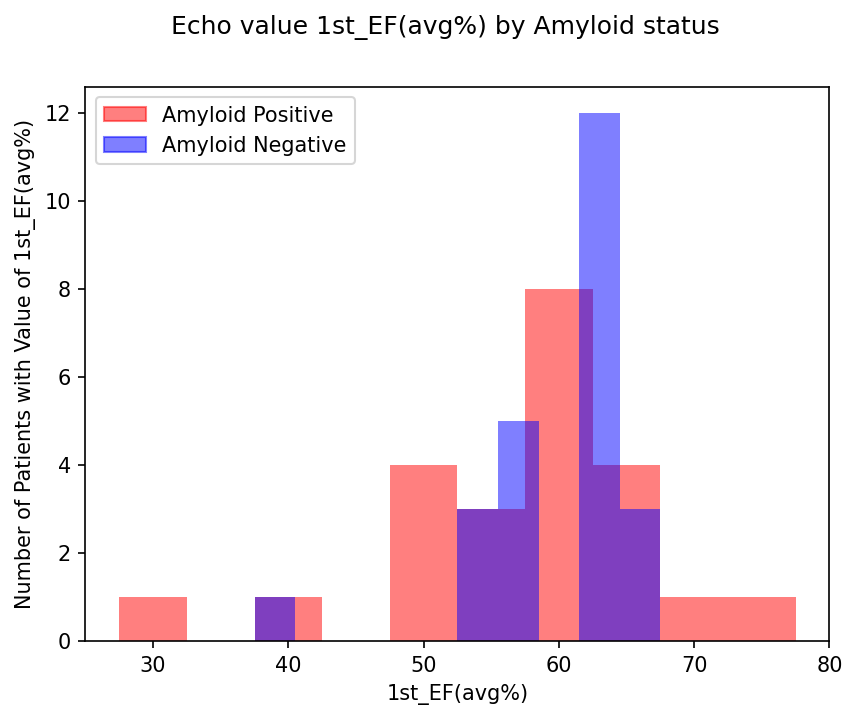

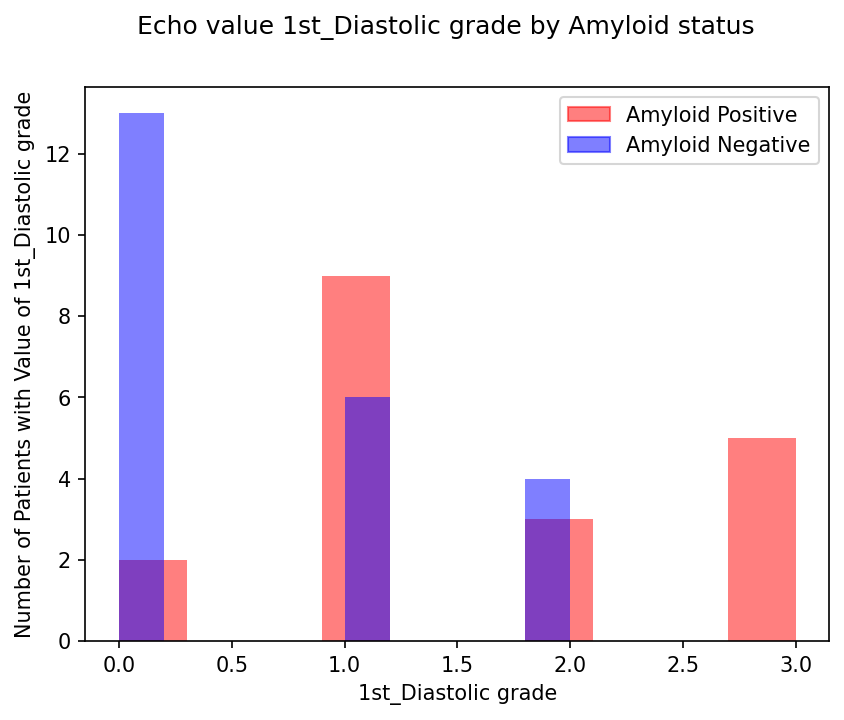

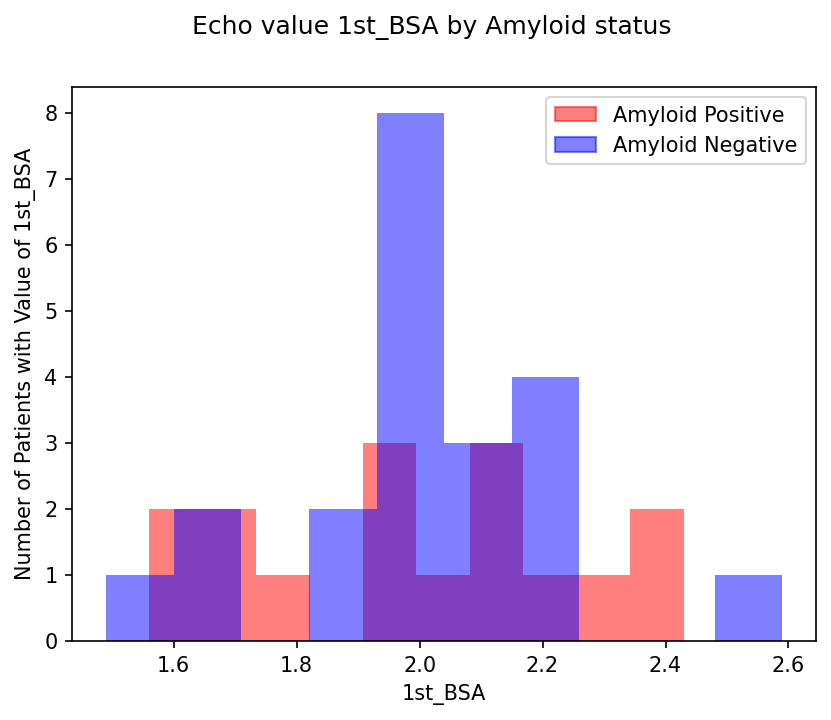

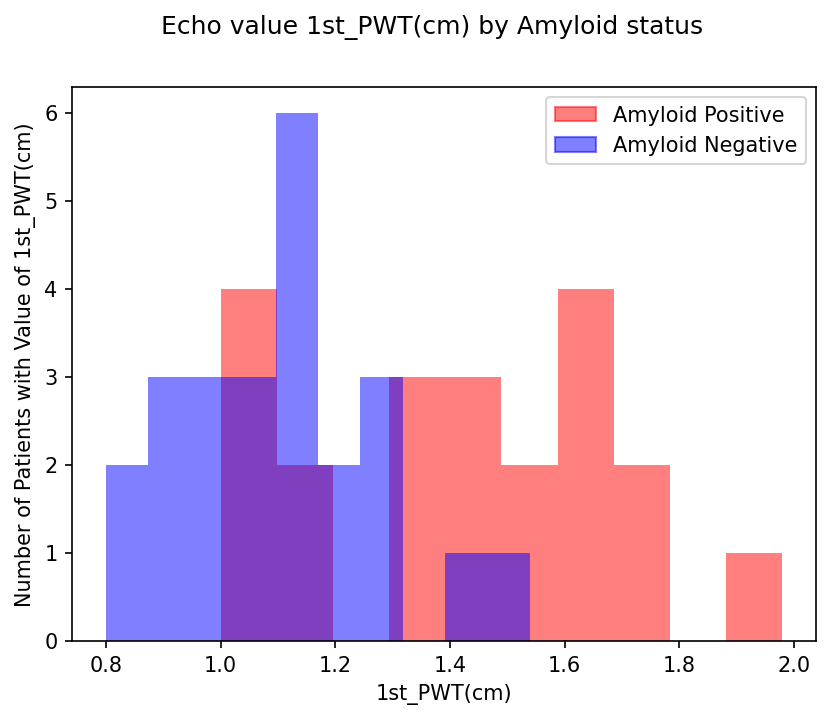

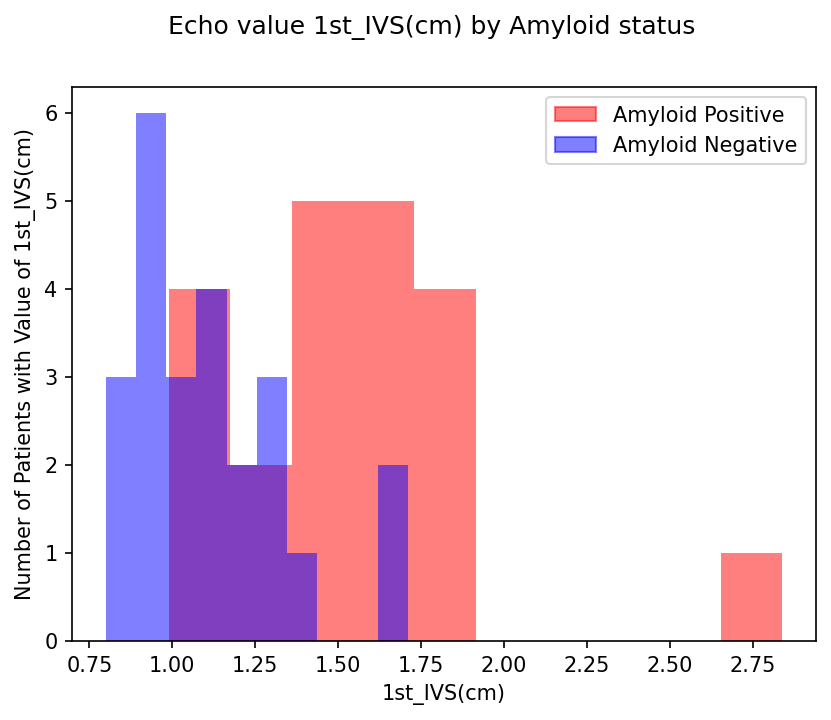

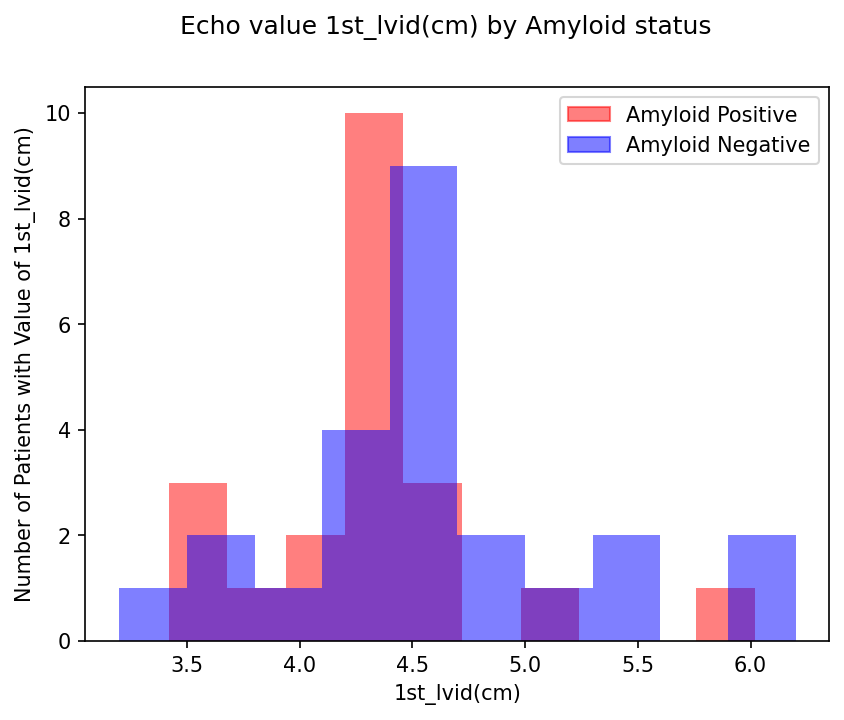

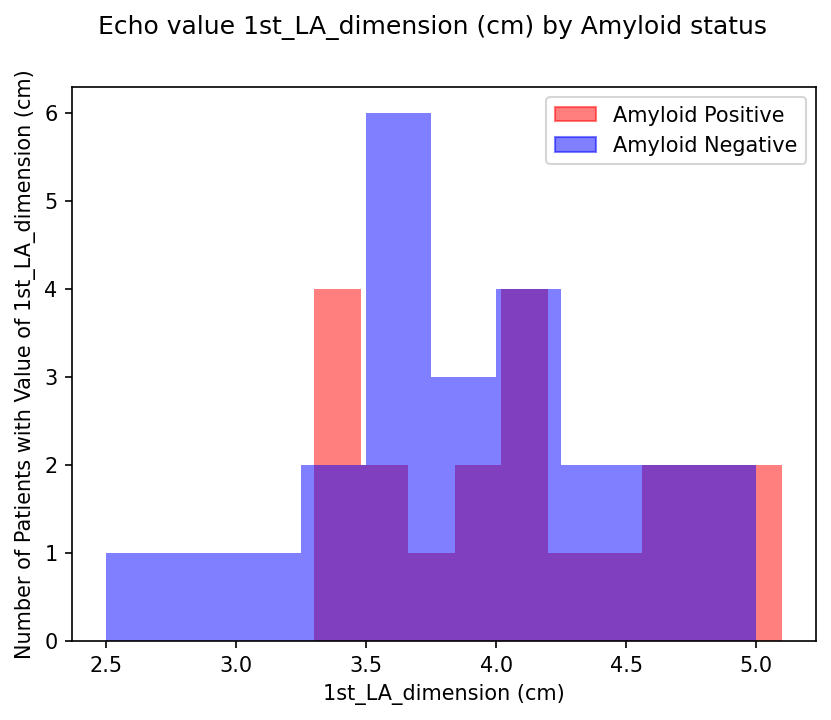

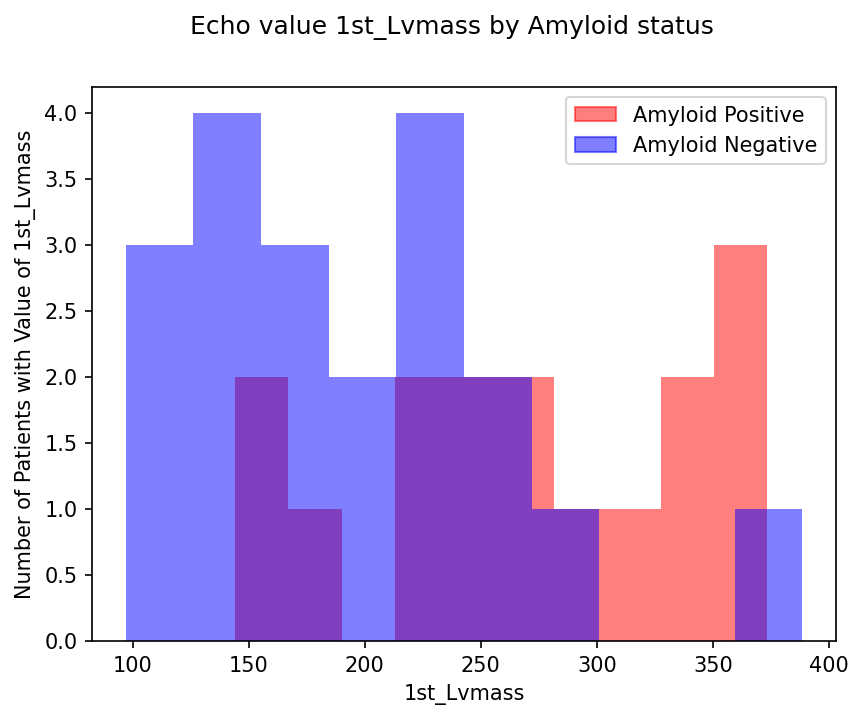

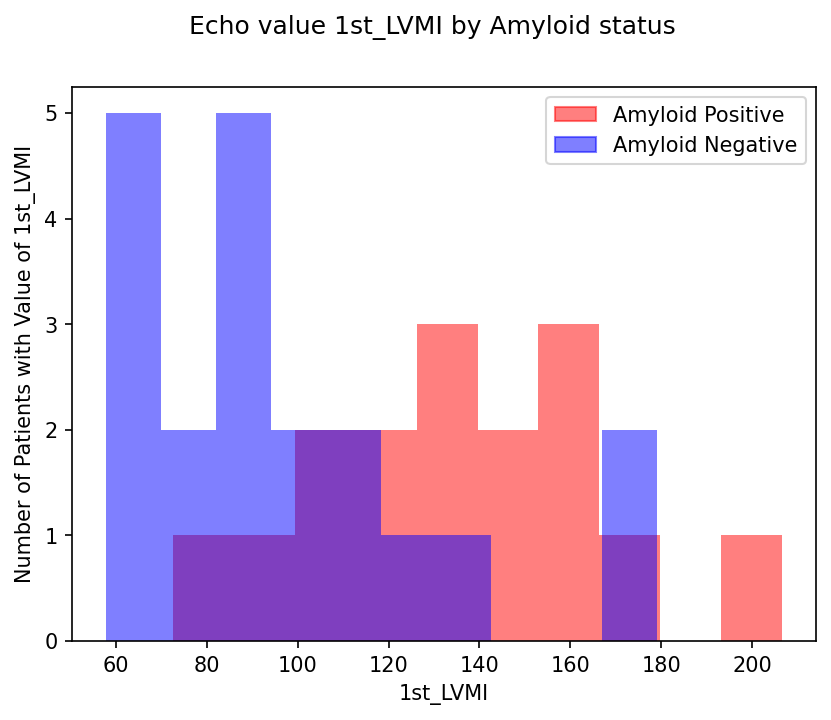

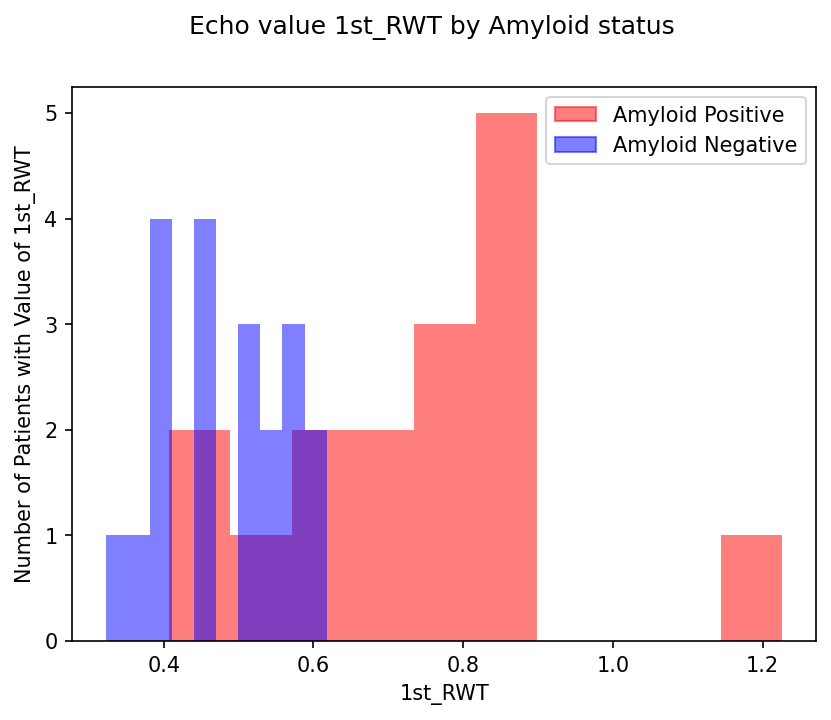

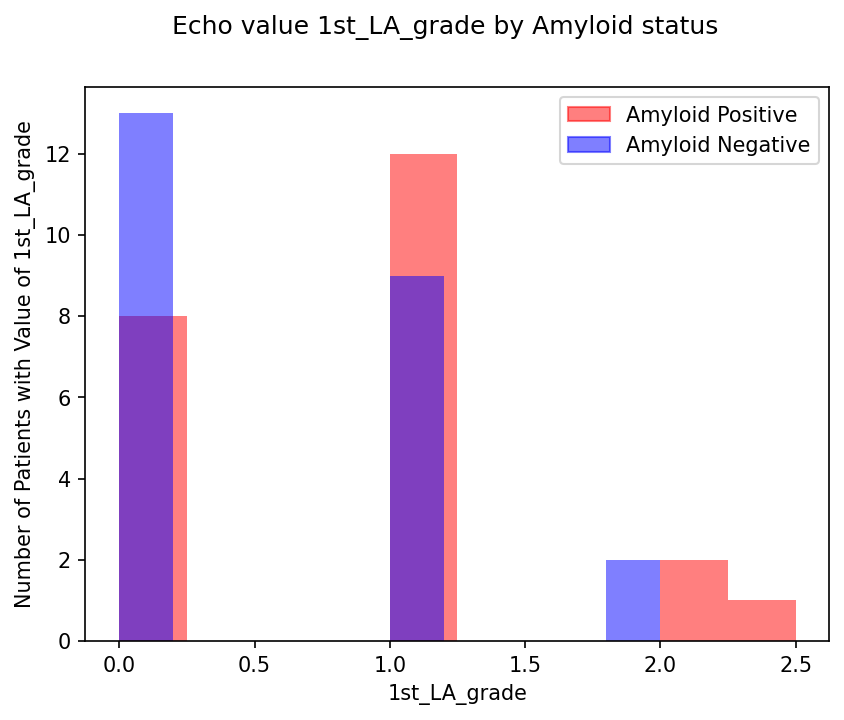

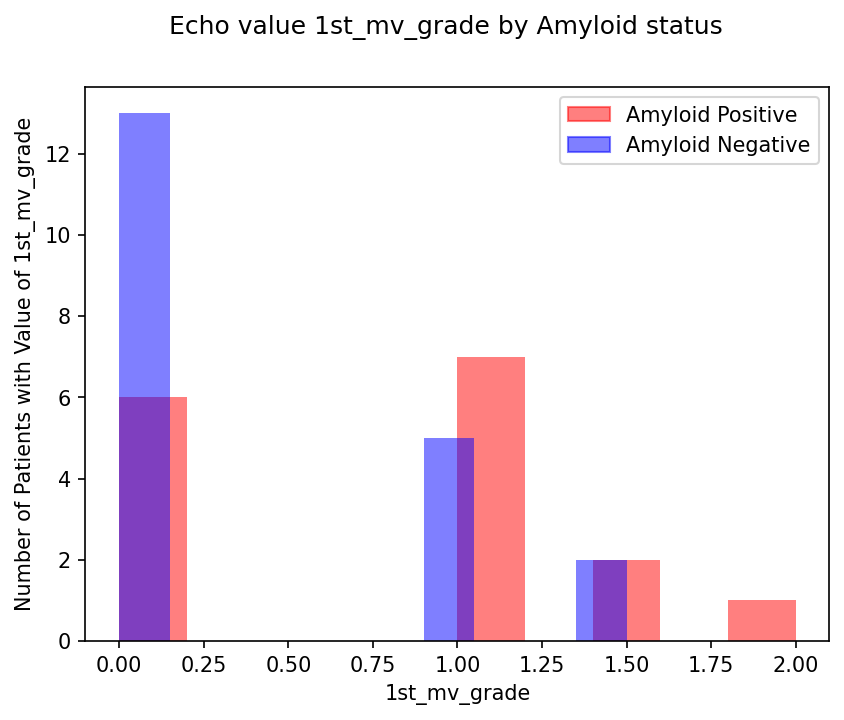

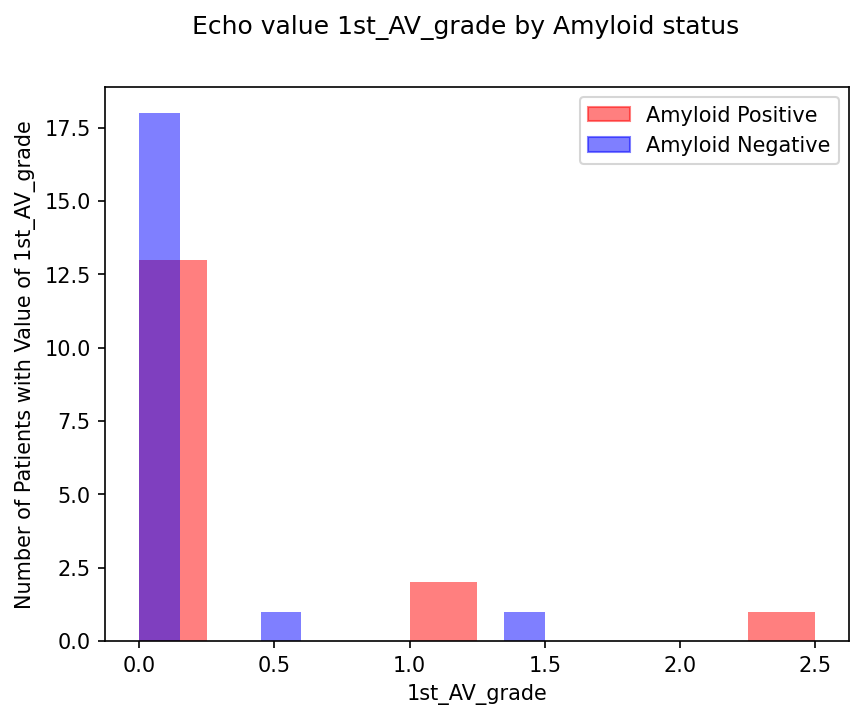

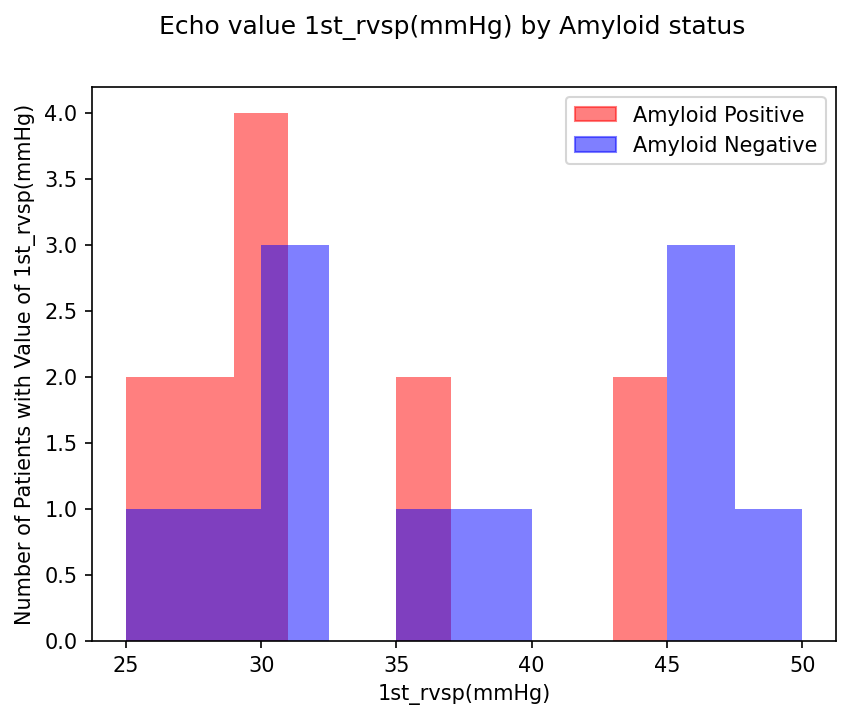

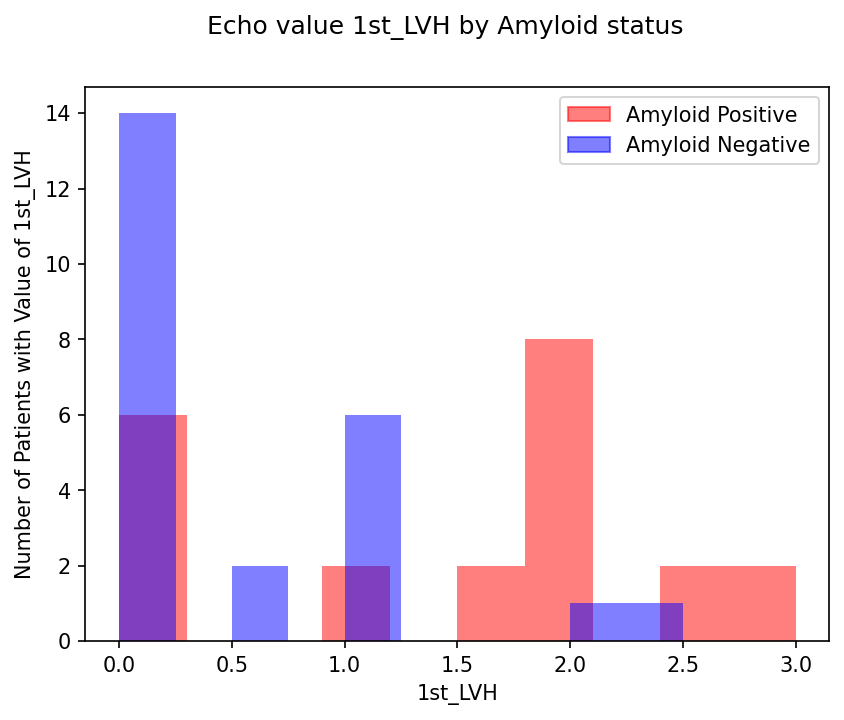

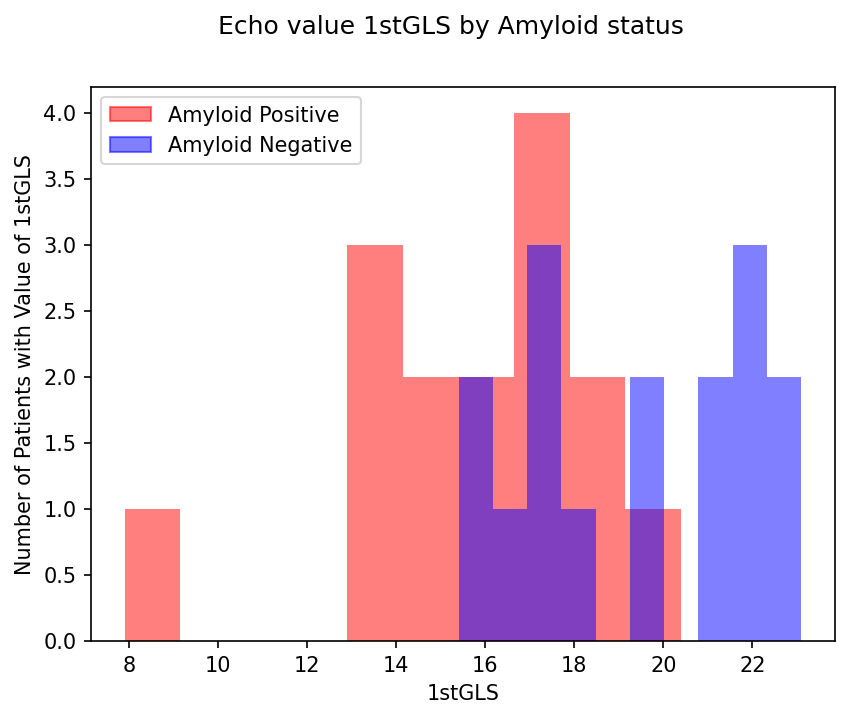

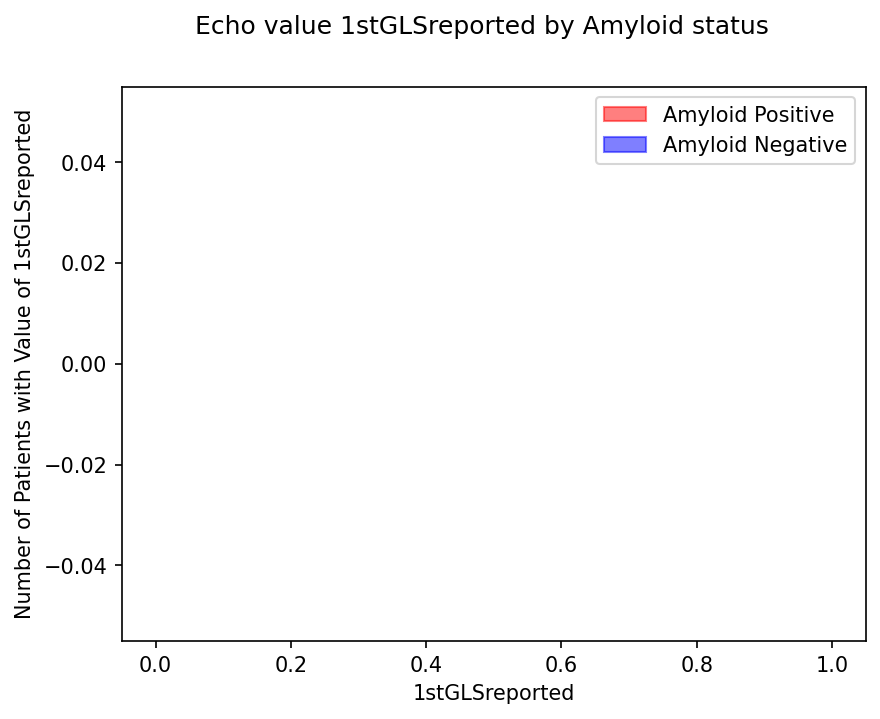

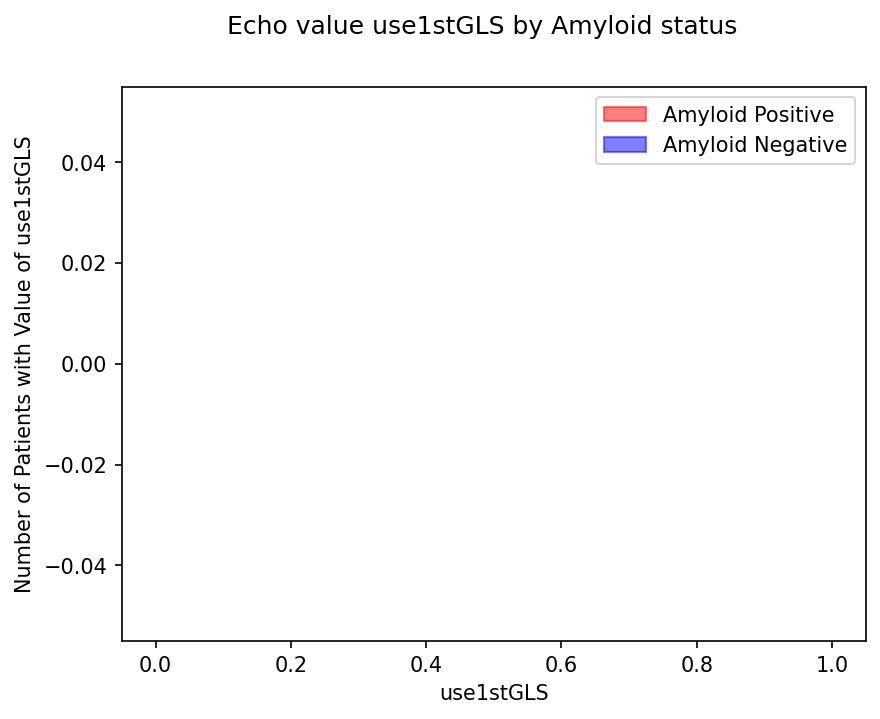

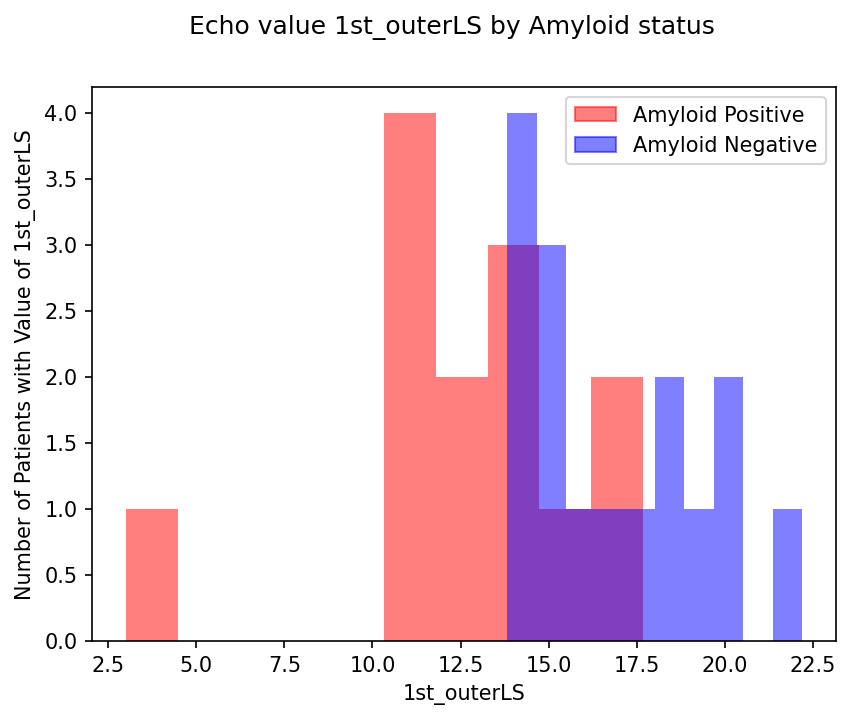

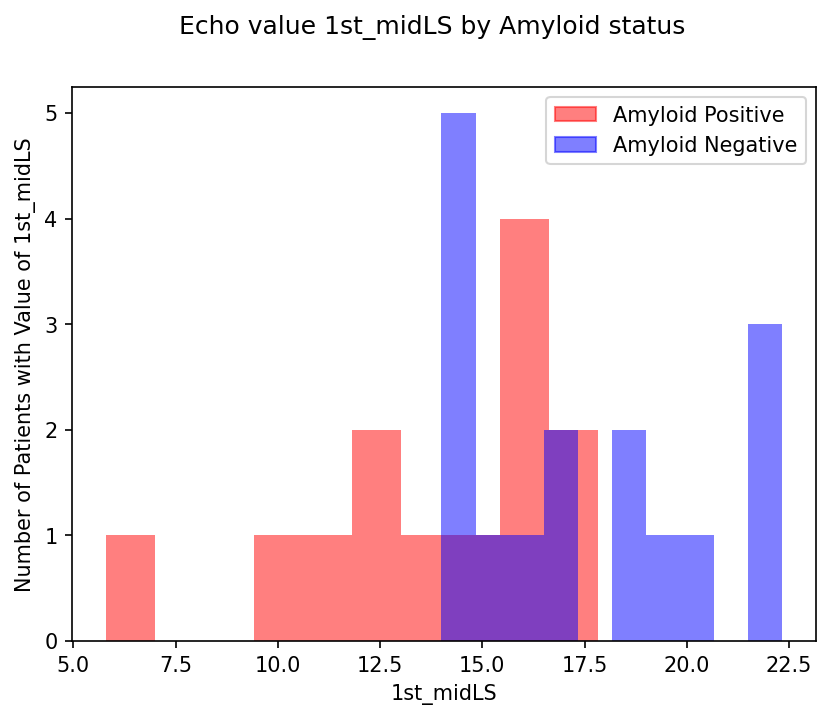

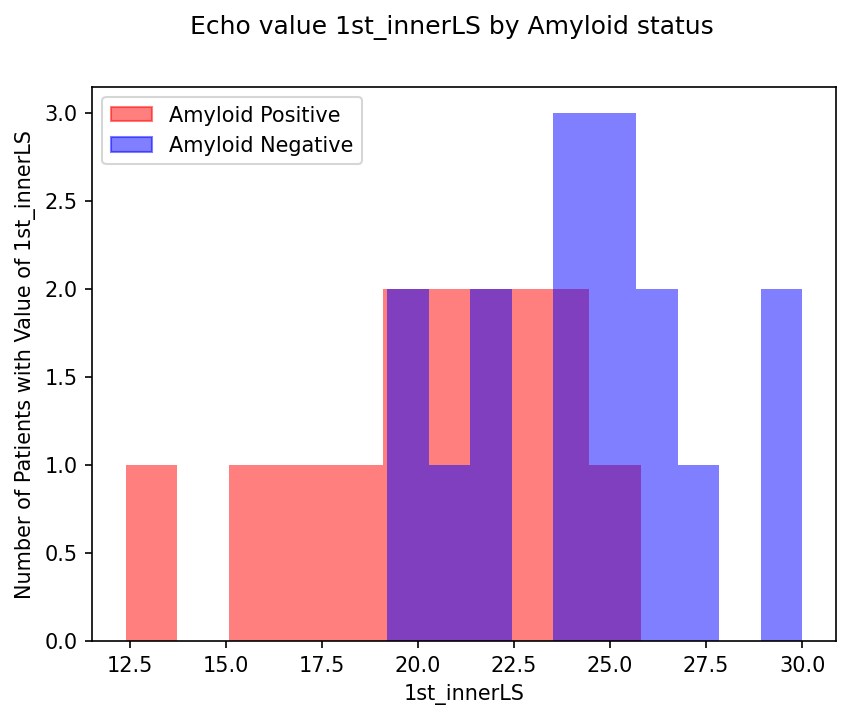

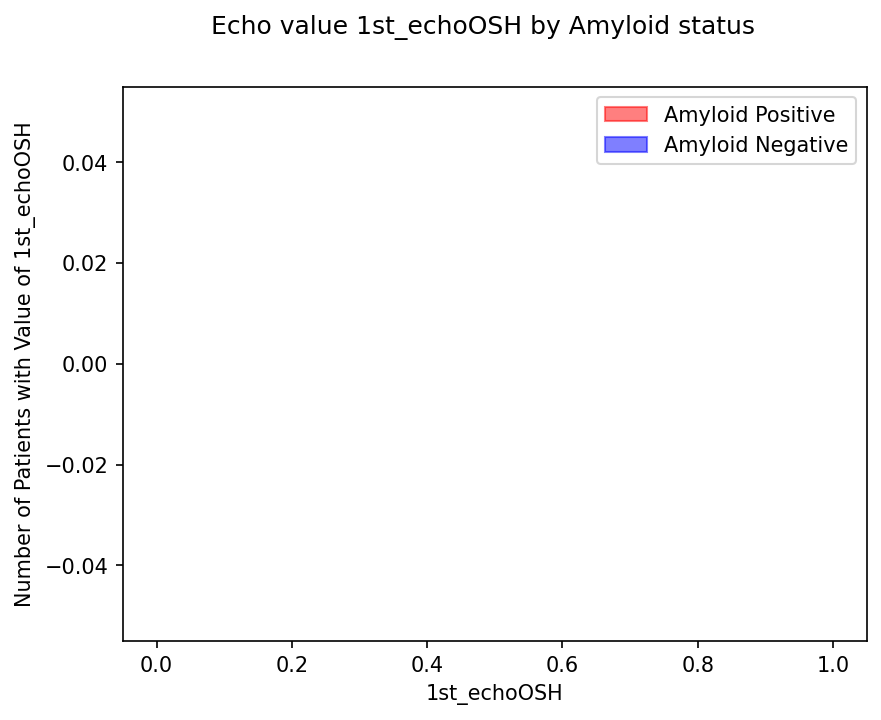

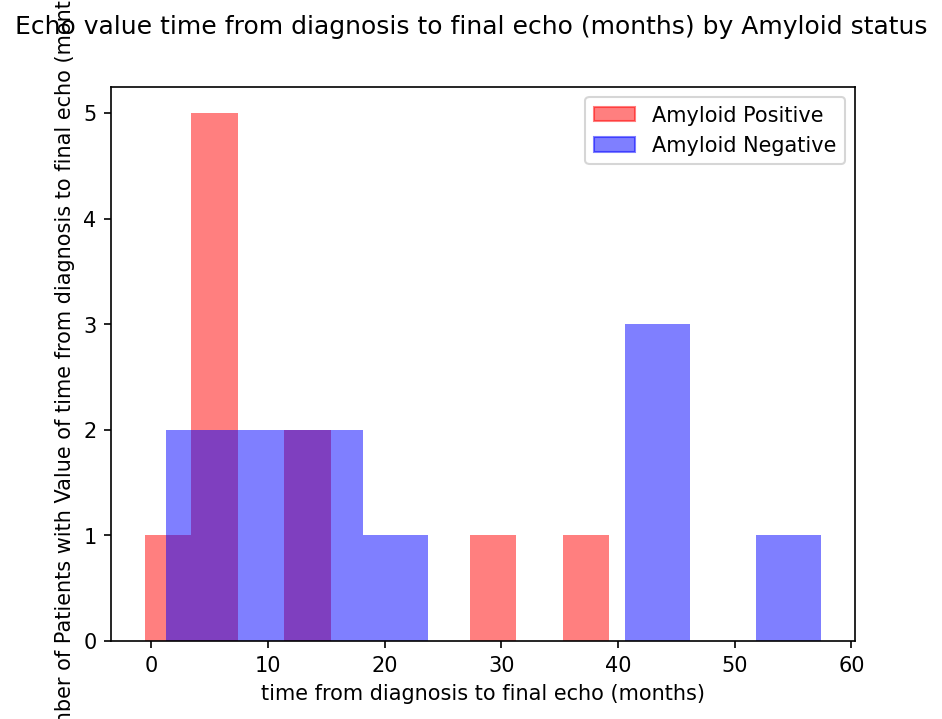

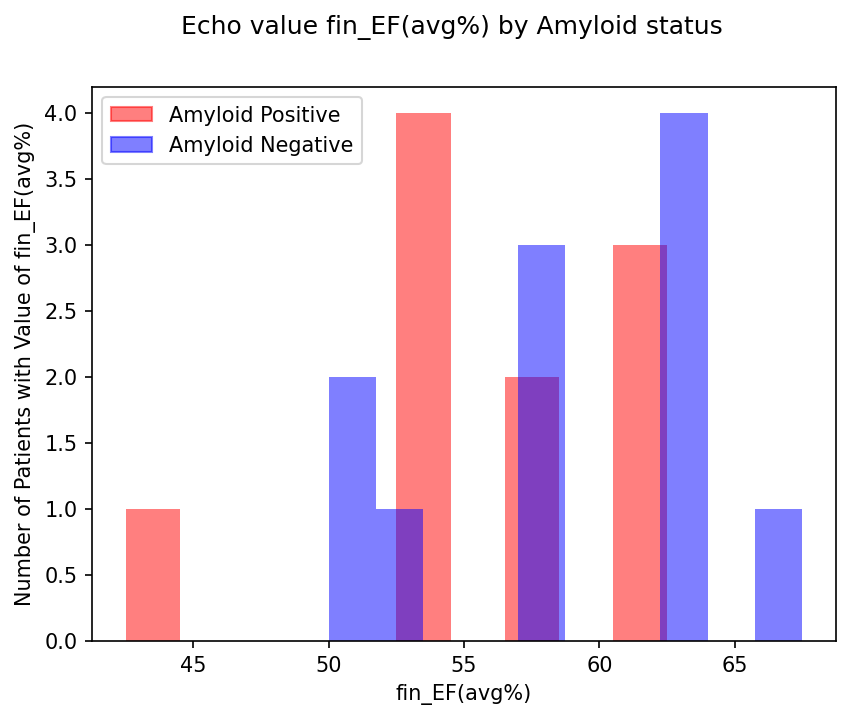

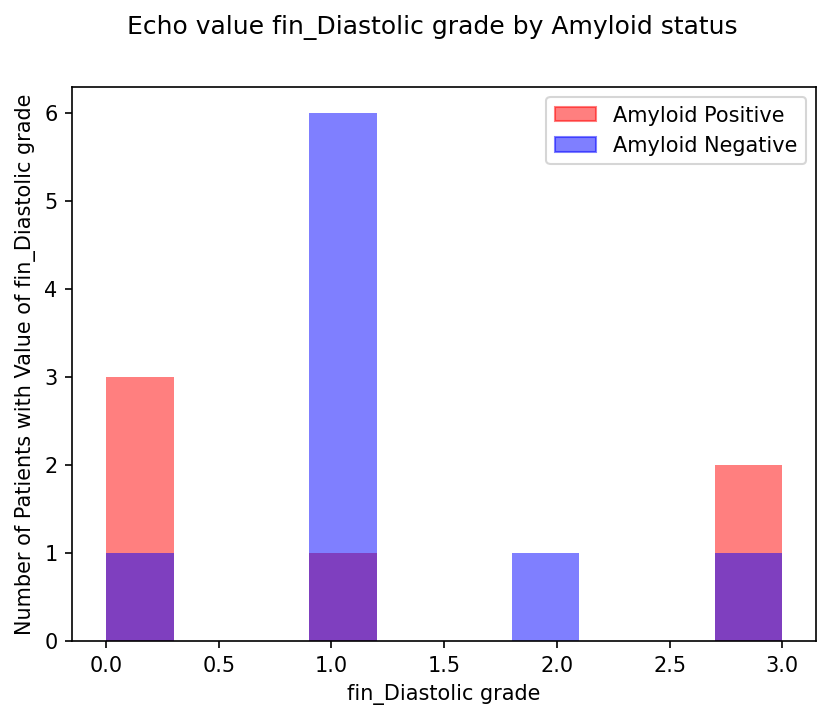

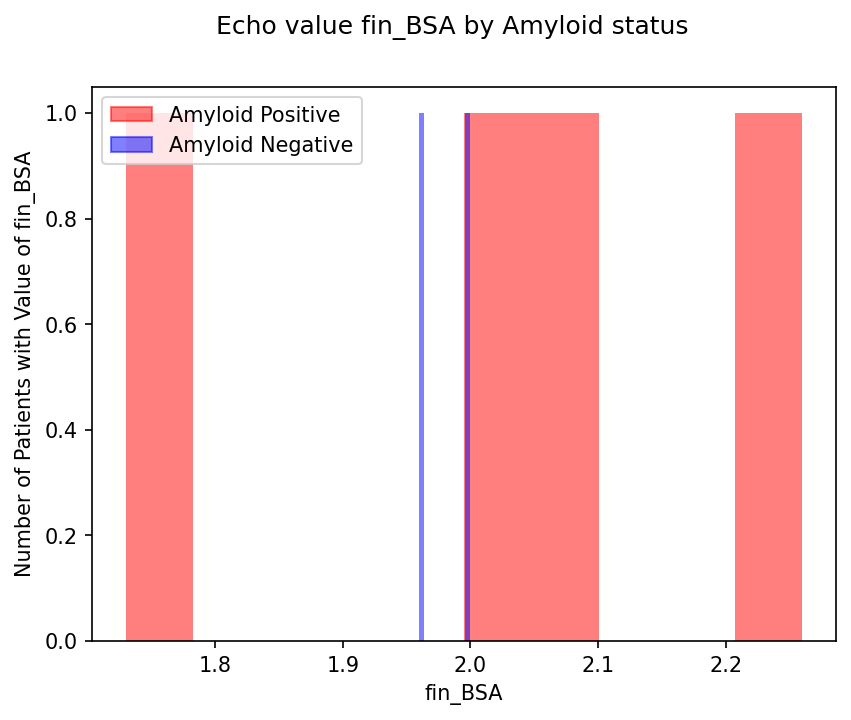

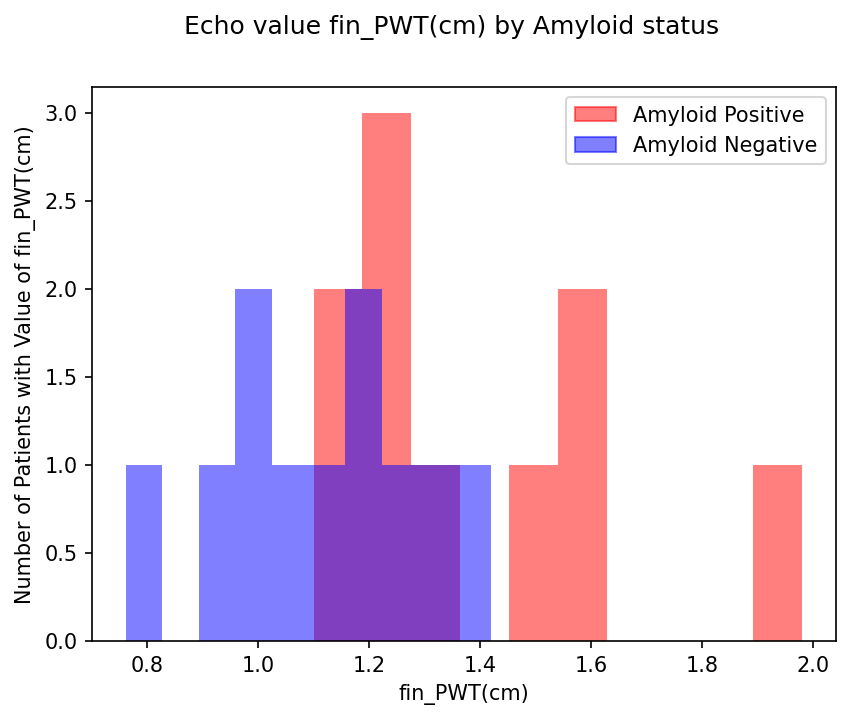

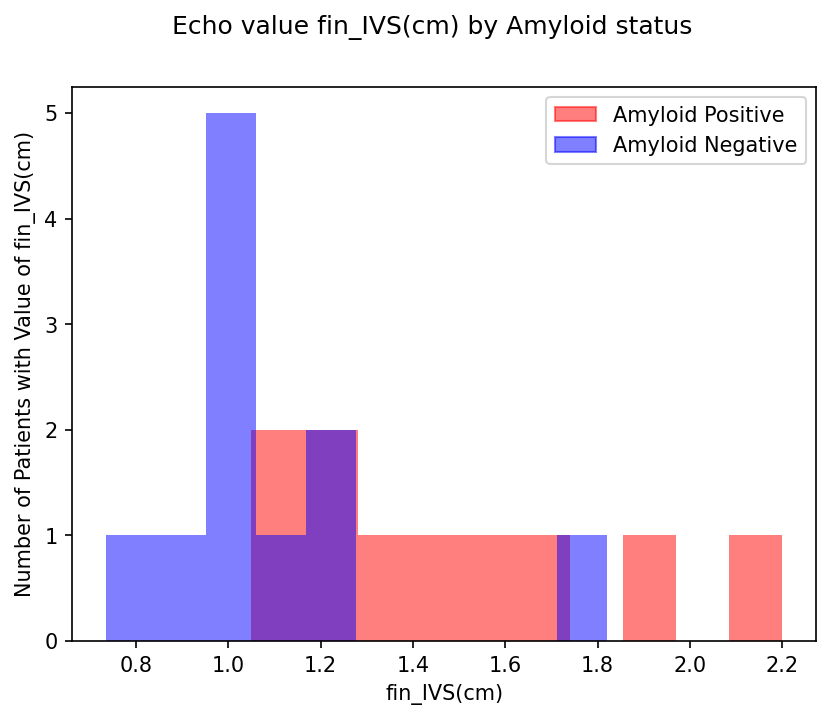

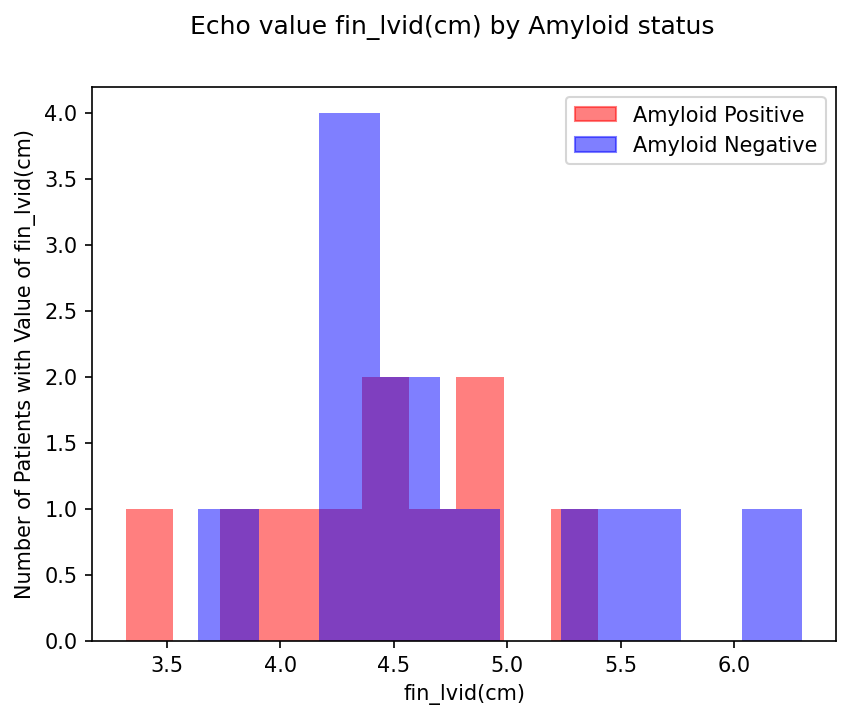

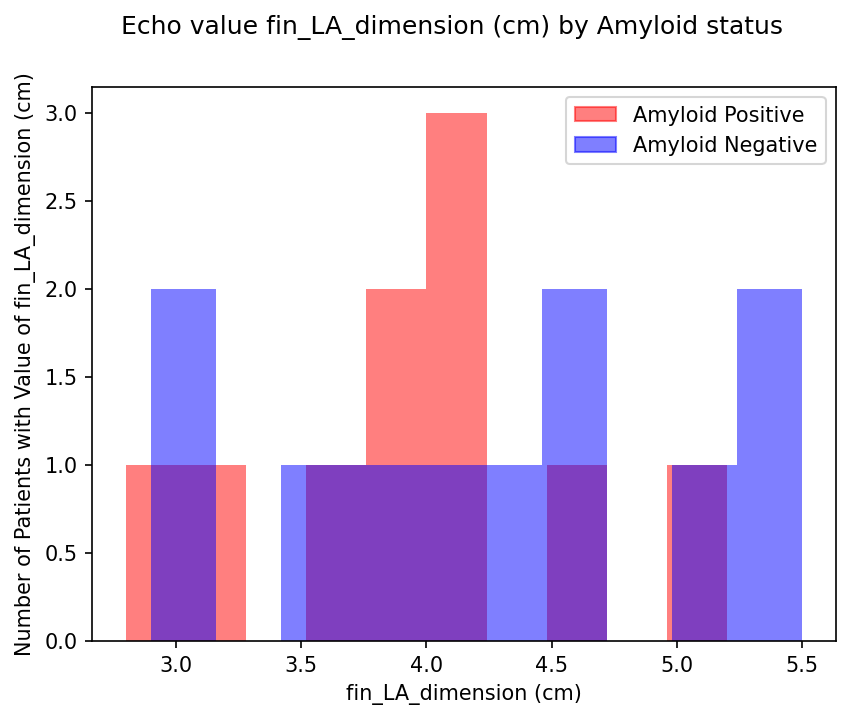

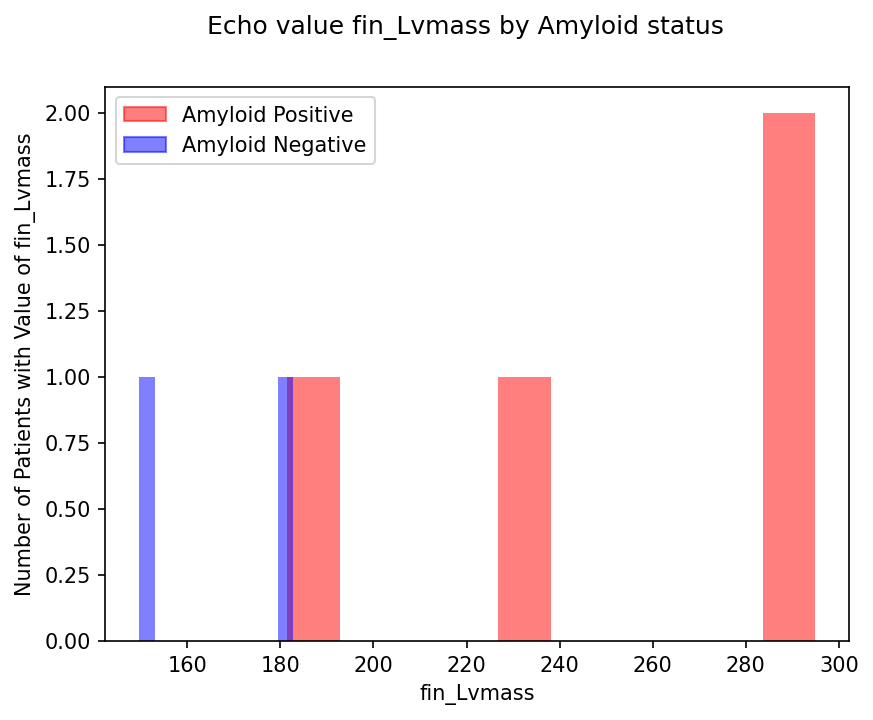

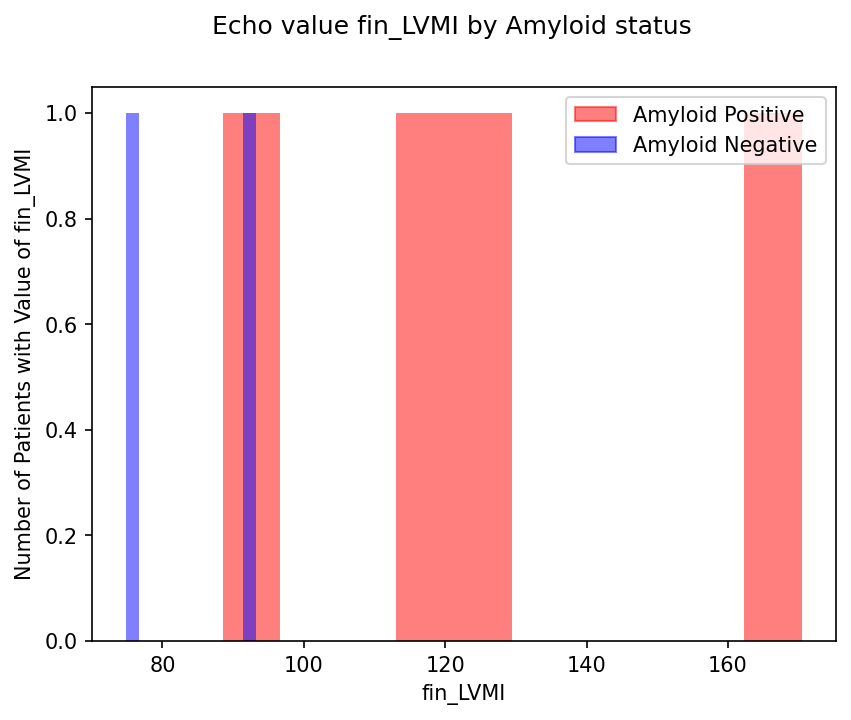

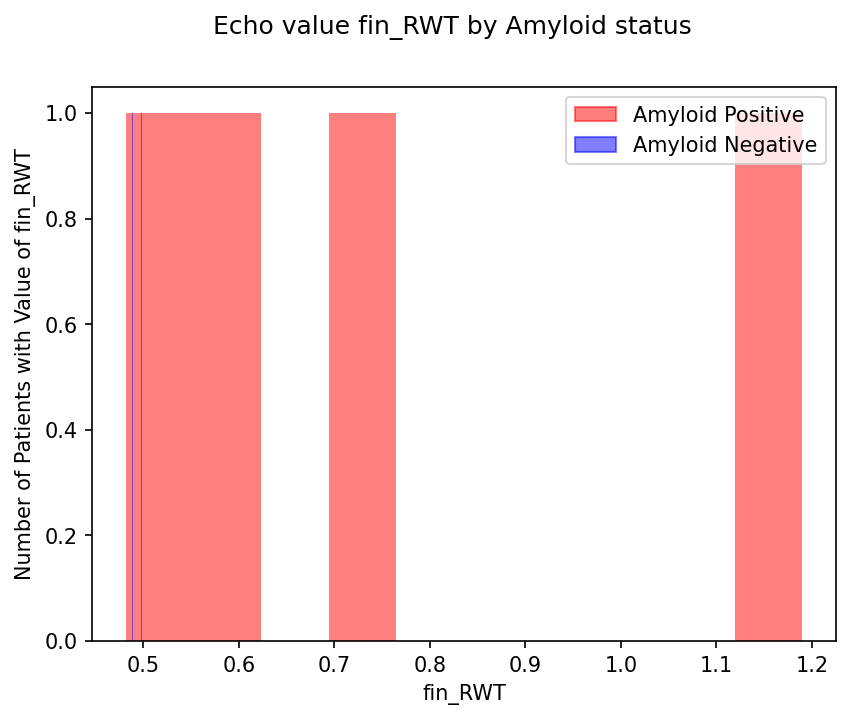

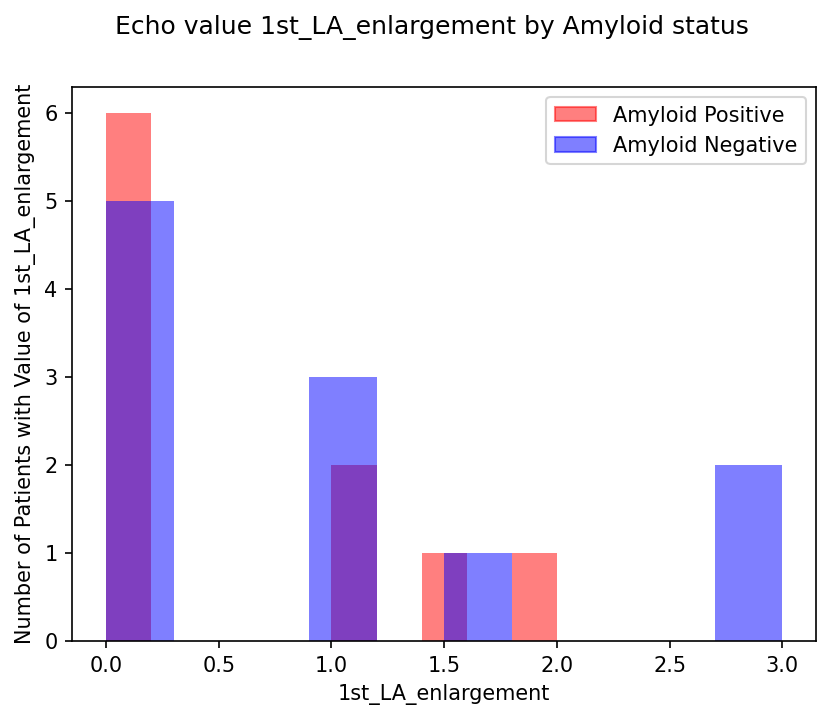

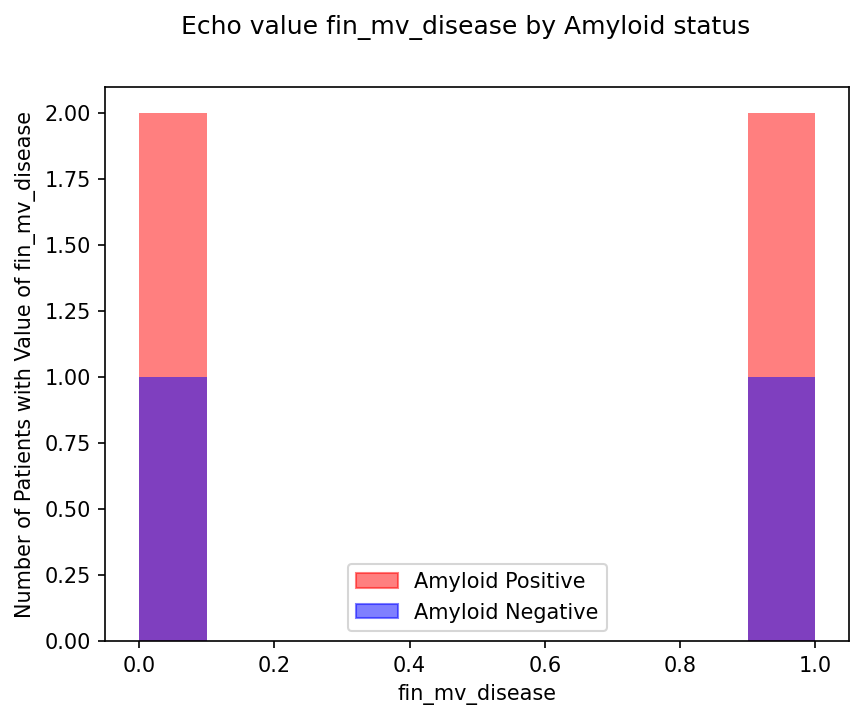

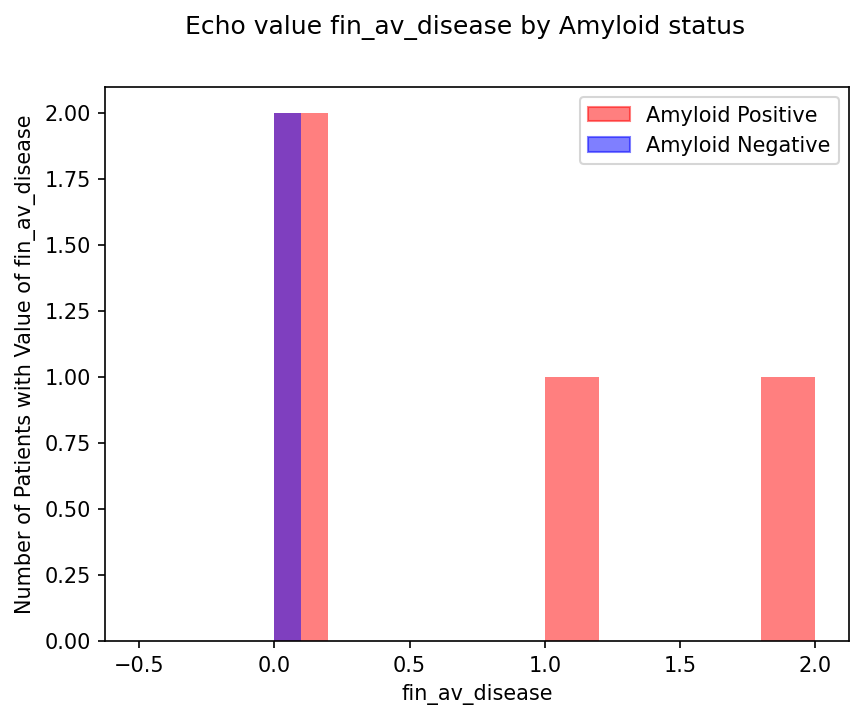

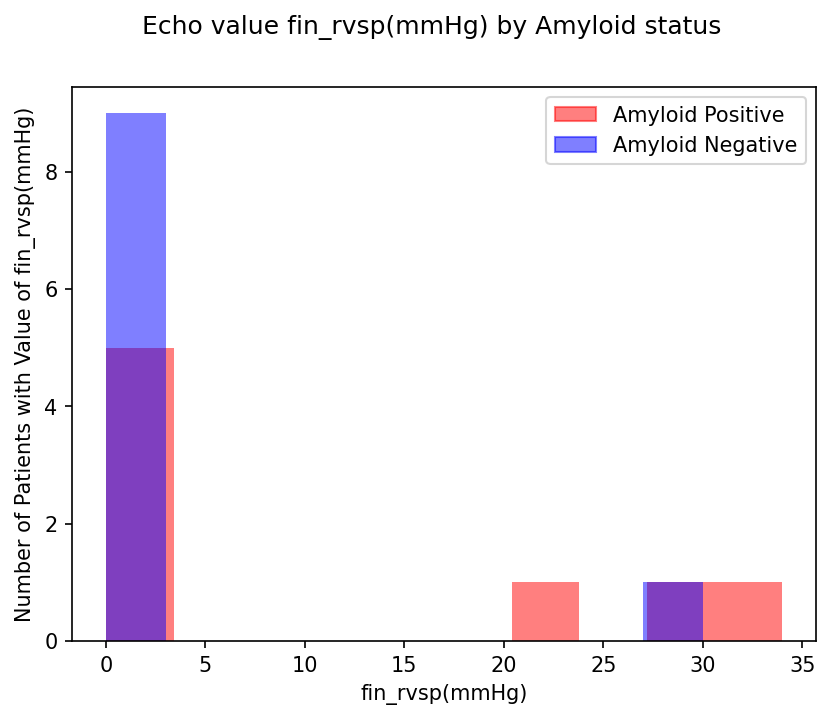

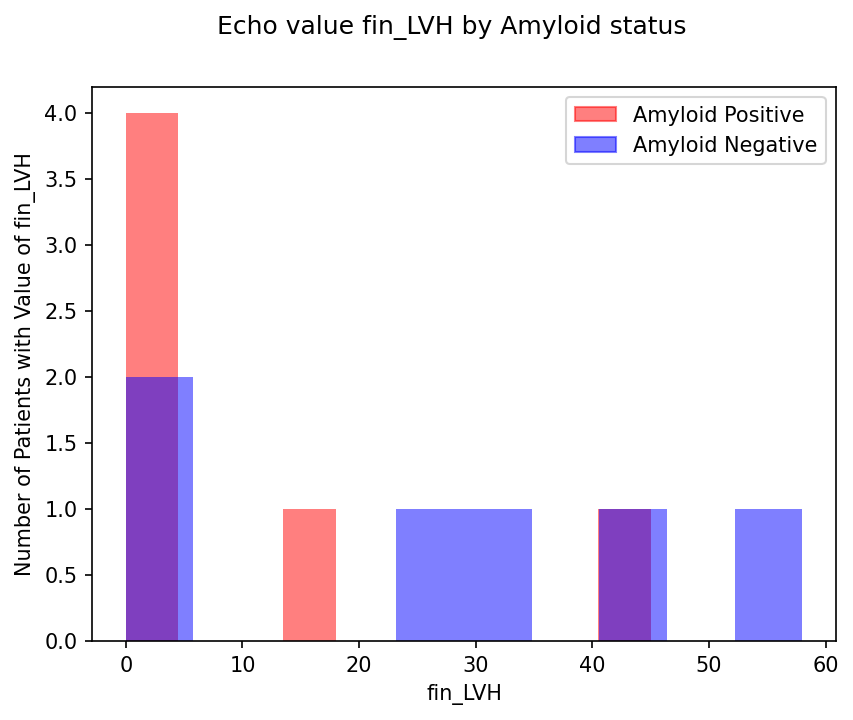

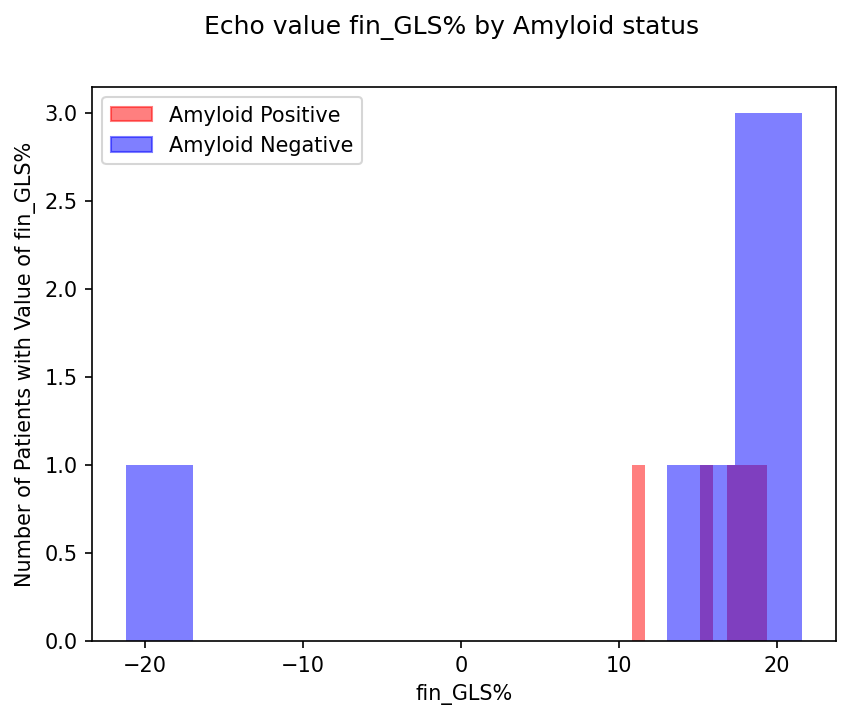

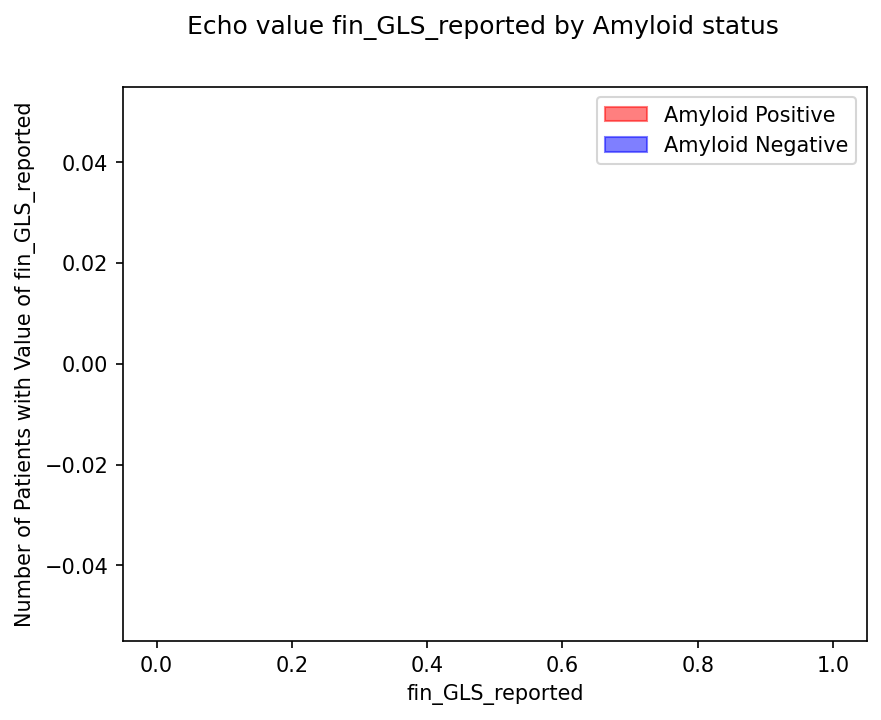

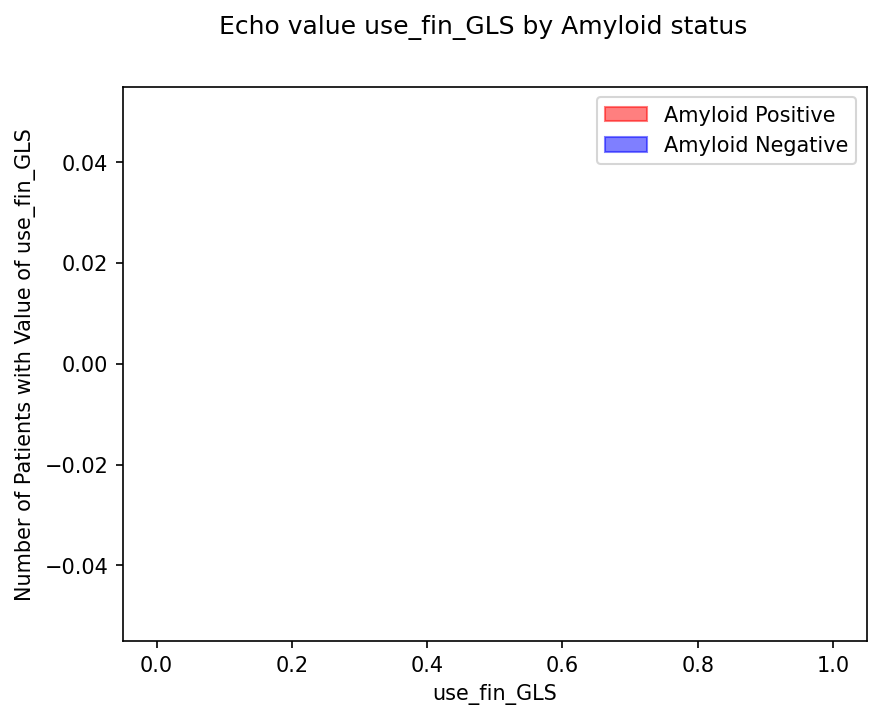

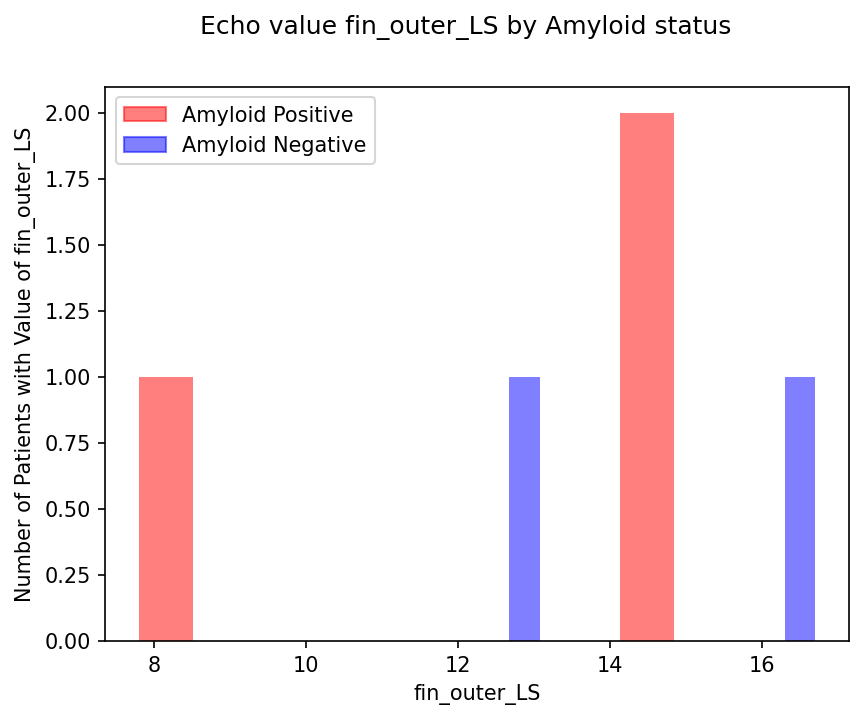

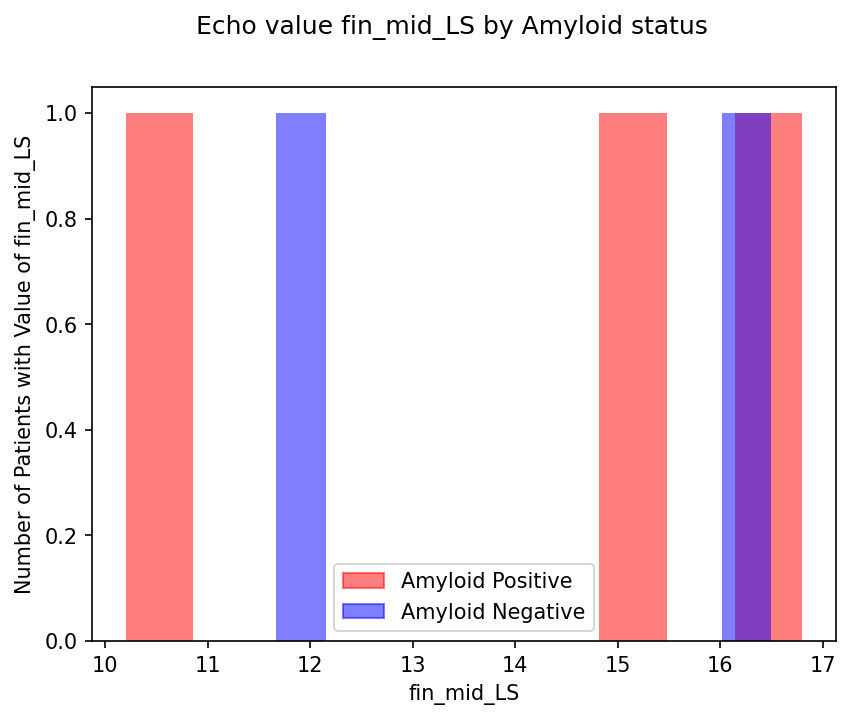

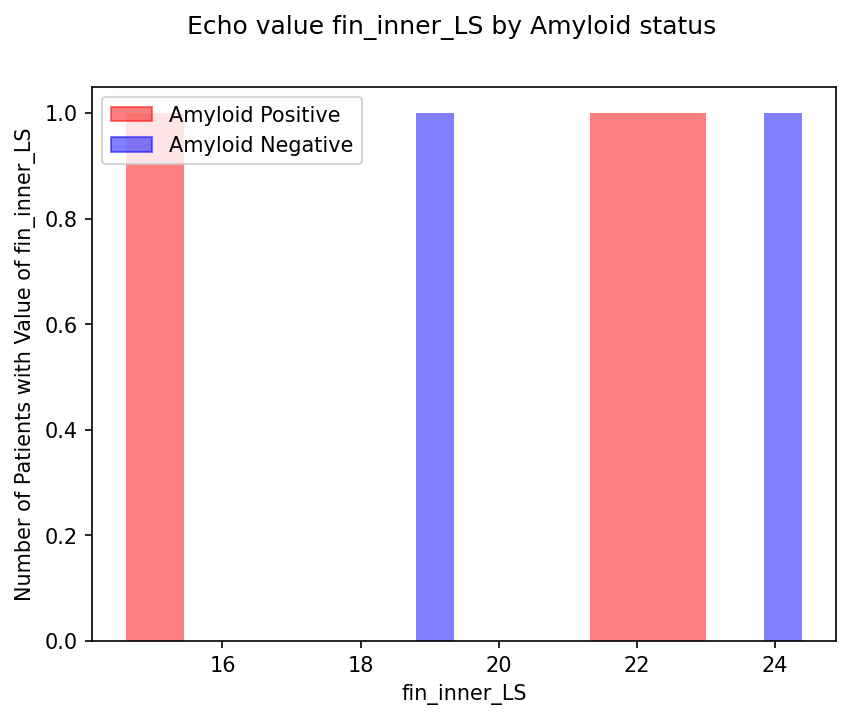

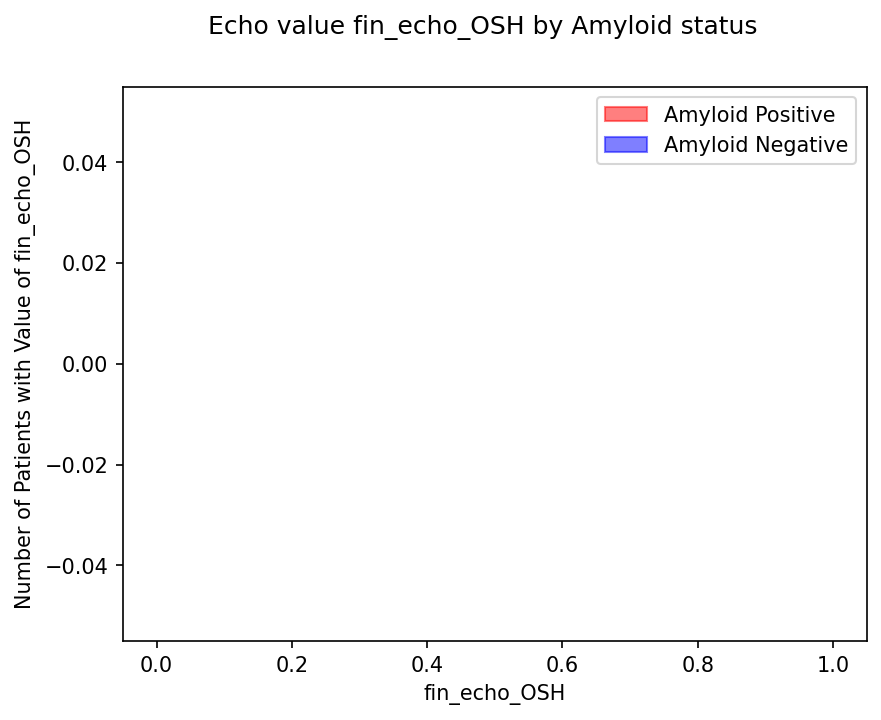

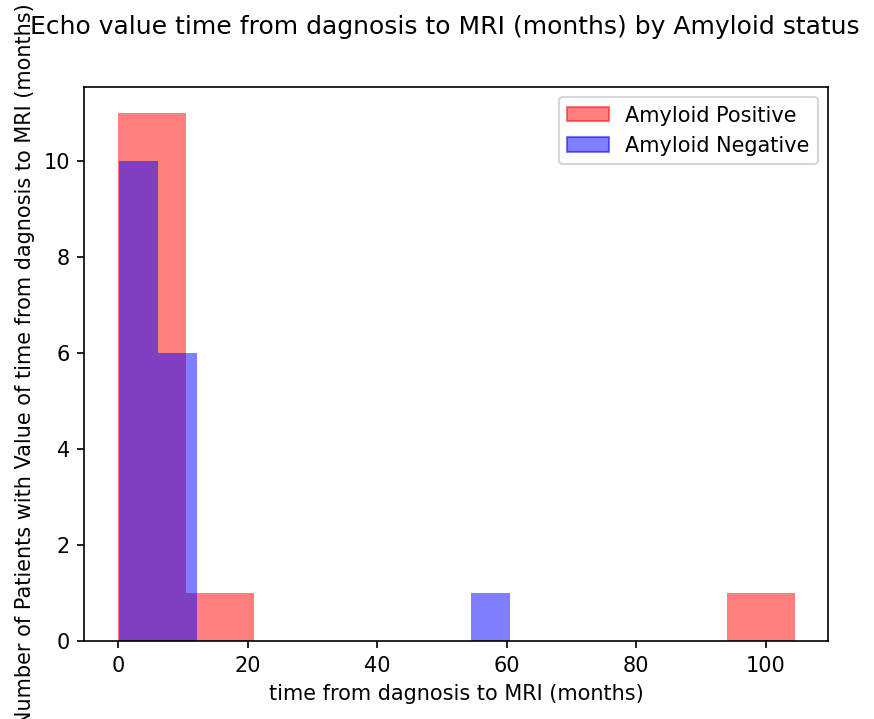

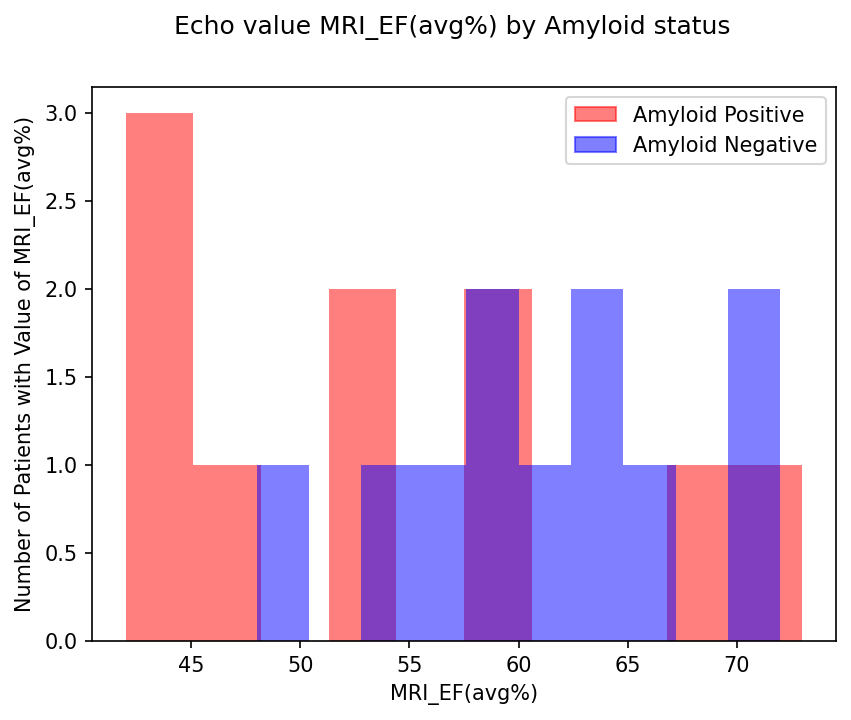

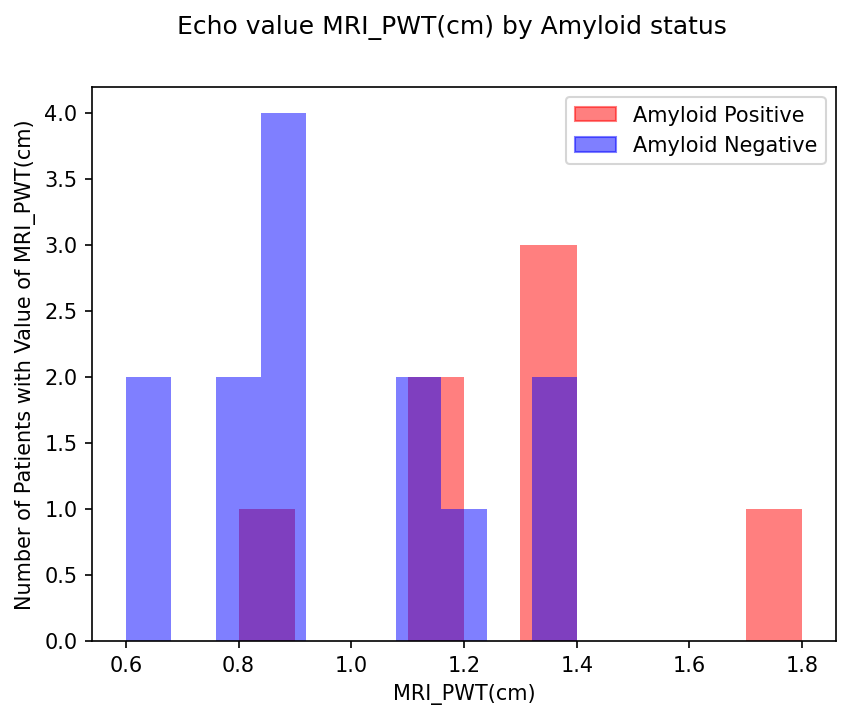

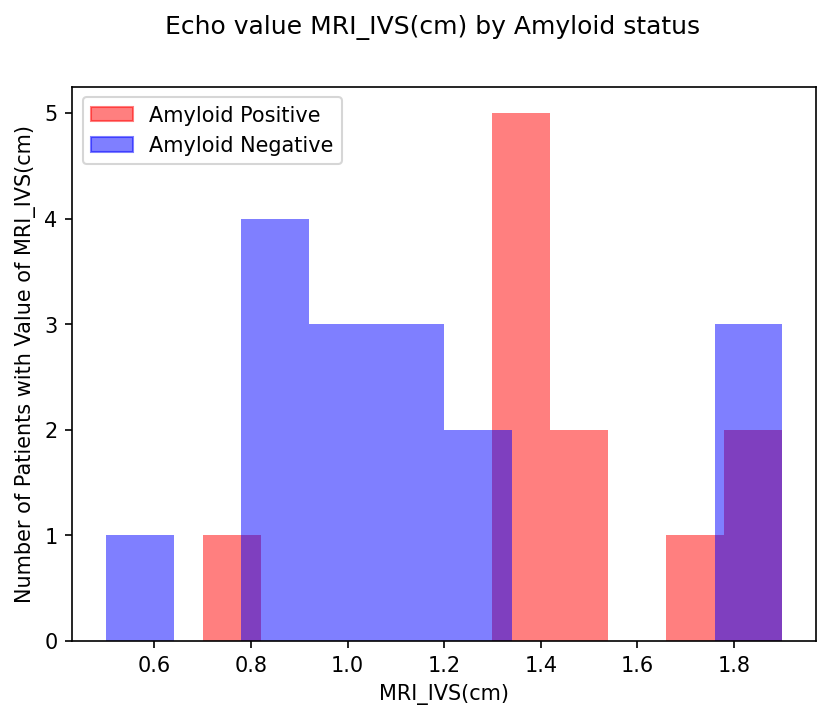

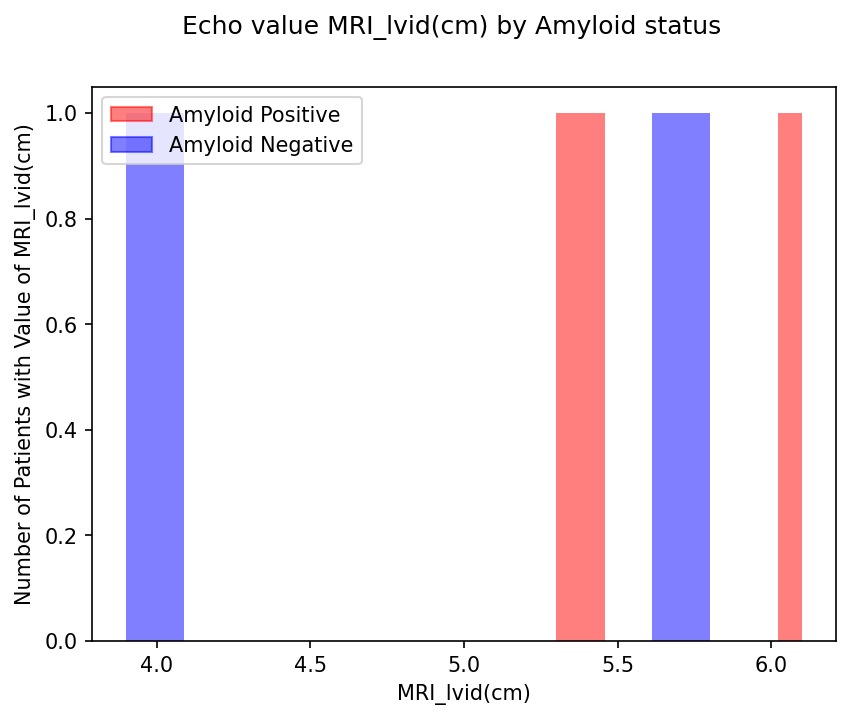

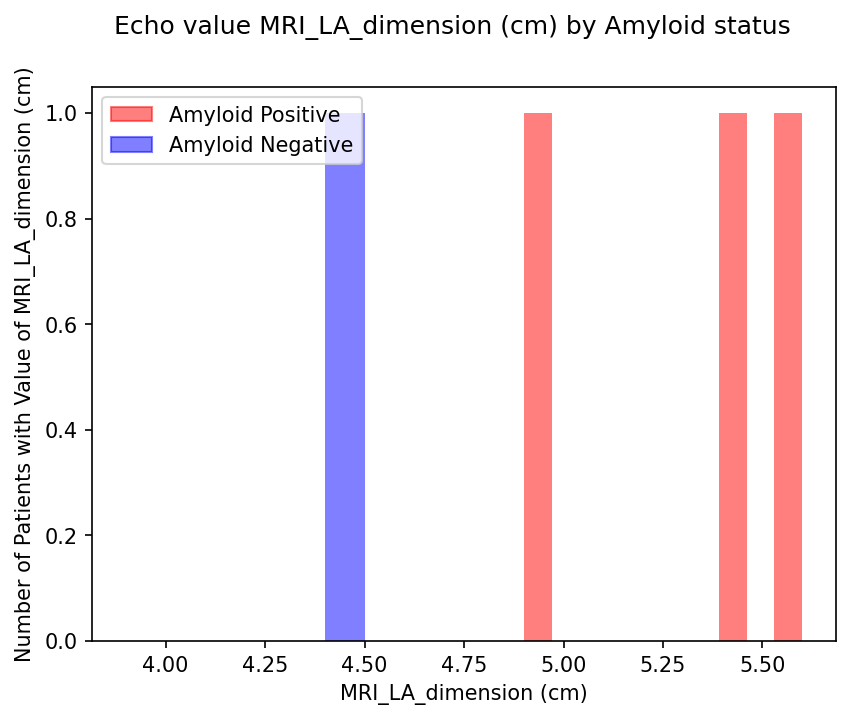

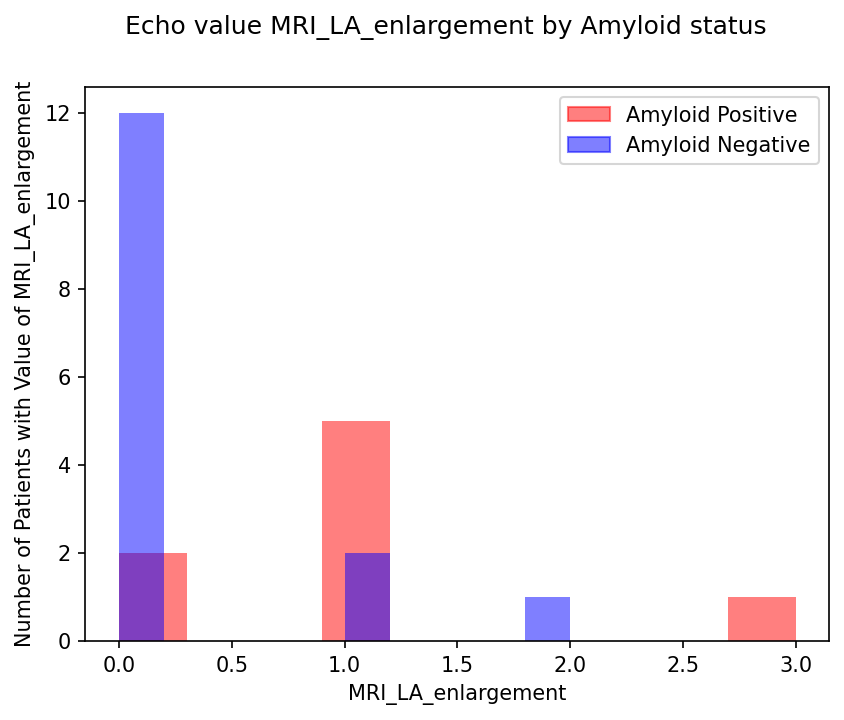

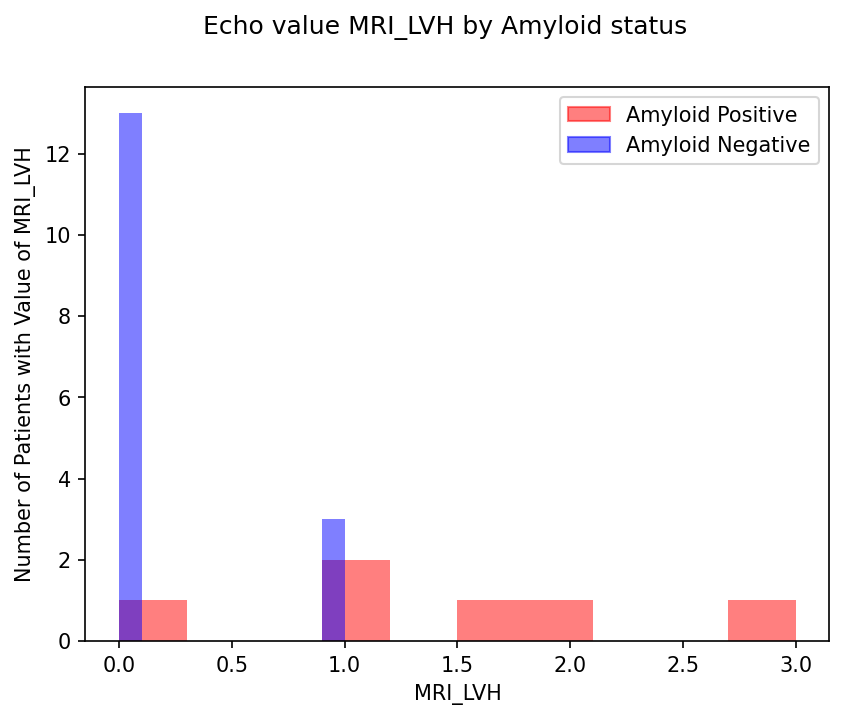

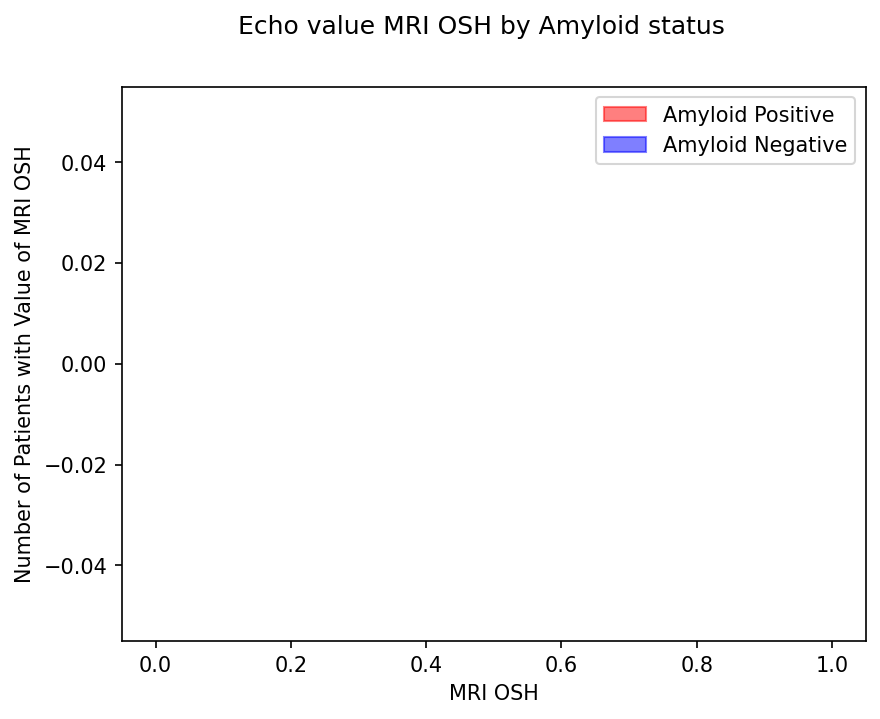

In [150]:
i = 0
for item in echoColumnsOfInterest:
    #addition of a way to remove the missing or penalty values... penalty = -1

    dataPostive = df_ALPositive_Echo.loc[df_ALPositive_Echo[item] > penalty_echo].dropna(axis = 'index')
    dataNegative = df_ALNegative_Echo.loc[df_ALNegative_Echo[item] > penalty_echo].dropna(axis = 'index')

    fig, ax = plt.subplots()
    ax.hist(dataPostive[item], color = "red", alpha =0.5)
    ax.hist(dataNegative[item], color = "blue", alpha = 0.5)
    ax.set_xlabel(item)
    ax.set_ylabel("Number of Patients with Value of " + item)
    amyloidpositive_patch = mpatches.Patch(color = 'red', alpha = 0.5, label = "Amyloid Positive")
    amyloidnegative_patch = mpatches.Patch(color = "blue", alpha = 0.5, label = "Amyloid Negative")
    ax.legend(handles = [amyloidpositive_patch, amyloidnegative_patch])
    fig.suptitle("Echo value " + item + " by Amyloid status")

    fig_file_out = outputFiguresPath(fileName_header=fileNameHeader_all, fileName_mid= "altcol_" + str(i) + "_fig_" , 
                                 fileName_suff= fileNameSuffix, parent_dir=outputDir, folderName=folder_data_out)
    fig.savefig(fig_file_out, bbox_inches = "tight")
    i = i+1

# looking at statistical differences between echo values by amyloid status


In [151]:
dict_dx_codes = {
    "MGUS" : 1, 
    "MM" : 2, 
    "Multiple Myeloma" : 2,
    "MULTIPLE MYELOMA" : 2 
    #other values are going to be set to 0
}

dict_AL_codes = {
    "yes" : 2, 
    "no" : 1, 
    "unk" : 3,
}

dict_sex_codes = {
    "Male" : 0,
    "MALE": 0, 
    "Female" : 1, 
    "FEMALE" : 1,  
}

dict_of_codes = {"AL": dict_AL_codes, 
                 "Dx": dict_dx_codes, 
                 "Sex": dict_sex_codes}

dict_of_data = {"AL": patientDictAmyloid, 
                "Dx": patientDictDx, 
                "Sex": patientDictSex}

dict_encoded_pt_AL_Dx_sex = {}

for ptID in list(patientDictDx.keys()):
    listPtValues = []
    for key in list(dict_of_codes.keys()):
        LocalValue = ''
        for code in dict_of_codes[key]:
            if code in dict_of_data[key][ptID]:
                # print(ptID, " code: ", code)
                LocalValue = dict_of_codes[key][code] 
        if LocalValue == '': 
            listPtValues.append(0)
        else:
             listPtValues.append(LocalValue)
    # print("patient values: ", listPtValues)
    dict_encoded_pt_AL_Dx_sex[ptID] = listPtValues

df_all_encoded_AL_dx_sex = pd.DataFrame.from_dict(dict_encoded_pt_AL_Dx_sex, orient='index', columns=["Amyloid Status", "Dx", "Sex"])

#getting age and survival 
df_all_ages = pd.DataFrame.from_dict(patientDictAge, orient= 'index', columns= ['Age'])
df_all_survival = pd.DataFrame.from_dict(patientDictSurvival, orient='index', columns= ['Survival (in months)'])

#combining for demographics

df_all_demographics = pd.concat([df_all_encoded_AL_dx_sex, df_all_ages, df_all_survival], axis= 1)


In [152]:
#collect the imaging measurements and sort them by amyloid status
df_forstats = pd.concat([df_all_demographics, df_all_EchoTest], axis = 1)

In [153]:
test_stats = df_forstats.groupby("Amyloid Status").describe()

In [154]:
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy import stats

In [155]:
#for t test for comparing amyloid positive and negative 
#final comparisons will be done using graphpad

ALPostiveData = df_forstats.loc[listPositive]
ALNegativeData = df_forstats.loc[listNegative]

dict_imagingValue_stats = {}
dict_imagingValue_variance_stats = {}
for imagingValue in echoColumnsOfInterest:
    #filtering the data to remove the penalty values and missing values
    
    dataPostive = ALPostiveData.loc[ALPostiveData[imagingValue] > penalty_echo].dropna(axis = 'index')
    dataNegative = ALNegativeData.loc[ALNegativeData[imagingValue] > penalty_echo].dropna(axis = 'index')

    #check for variance
    levene_test = stats.levene(dataPostive[imagingValue], dataNegative[imagingValue], nan_policy="omit")
    #the brown-forsythe might be more appropriate depending on scewness hense moving to graphpad for final analysis
    dict_imagingValue_variance_stats[imagingValue] = [levene_test.statistic, levene_test.pvalue]

    dict_imagingValue_stats[imagingValue] = ttest_ind(dataPostive[imagingValue], dataNegative[imagingValue], equal_var=False)
    #using equal_var False results in Welch's nonparametric t tests
    #equality of variance should be checked using Barlett's or Levene's tests and the histograms

df_imagingValue_stats = pd.DataFrame.from_dict(dict_imagingValue_stats, orient = "index")
df_imagingValue_variance_stats = pd.DataFrame.from_dict(dict_imagingValue_variance_stats, orient = "index")
df_imagingValue_variance_stats.columns = ["levene_statistic", "levene_pvalue"]

df_imagingValue_stats_2 = pd.concat([df_imagingValue_stats,df_imagingValue_variance_stats], axis=1)

#sort the data by pvalue
df_imagingValue_stats_2 = df_imagingValue_stats_2.sort_values(by='pvalue', ascending=True)

outputToExcel(df_data = df_imagingValue_stats_2, fileName_header= fileNameHeader_all, fileName_Common= fileNameCommon + "stats_", fileName_suffix= fileNameSuffix,
        parent_dir= outputDir, folderName=folderNameOut, sheetName= "Welch-T-test")

c:\Users\maega\anaconda3\envs\BEAT-Labs_2024-08-02\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\maega\anaconda3\envs\BEAT-Labs_2024-08-02\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\maega\anaconda3\envs\BEAT-Labs_2024-08-02\lib\site-packages\scipy\stats\_morestats.py:3345: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom
c:\Users\maega\anaconda3\envs\BEAT-Labs_2024-08-02\lib\site-packages\scipy\stats\_stats_py.py:1087: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
c:\Users\maega\anaconda3\envs\BEAT-Labs_2024-08-02\lib\site-packages\scipy\stats\_stats_py.py:1087: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on divis

In [156]:
#filter the list of information to plot by the Welch pvalue
columns_to_plot = list(df_imagingValue_stats_2.loc[df_imagingValue_stats_2['pvalue'] <= 0.05].index)
print(columns_to_plot)

['1st_PWT(cm)', '1st_RWT', '1st_IVS(cm)', '1st_LVH', '1stGLS', '1st_outerLS', '1st_Diastolic grade', '1st_LVMI', '1st_midLS', '1st_Lvmass', '1st_innerLS', 'fin_IVS(cm)', 'fin_PWT(cm)', 'MRI_LVH', 'MRI_IVS(cm)']


In [157]:
p_greater_than_005 = [item for item in echoColumnsOfInterest if item not in columns_to_plot]
print(p_greater_than_005)

['1st_EF(avg%)', '1st_BSA', '1st_lvid(cm)', '1st_LA_dimension (cm)', '1st_LA_grade', '1st_mv_grade', '1st_AV_grade', '1st_rvsp(mmHg)', '1stGLSreported', 'use1stGLS', '1st_echoOSH', 'time from diagnosis to final echo (months)', 'fin_EF(avg%)', 'fin_Diastolic grade', 'fin_BSA', 'fin_lvid(cm)', 'fin_LA_dimension (cm)', 'fin_Lvmass', 'fin_LVMI', 'fin_RWT', '1st_LA_enlargement', 'fin_mv_disease', 'fin_av_disease', 'fin_rvsp(mmHg)', 'fin_LVH', 'fin_GLS%', 'fin_GLS_reported', 'use_fin_GLS', 'fin_outer_LS', 'fin_mid_LS', 'fin_inner_LS', 'fin_echo_OSH', 'time from dagnosis to MRI (months)', 'MRI_EF(avg%)', 'MRI_PWT(cm)', 'MRI_lvid(cm)', 'MRI_LA_dimension (cm)', 'MRI_LA_enlargement', 'MRI OSH']


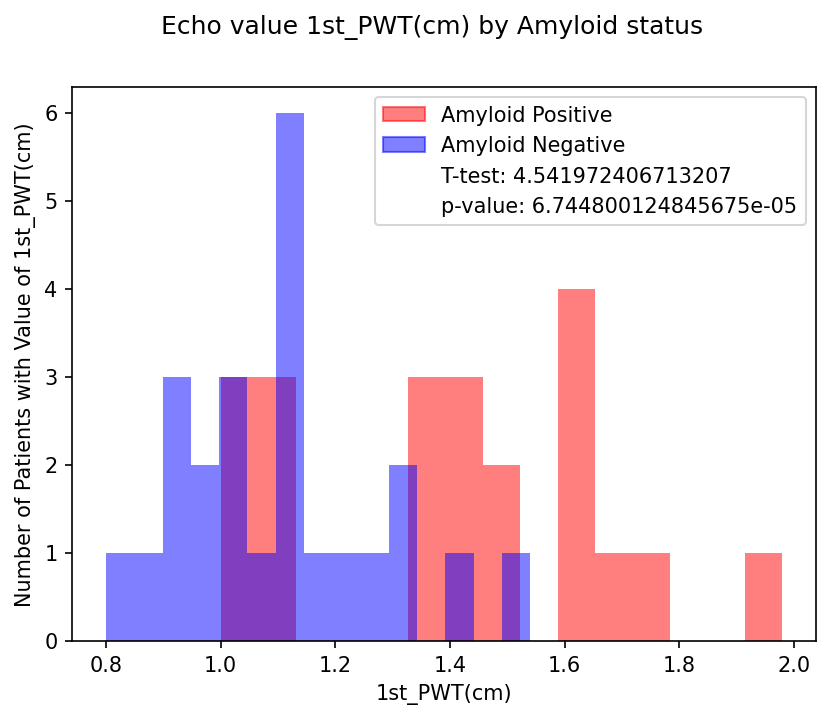

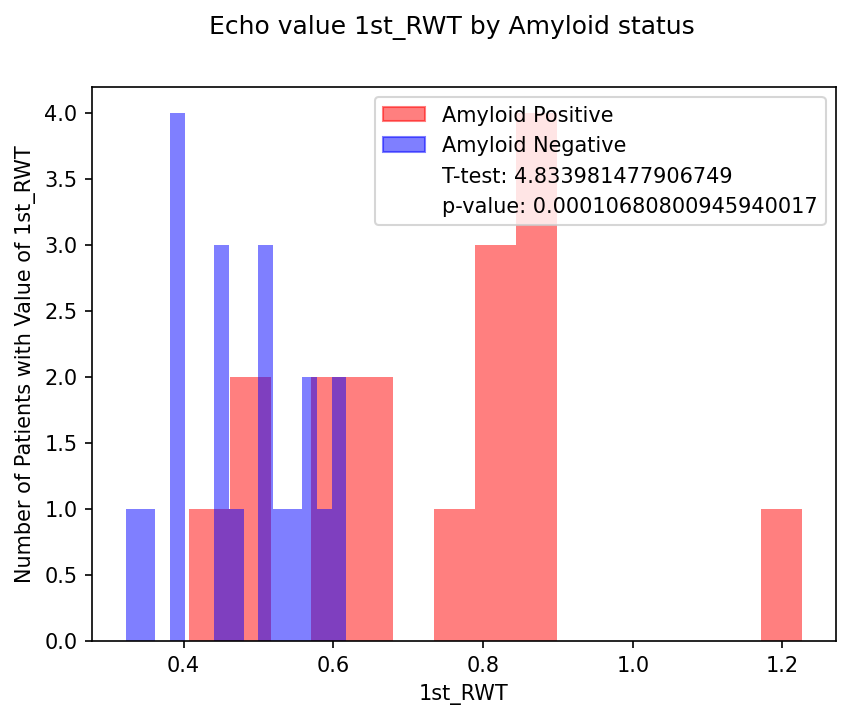

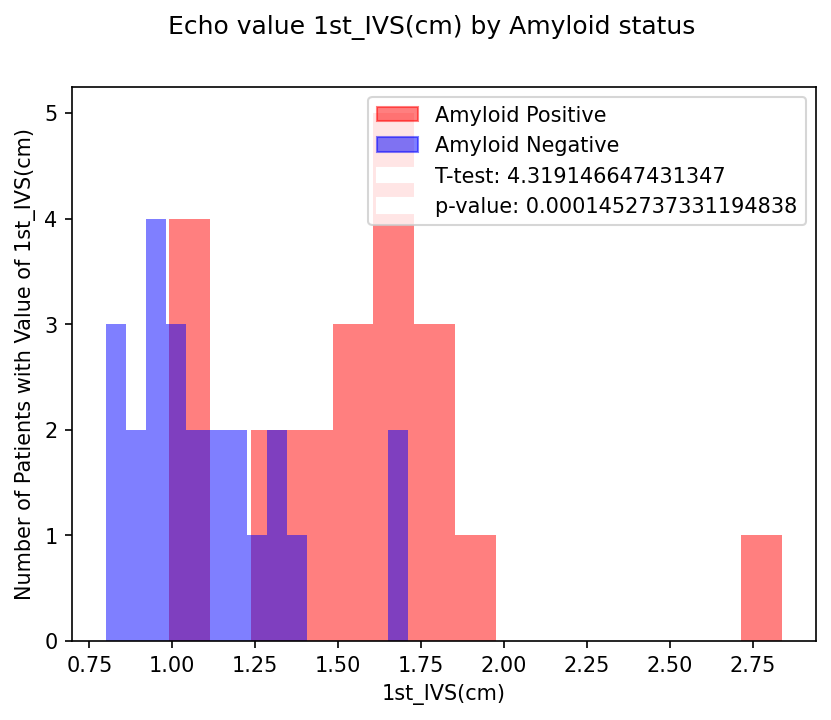

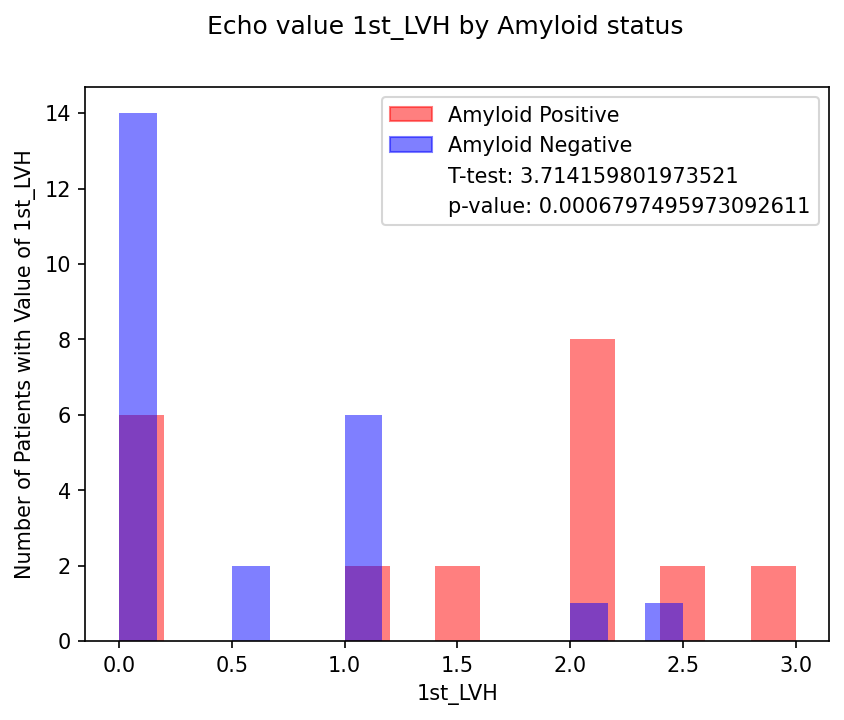

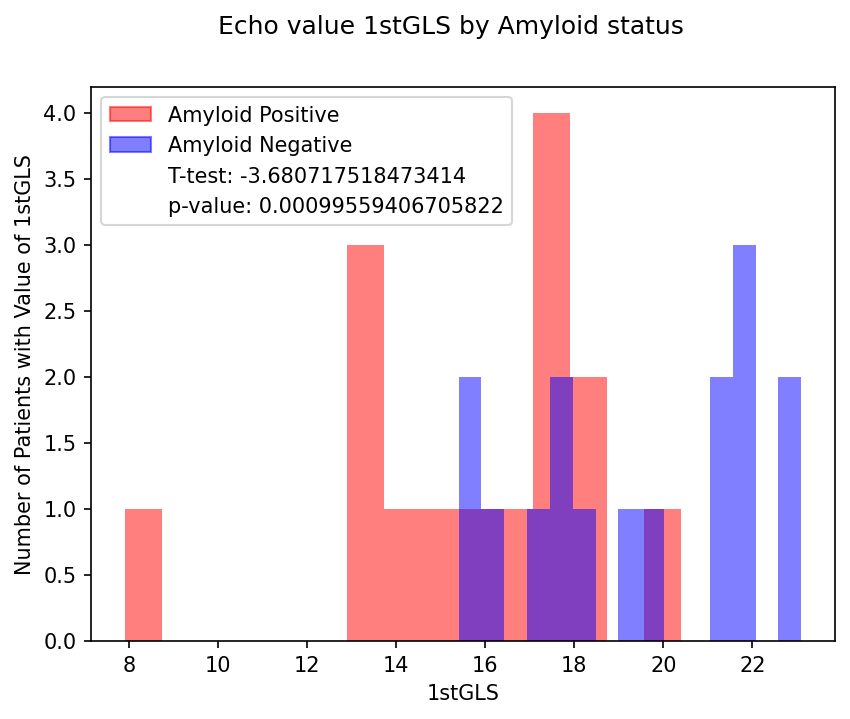

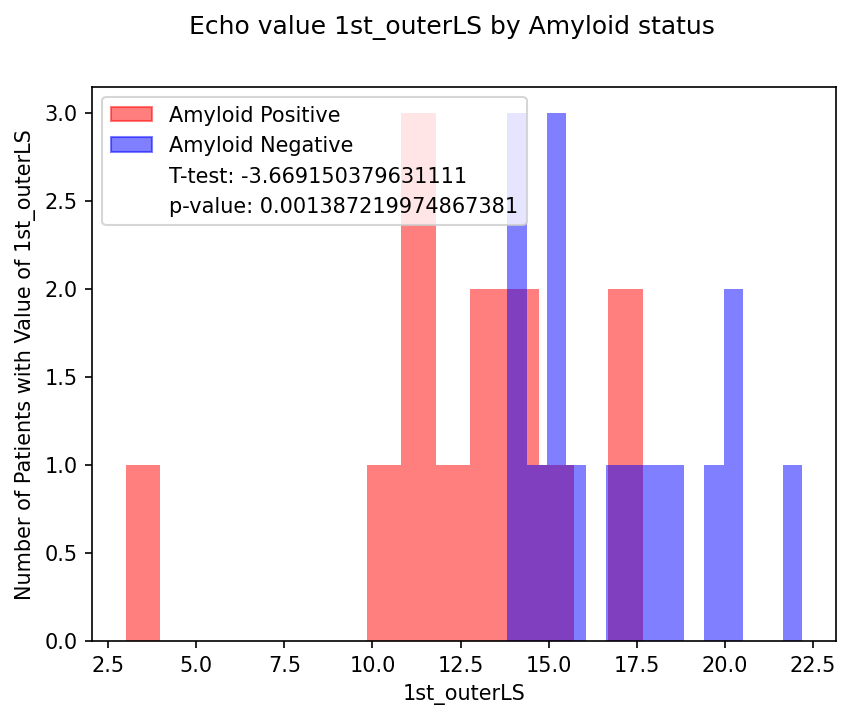

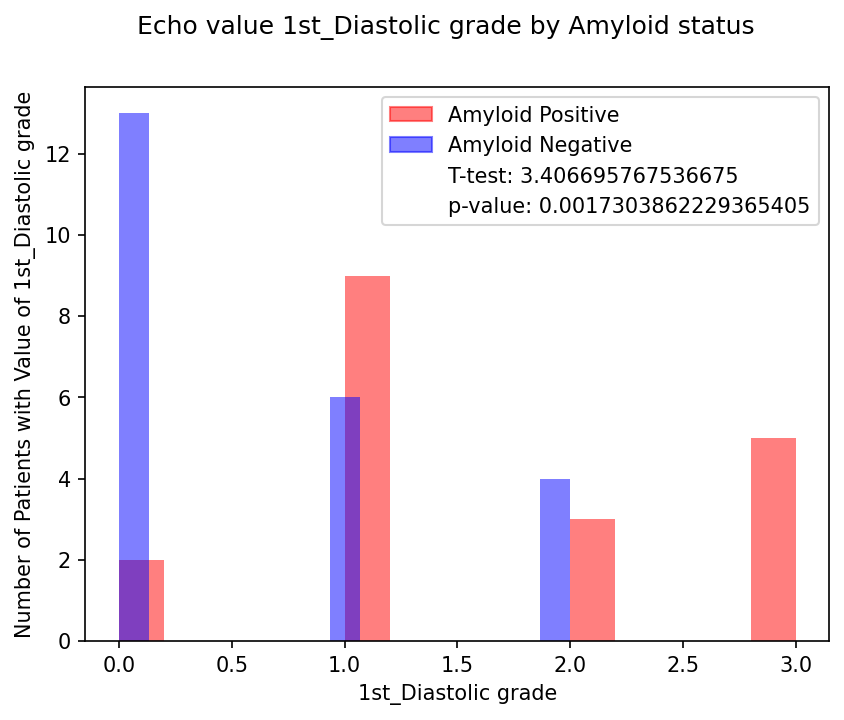

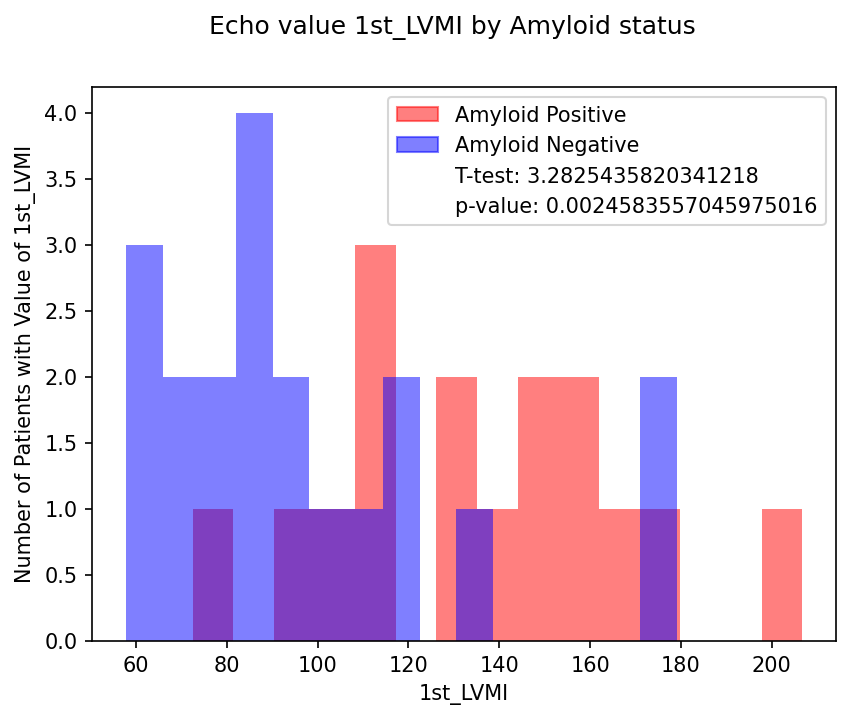

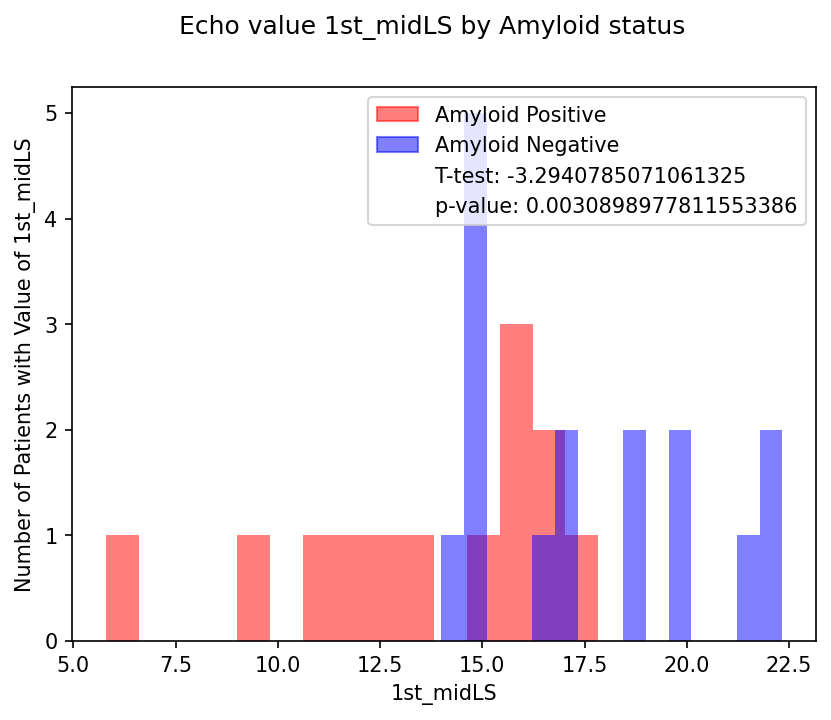

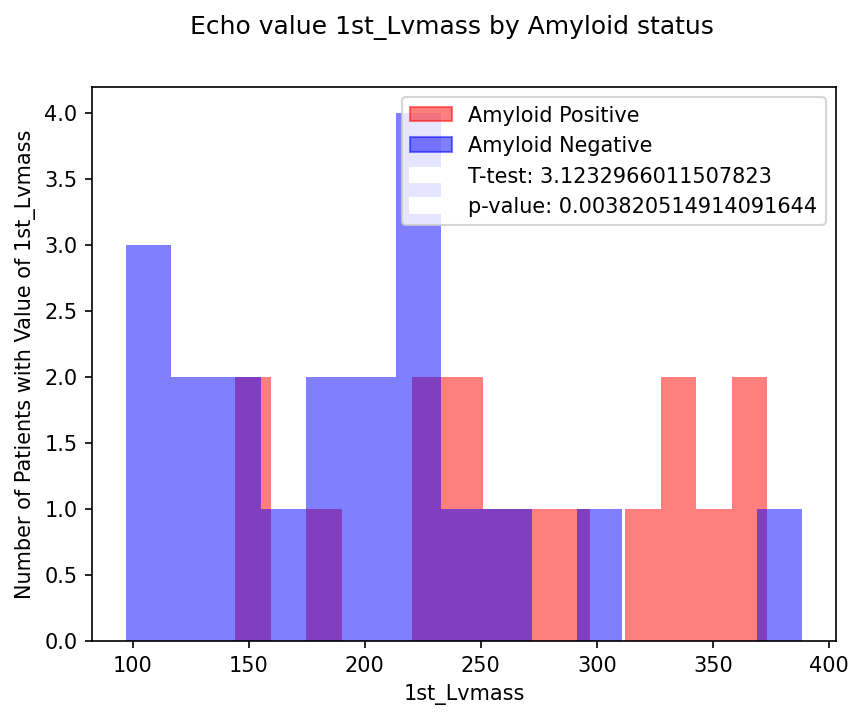

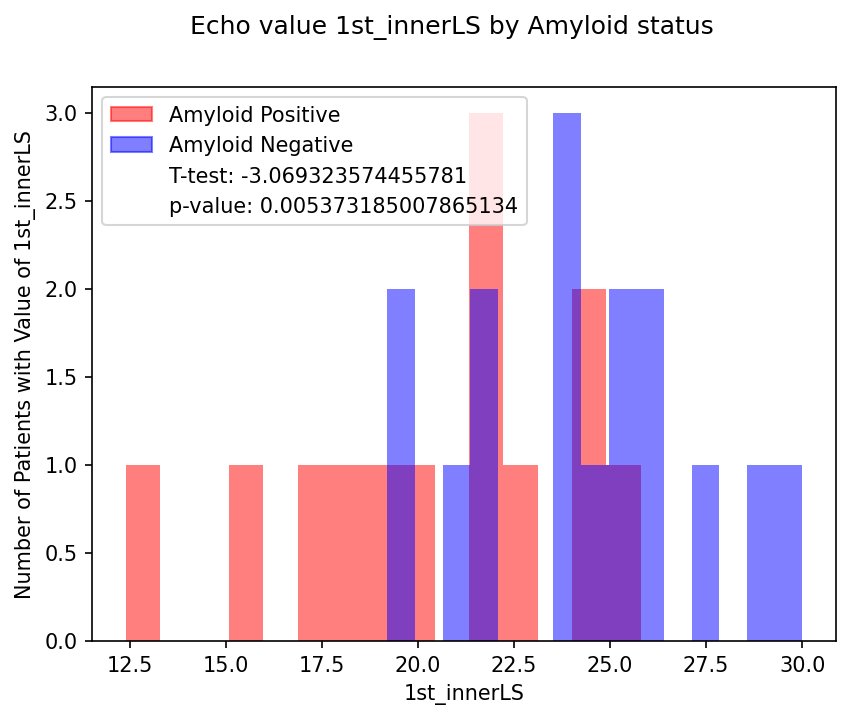

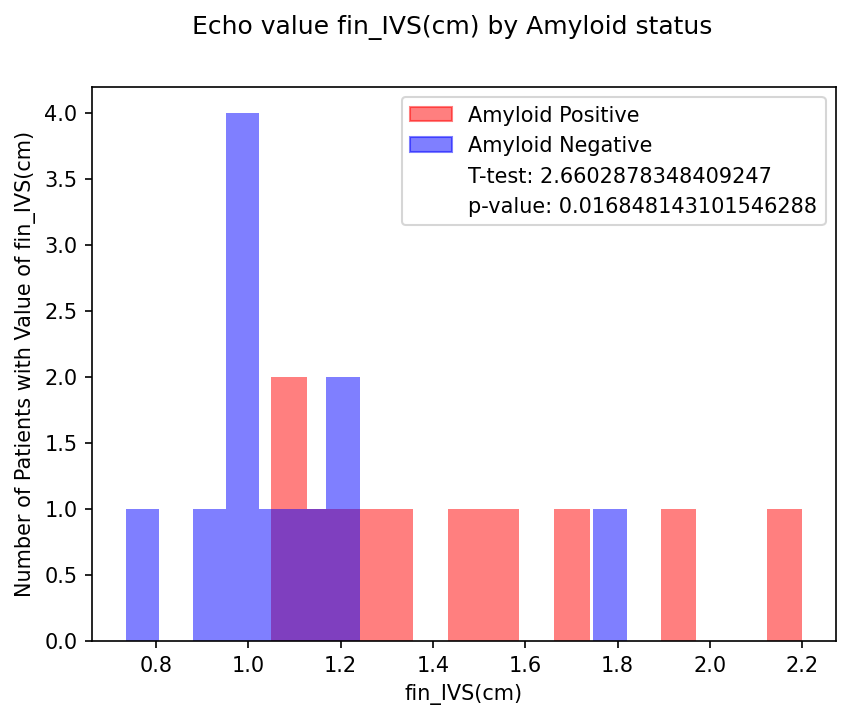

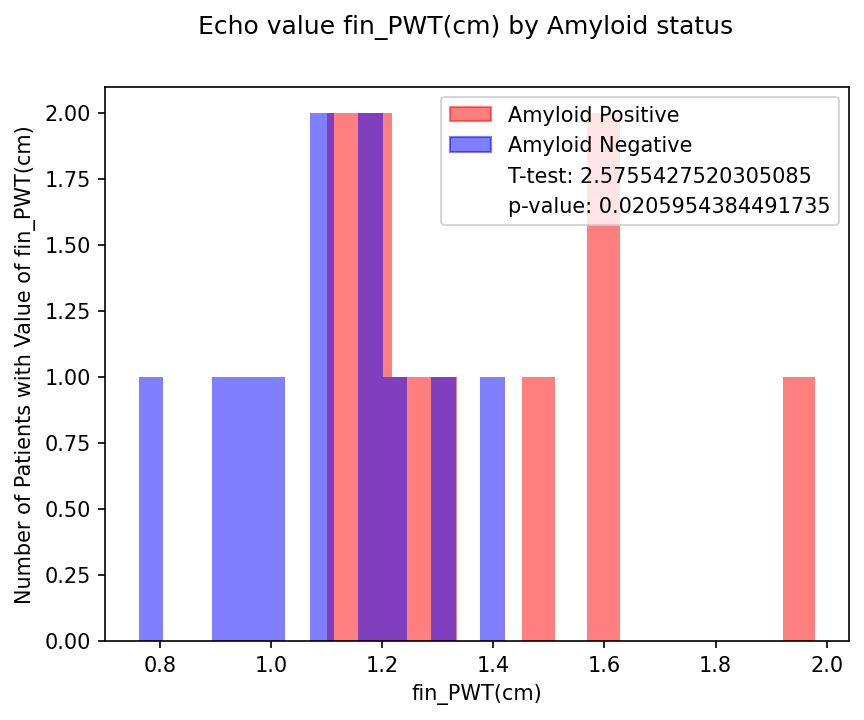

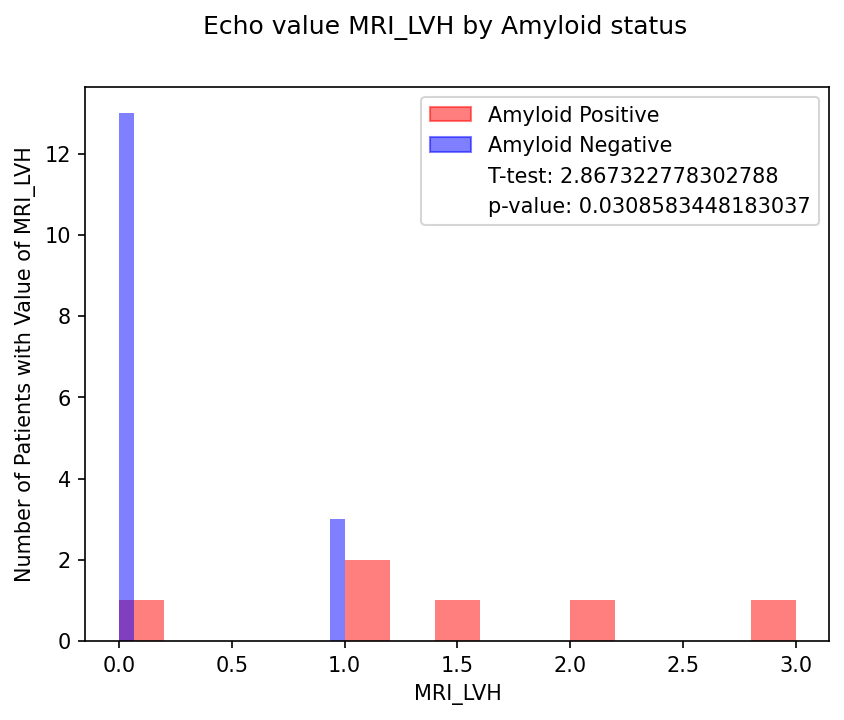

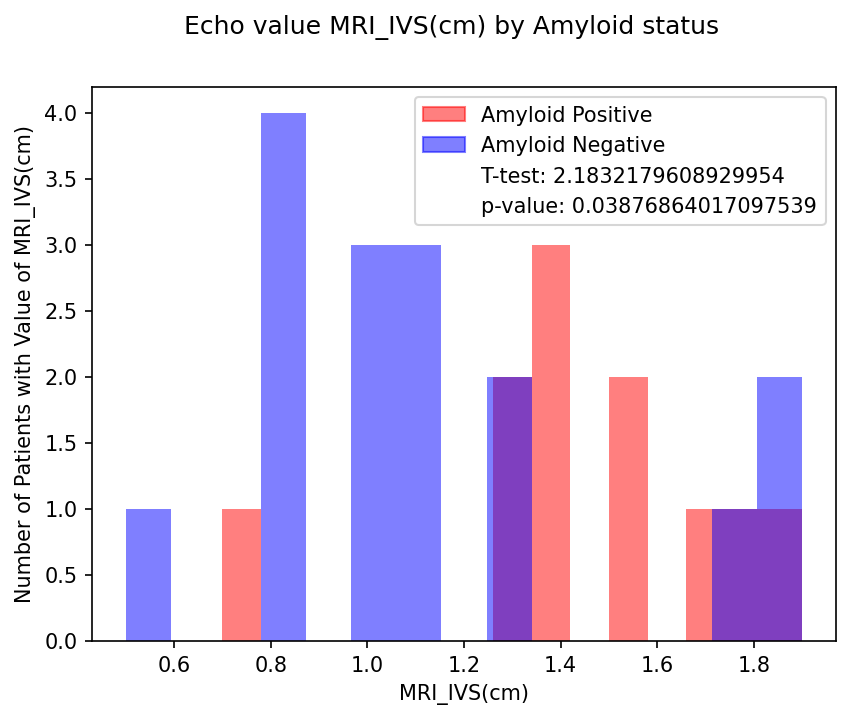

In [158]:
i = 0
for item in columns_to_plot:
    #addition of a way to remove the missing or penalty values... penalty = -1

    dataPostive = df_ALPositive_Echo.loc[df_ALPositive_Echo[item] > penalty_echo].dropna(axis = 'index')
    dataNegative = df_ALNegative_Echo.loc[df_ALNegative_Echo[item] > penalty_echo].dropna(axis = 'index')

    fig, ax = plt.subplots()
    ax.hist(dataPostive[item], bins = 15, color = "red", alpha =0.5)
    ax.hist(dataNegative[item], bins = 15, color = "blue", alpha = 0.5)
    ax.set_xlabel(item)
    ax.set_ylabel("Number of Patients with Value of " + item)
    amyloidpositive_patch = mpatches.Patch(color = 'red', alpha = 0.5, label = "Amyloid Positive")
    amyloidnegative_patch = mpatches.Patch(color = "blue", alpha = 0.5, label = "Amyloid Negative")
    stats_T_patch = mpatches.Patch(color = "white", label = "T-test: " + str(df_imagingValue_stats_2.at[item, 'statistic']))
    stats_pvalue_patch = mpatches.Patch(color = "white", label = "p-value: " + str(df_imagingValue_stats_2.at[item, 'pvalue']))
    ax.legend(handles = [amyloidpositive_patch, amyloidnegative_patch, stats_T_patch, stats_pvalue_patch])
    fig.suptitle("Echo value " + item + " by Amyloid status")

    fig_file_out = outputFiguresPath(fileName_header=fileNameHeader_all, fileName_mid= "p005_" + str(i) + "_fig_" , 
                                 fileName_suff= fileNameSuffix, parent_dir=outputDir, folderName=folder_data_out)
    
    fig.savefig(fig_file_out, bbox_inches = "tight")
    i = i+1

C:\Users\maega\AppData\Local\Temp\ipykernel_73592\2853777093.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


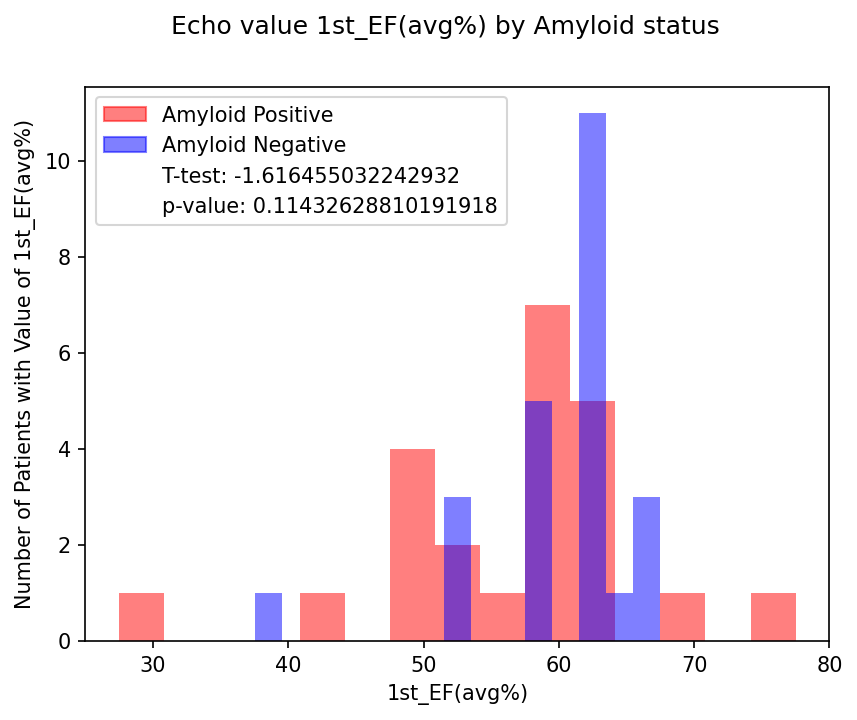

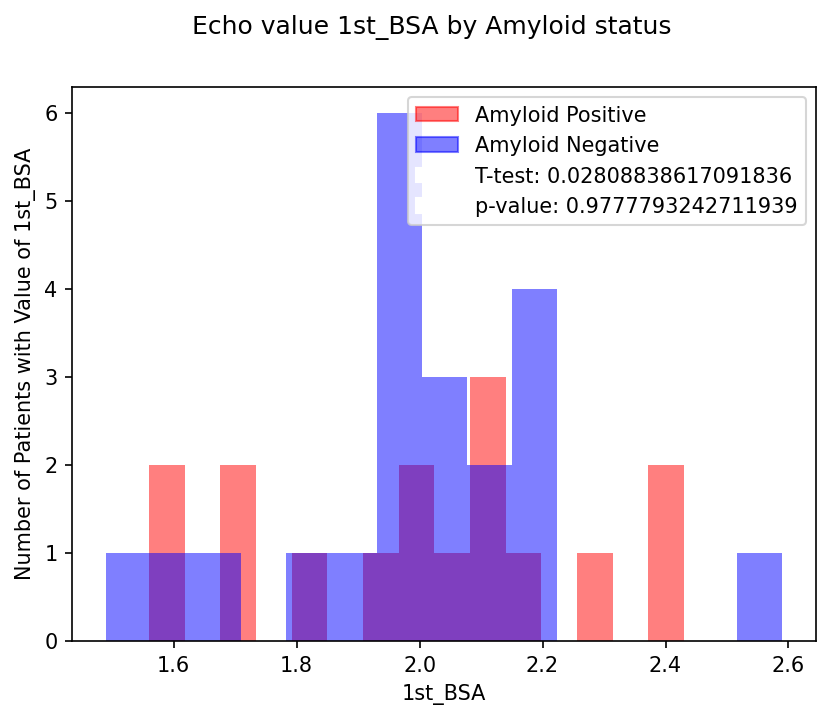

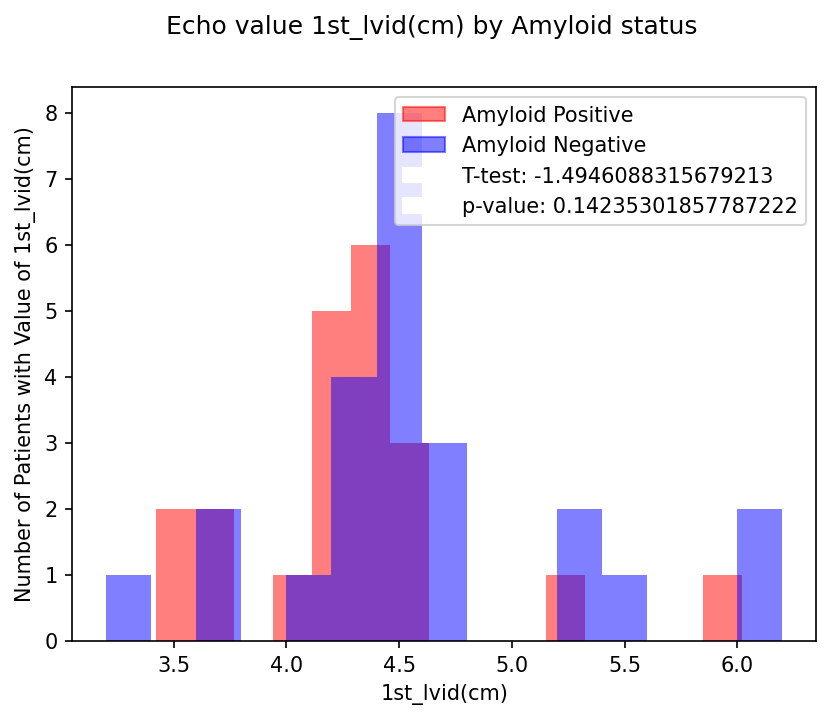

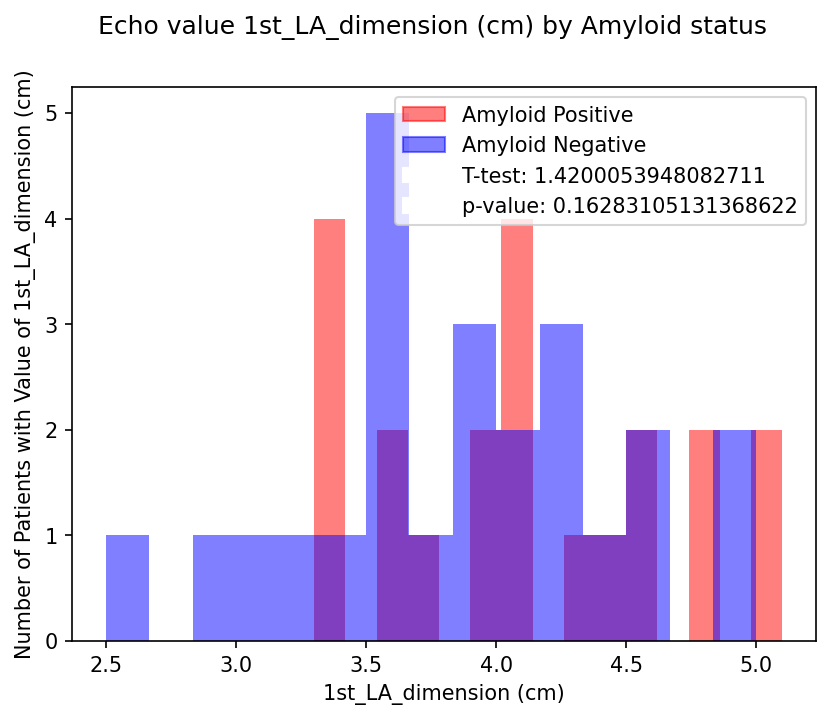

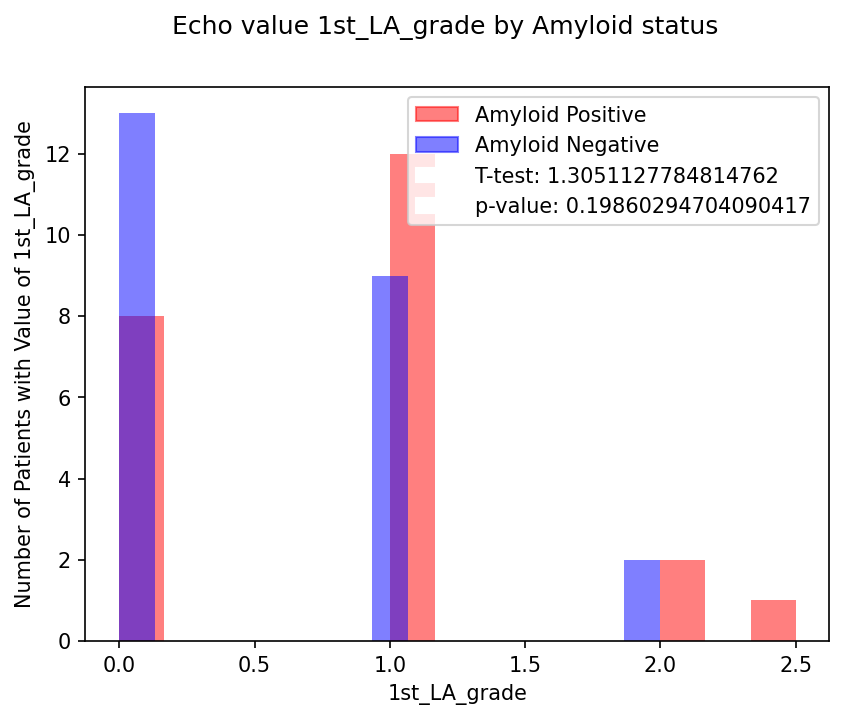

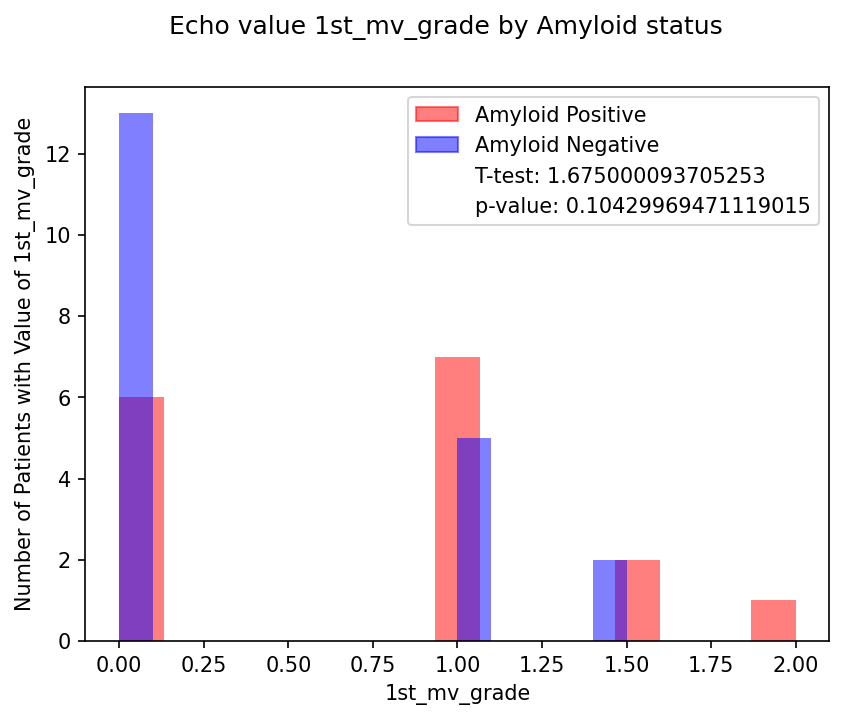

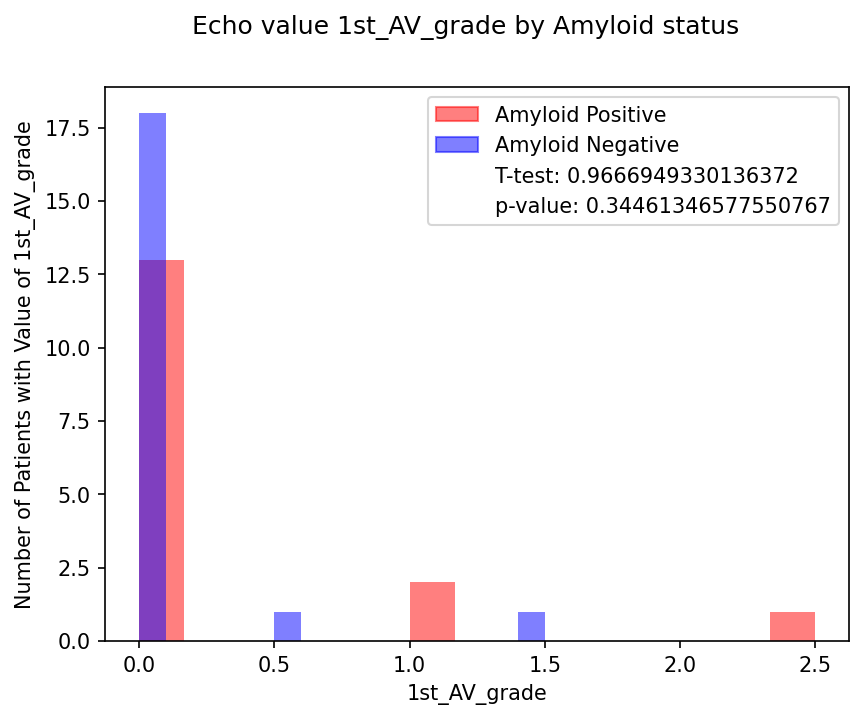

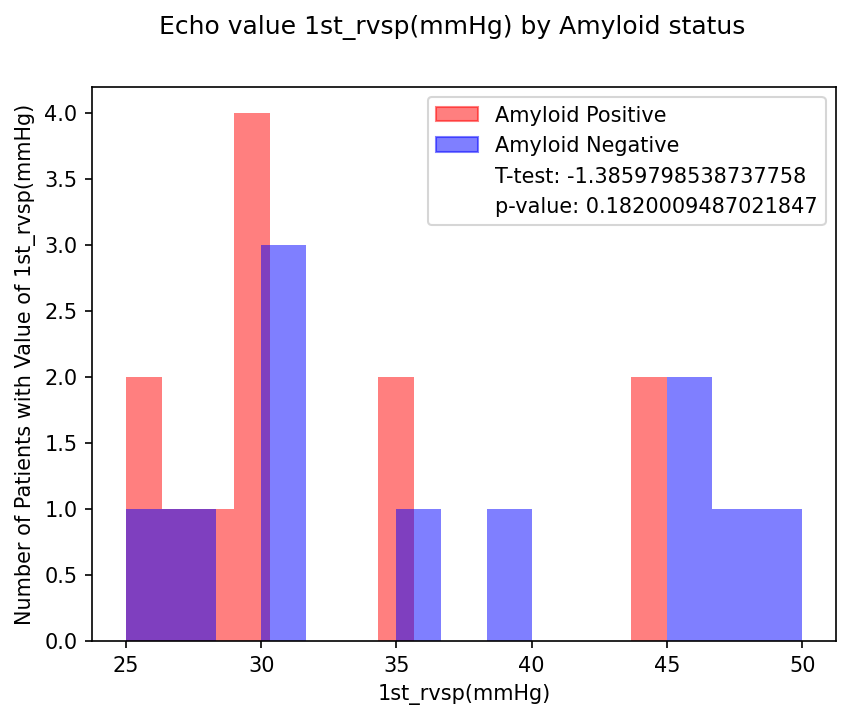

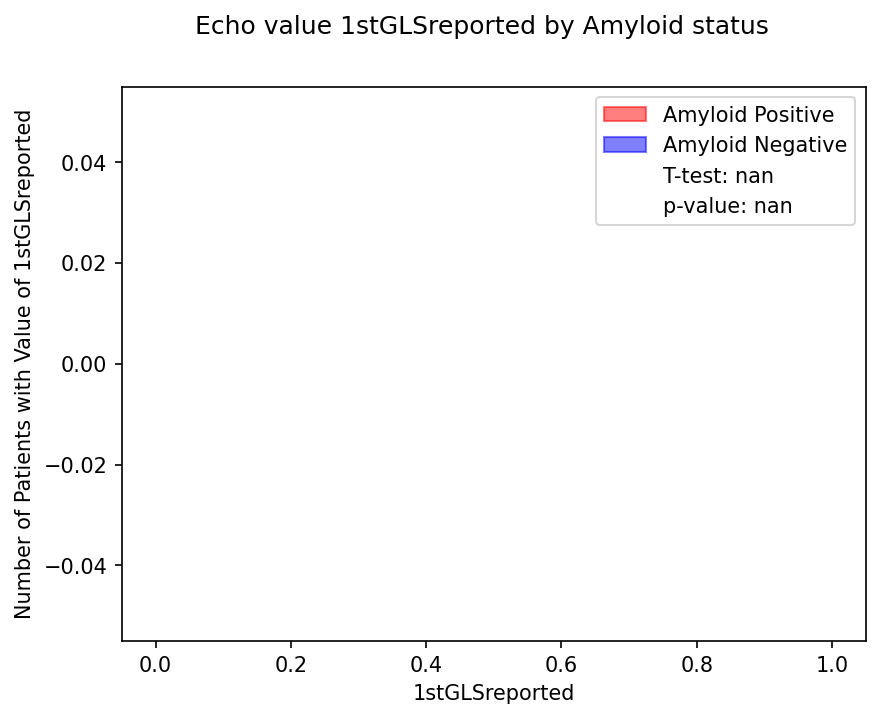

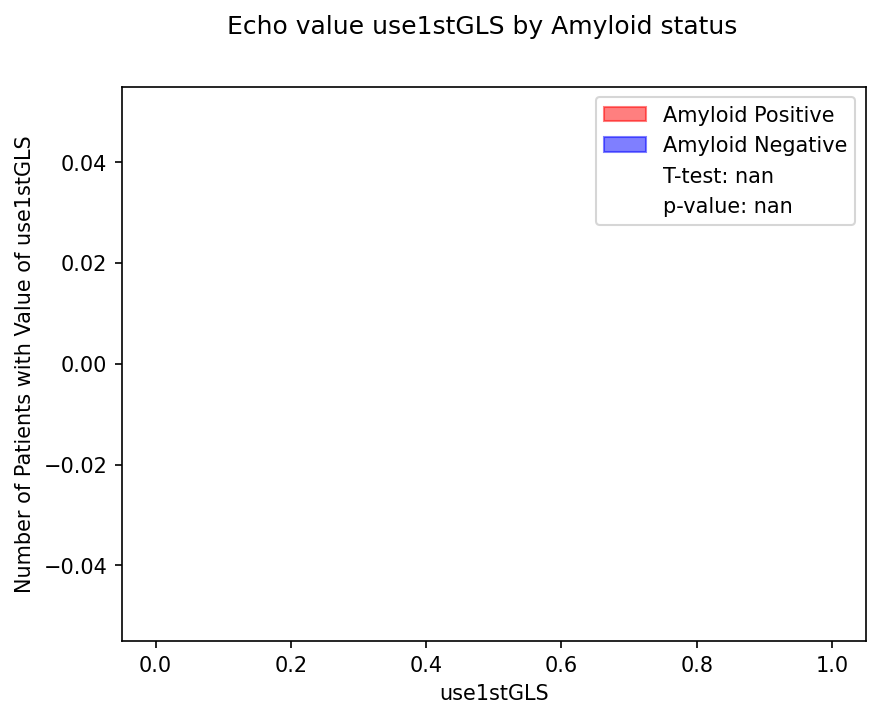

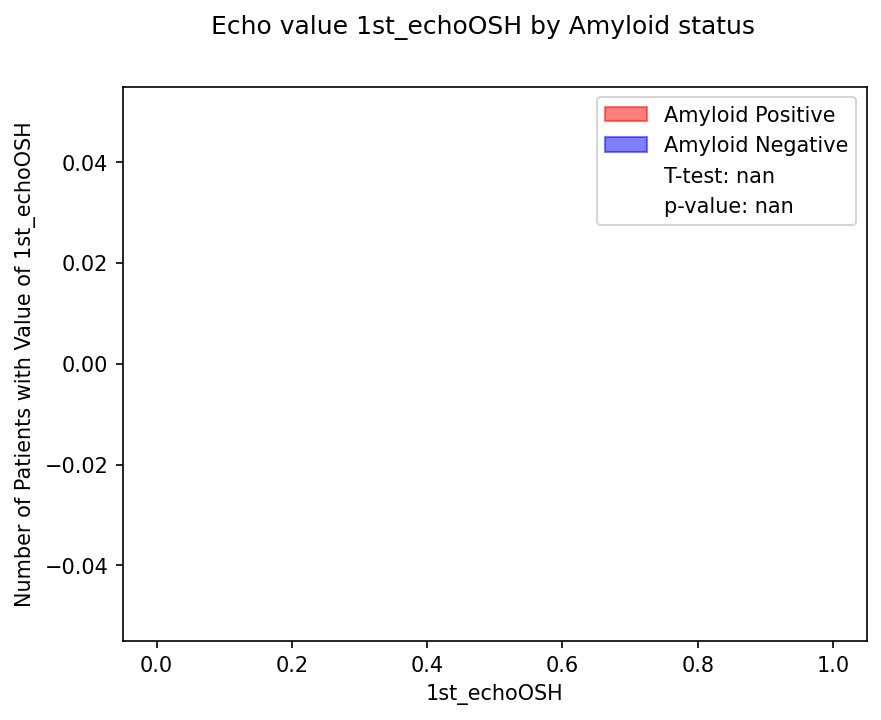

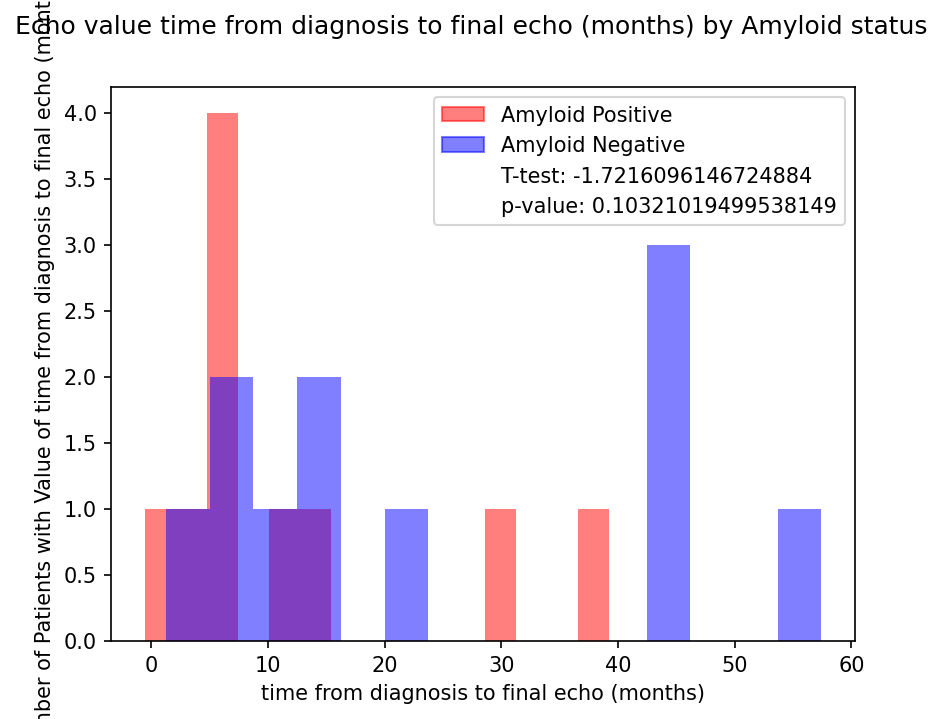

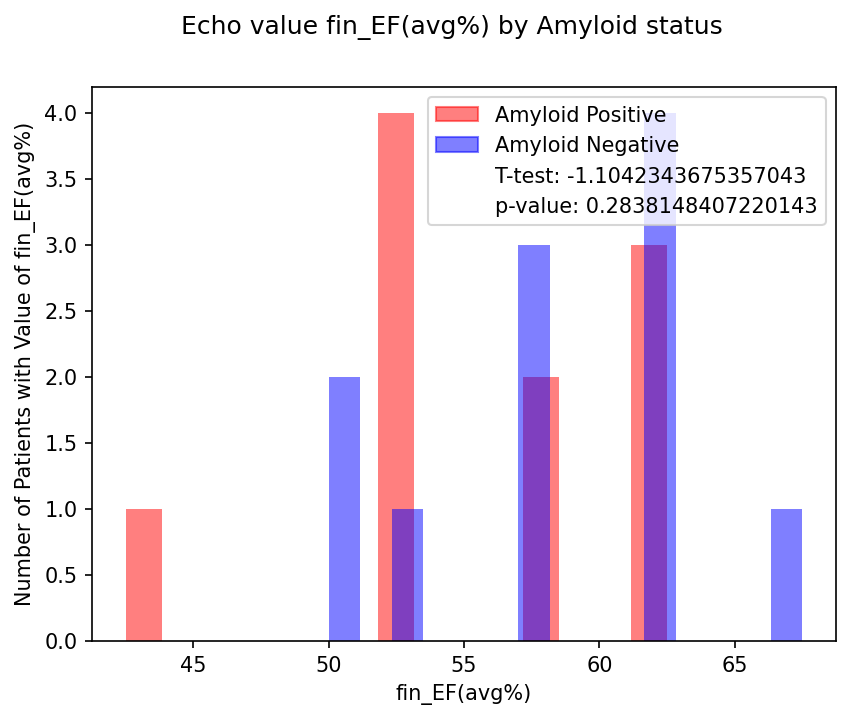

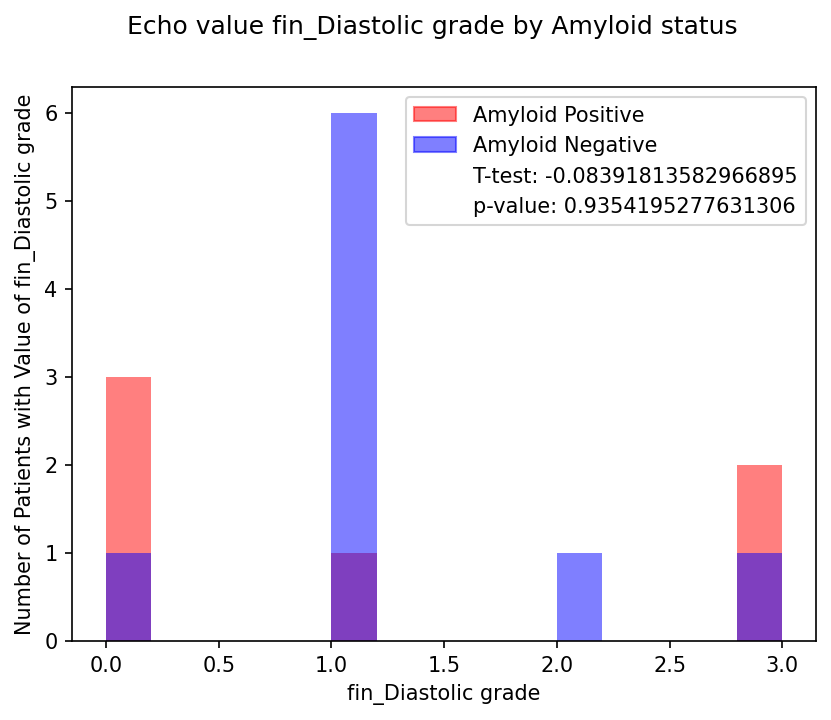

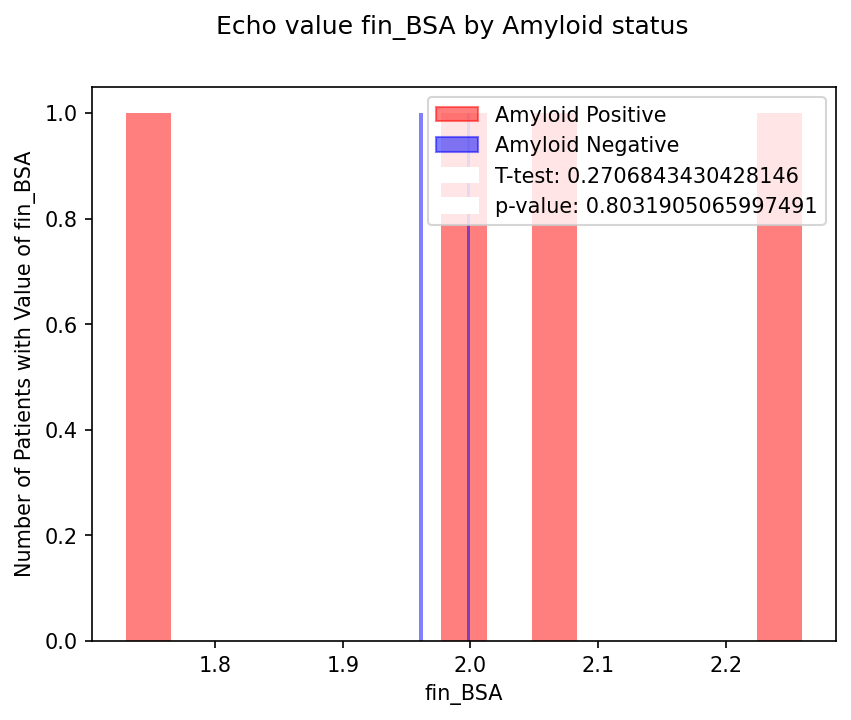

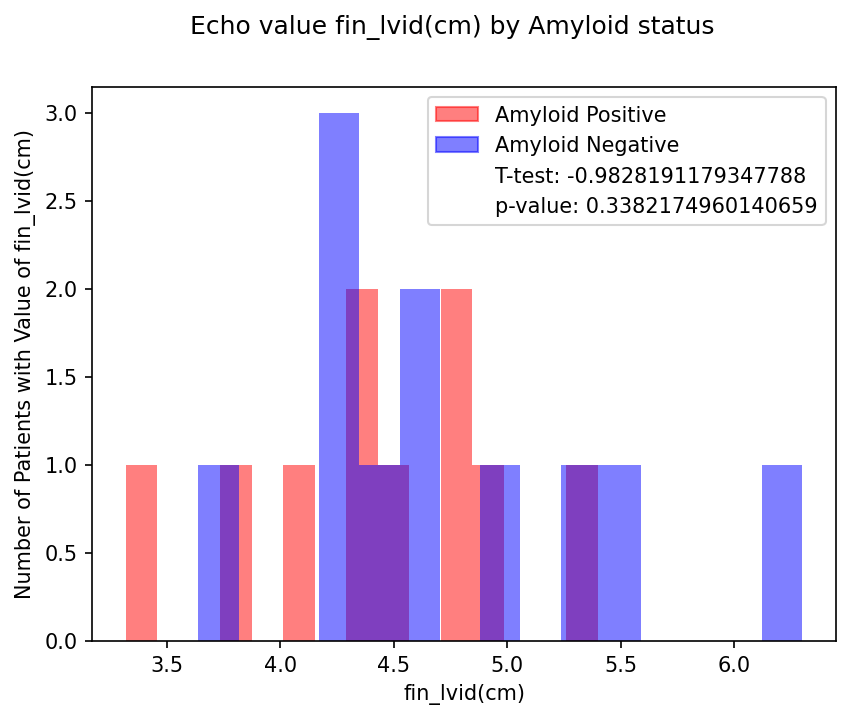

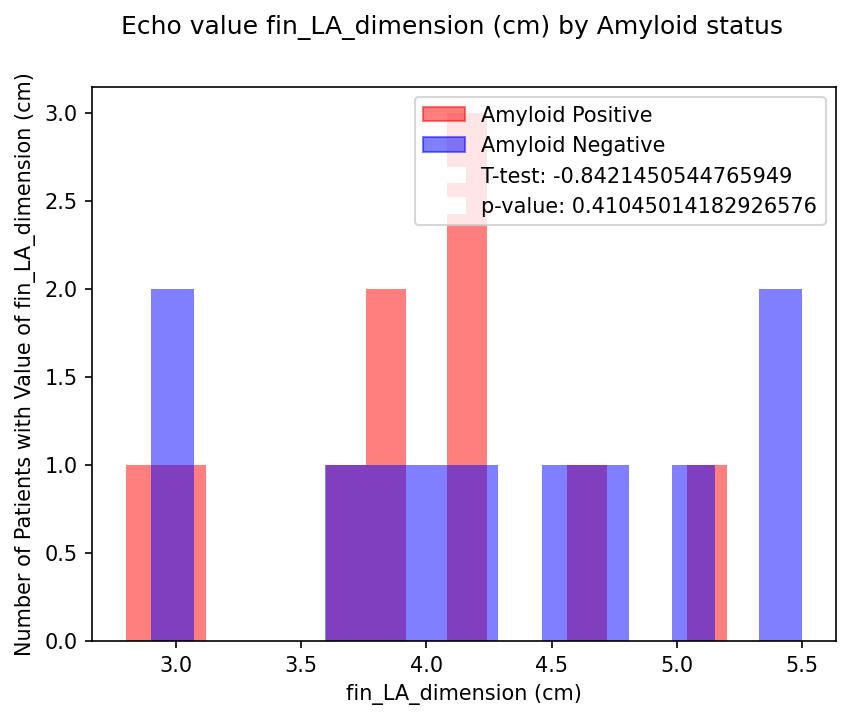

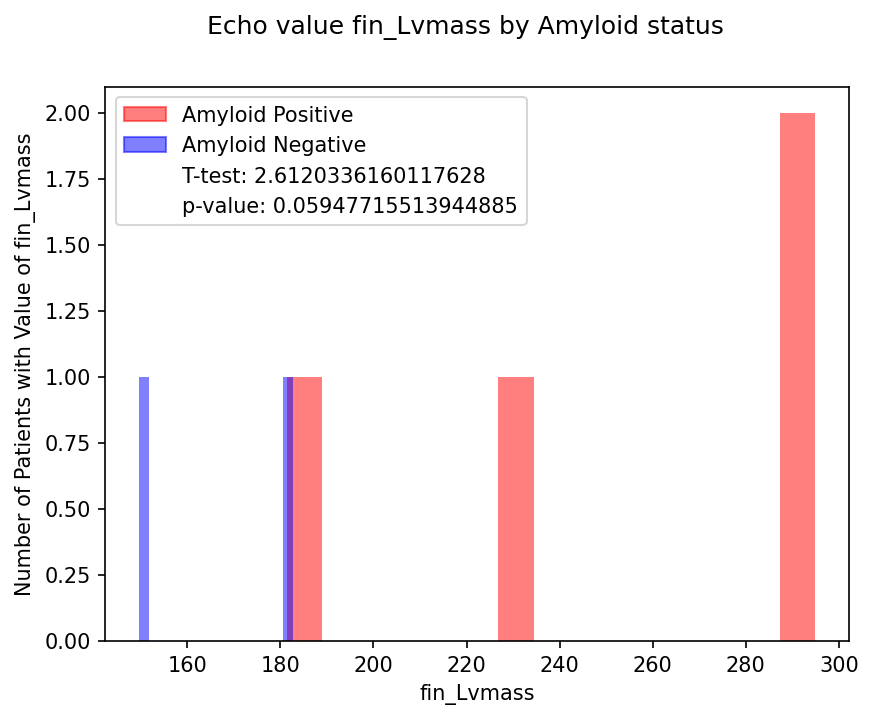

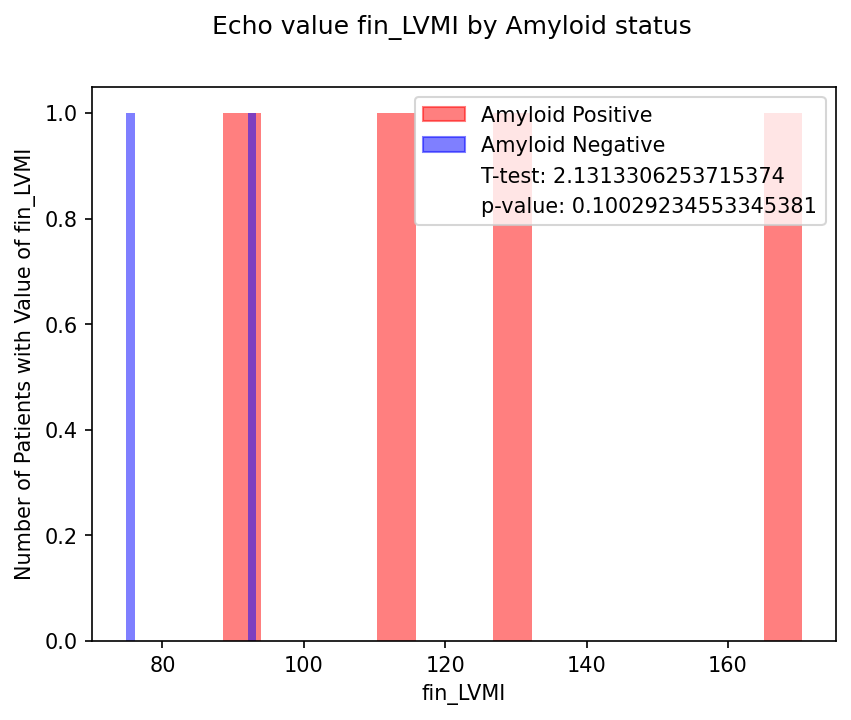

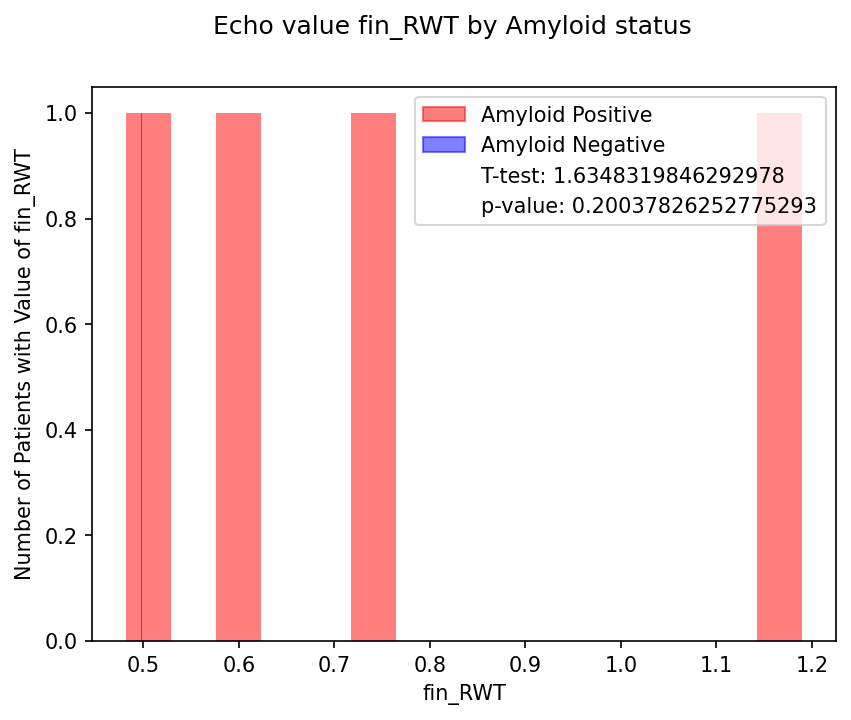

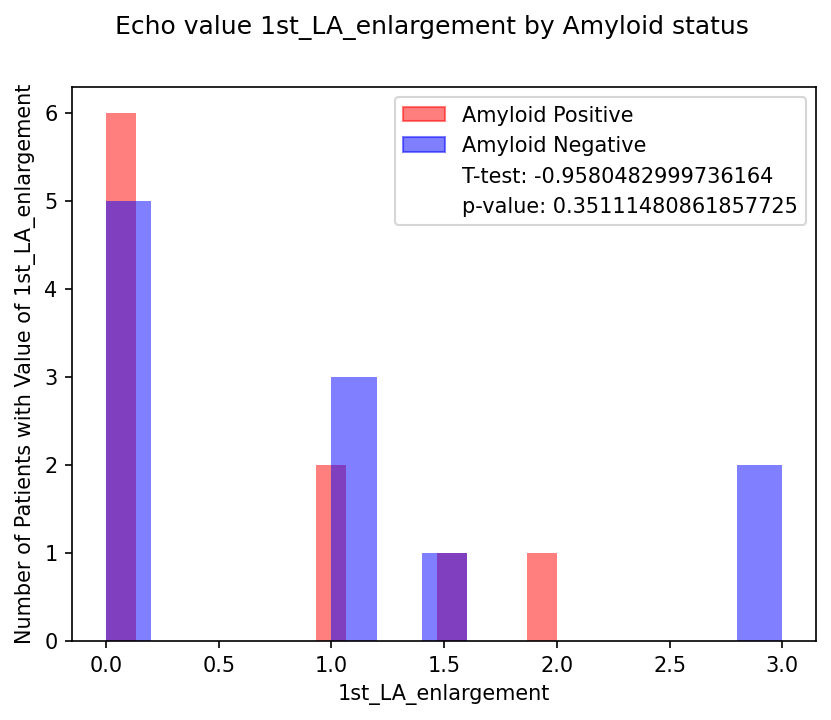

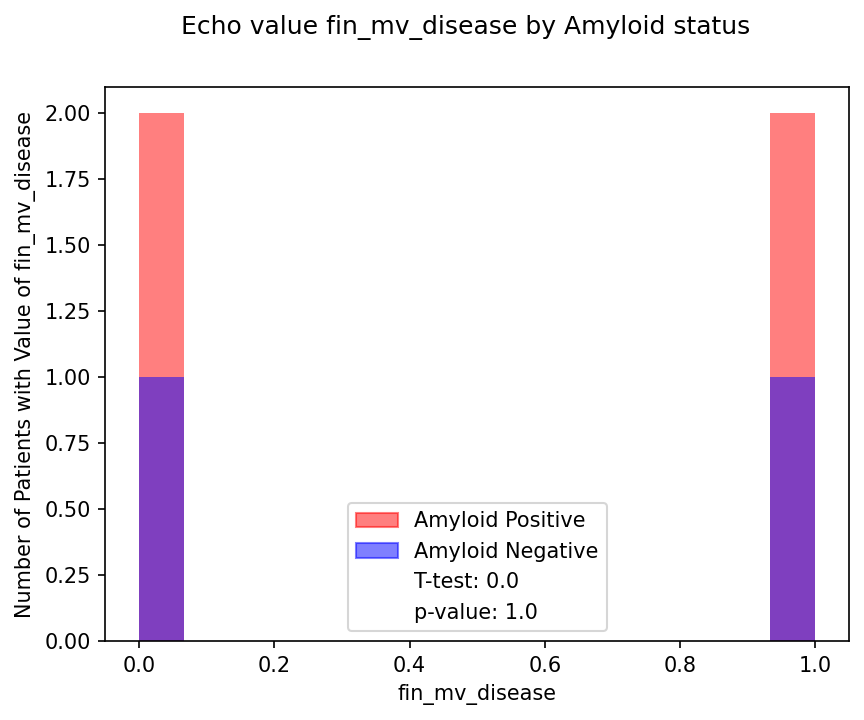

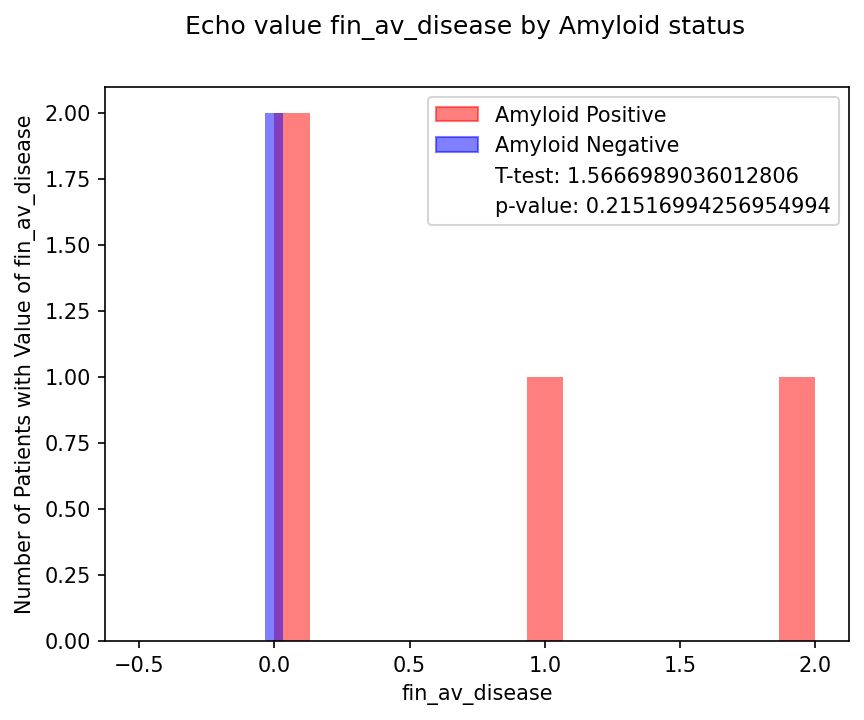

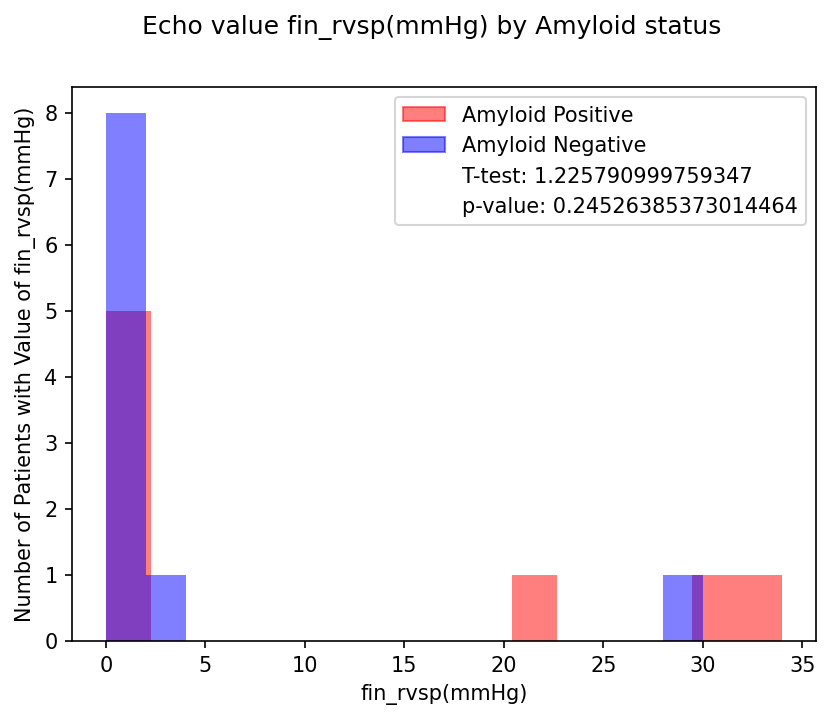

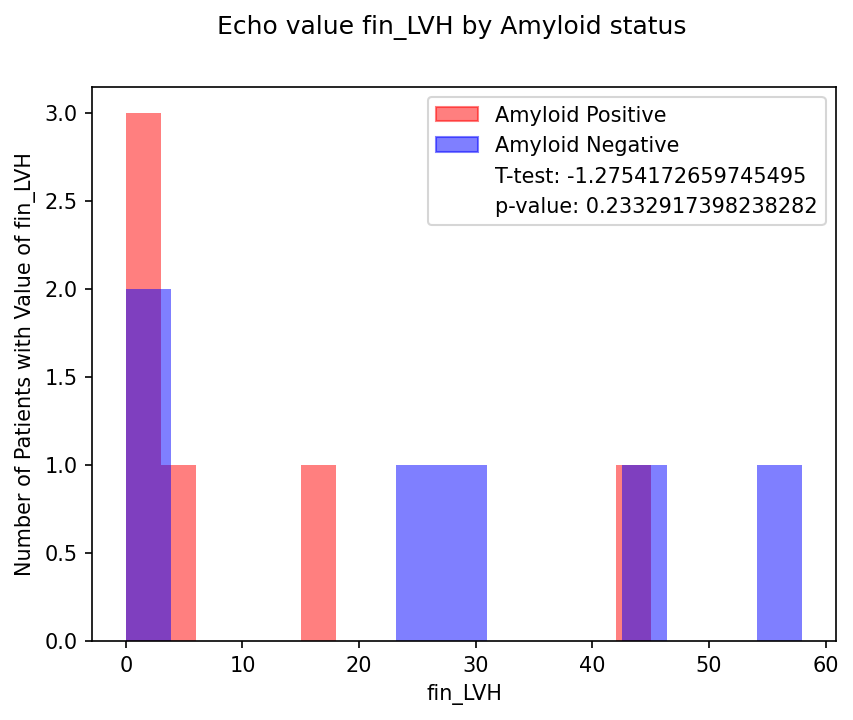

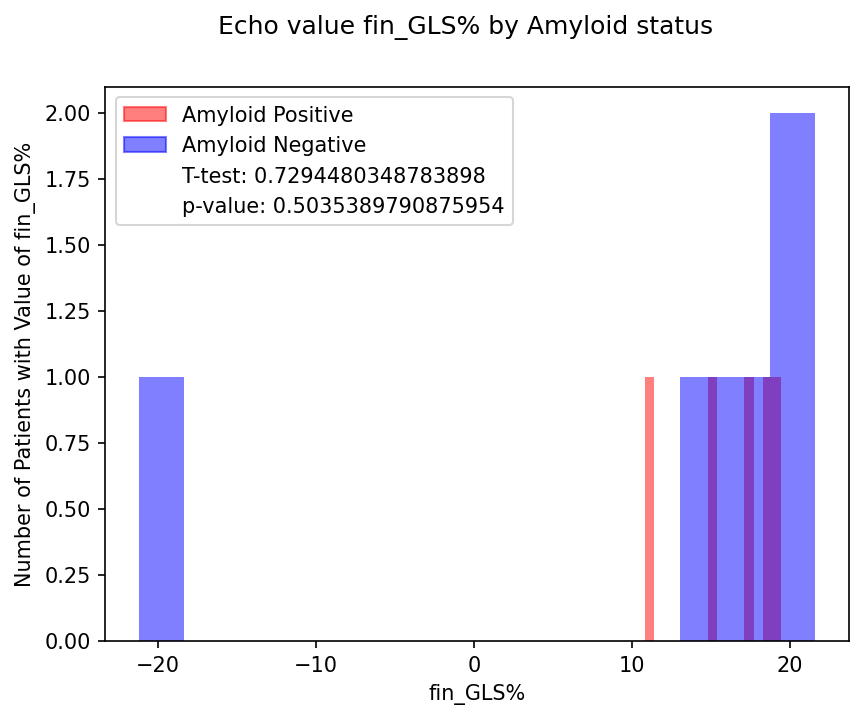

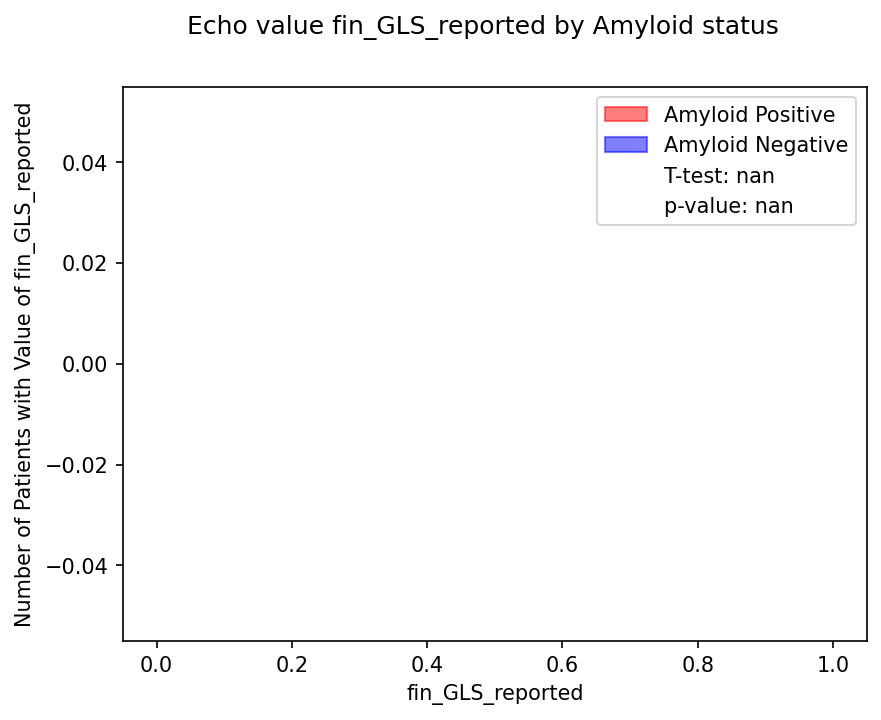

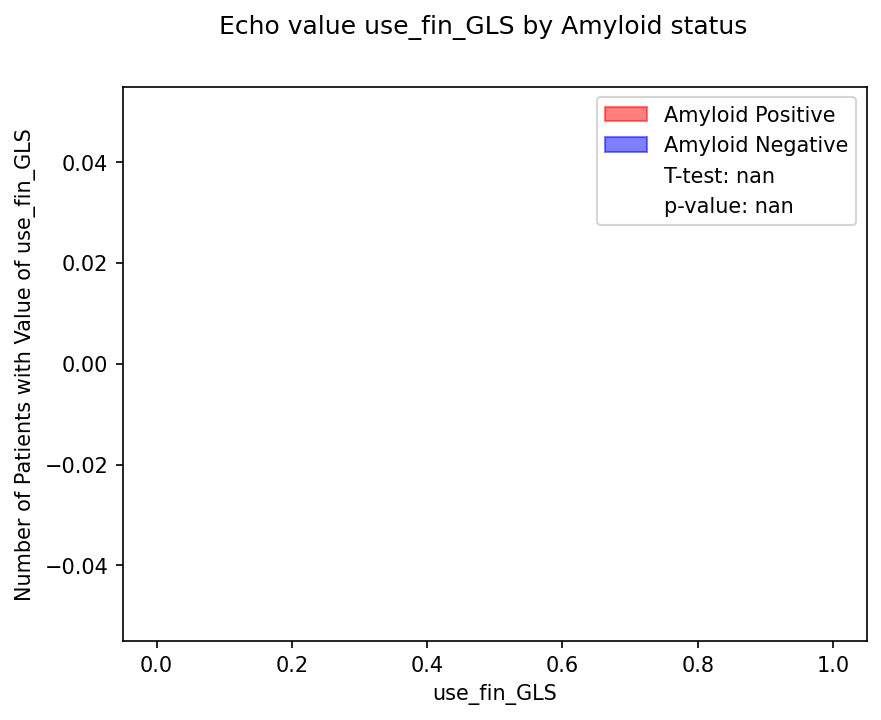

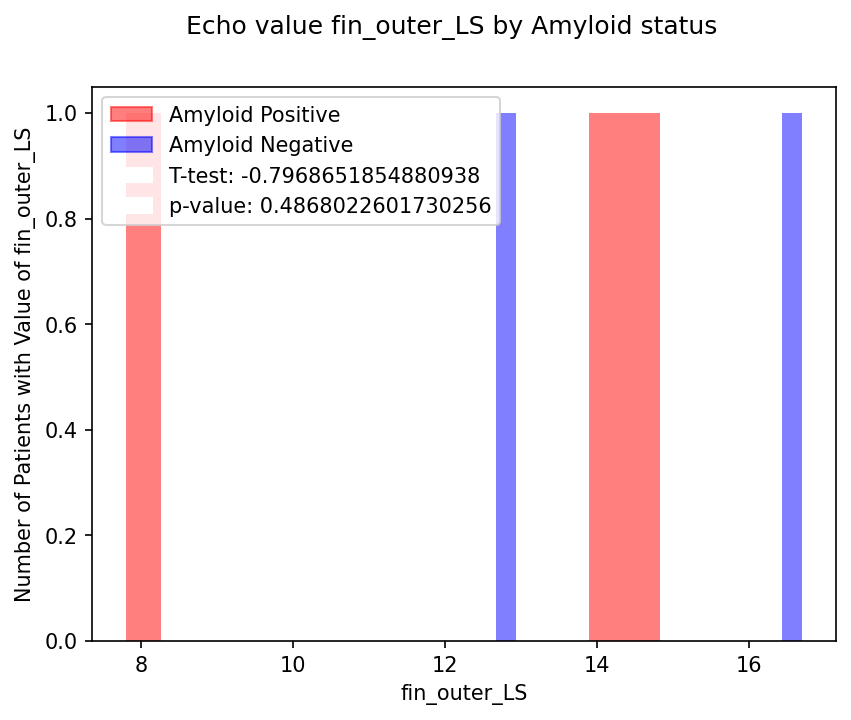

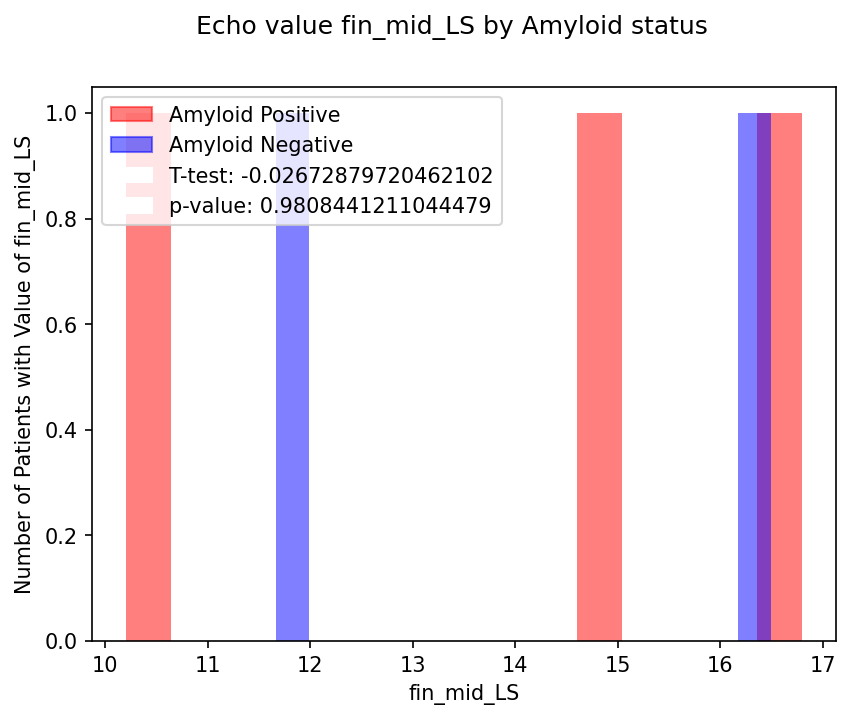

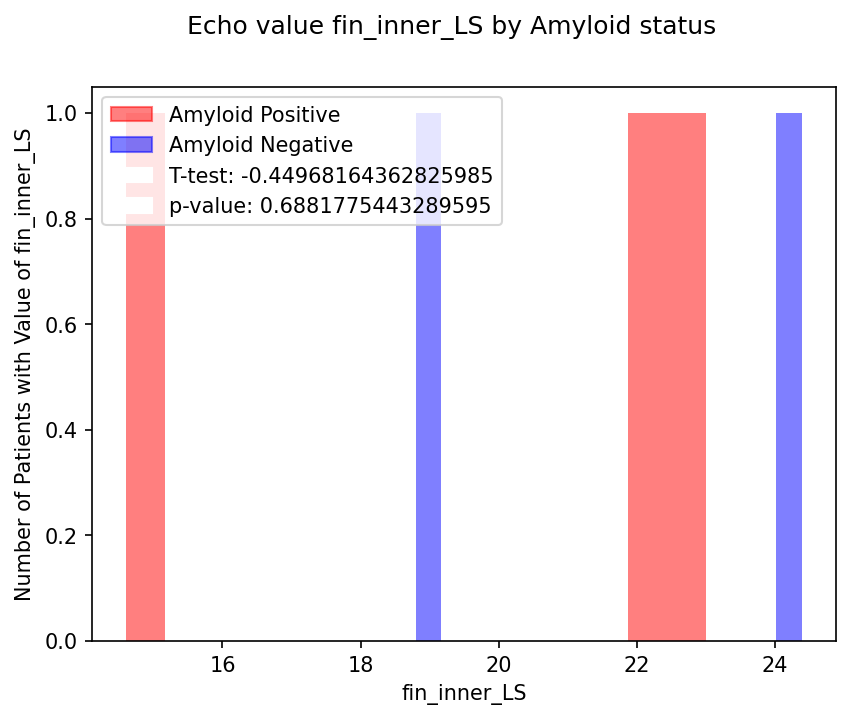

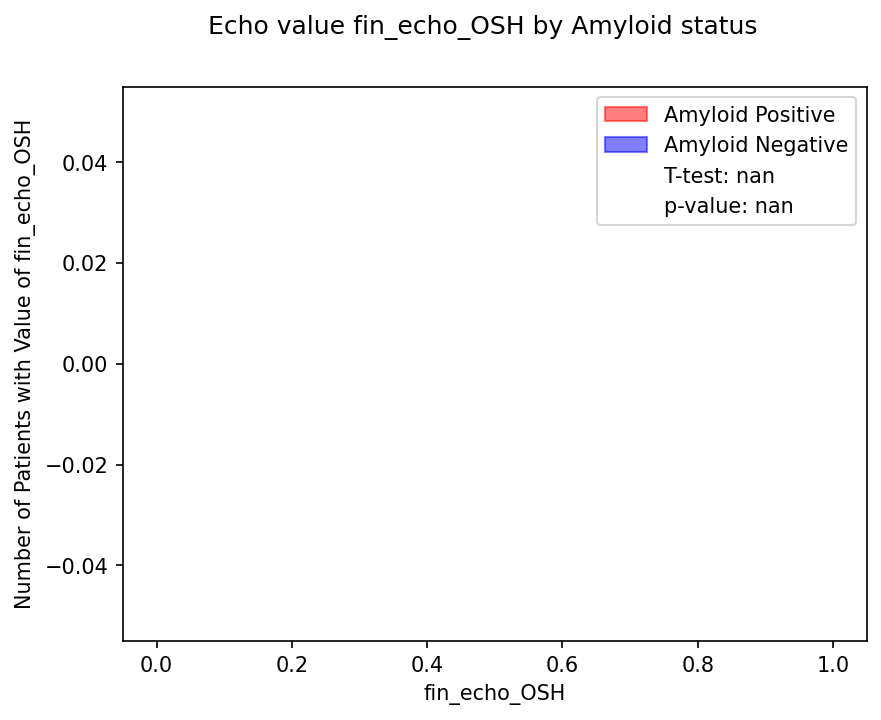

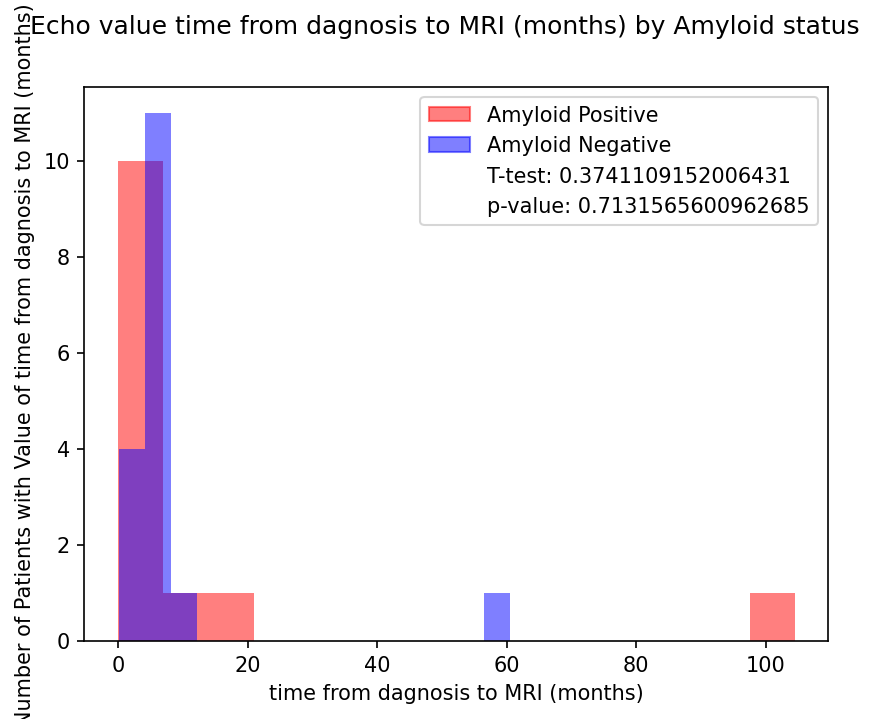

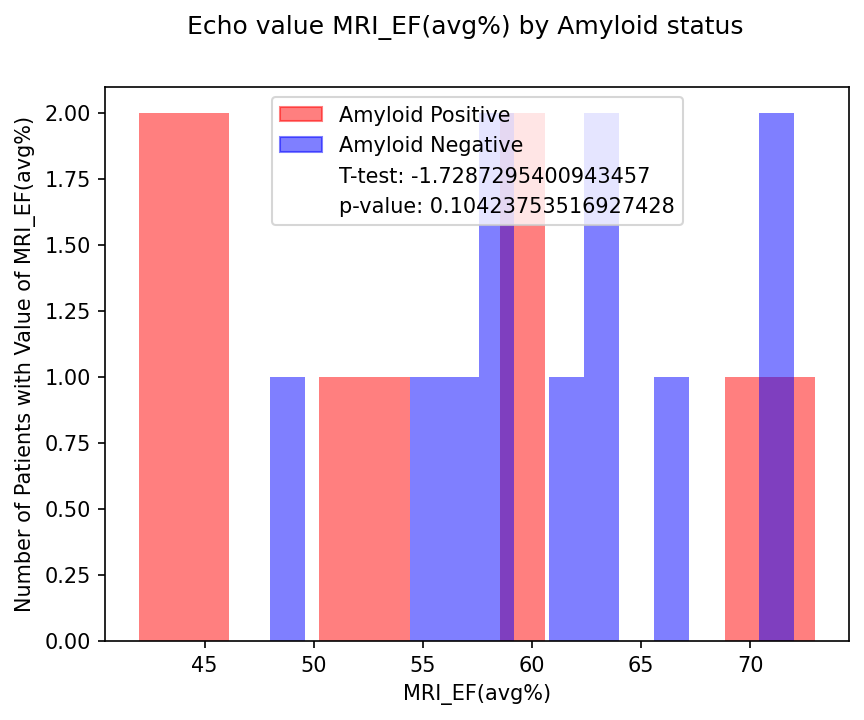

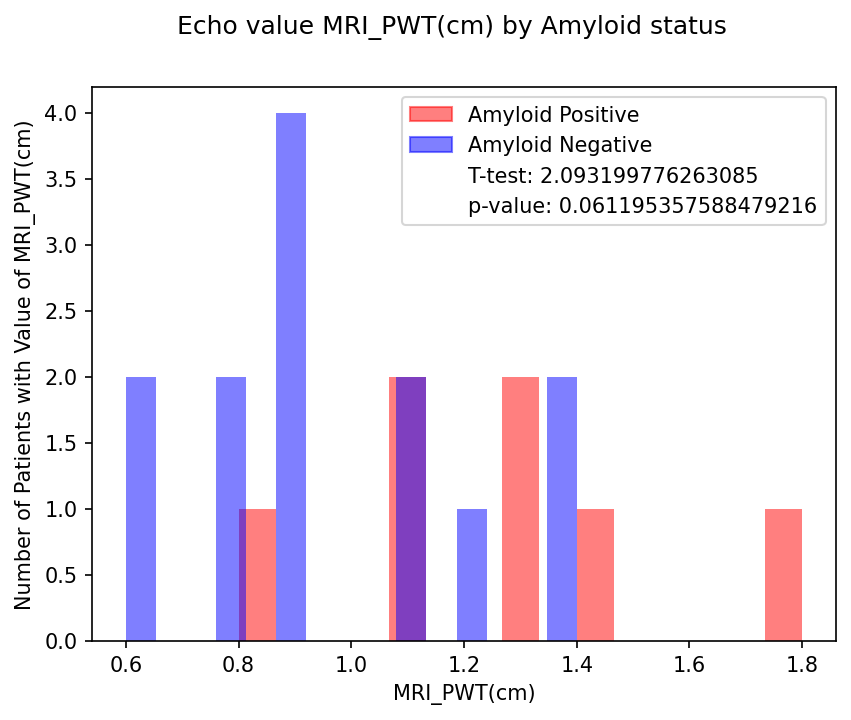

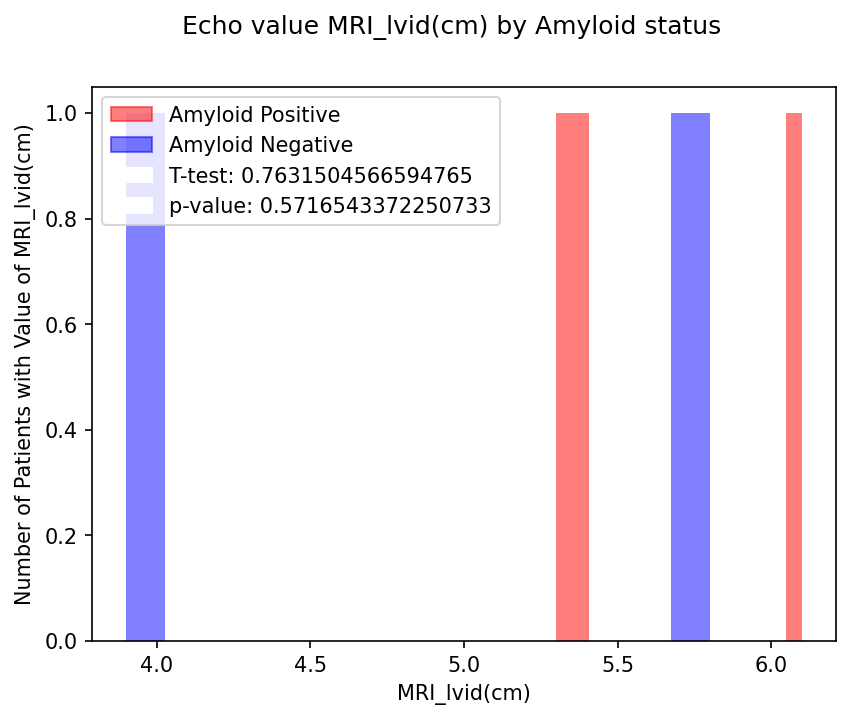

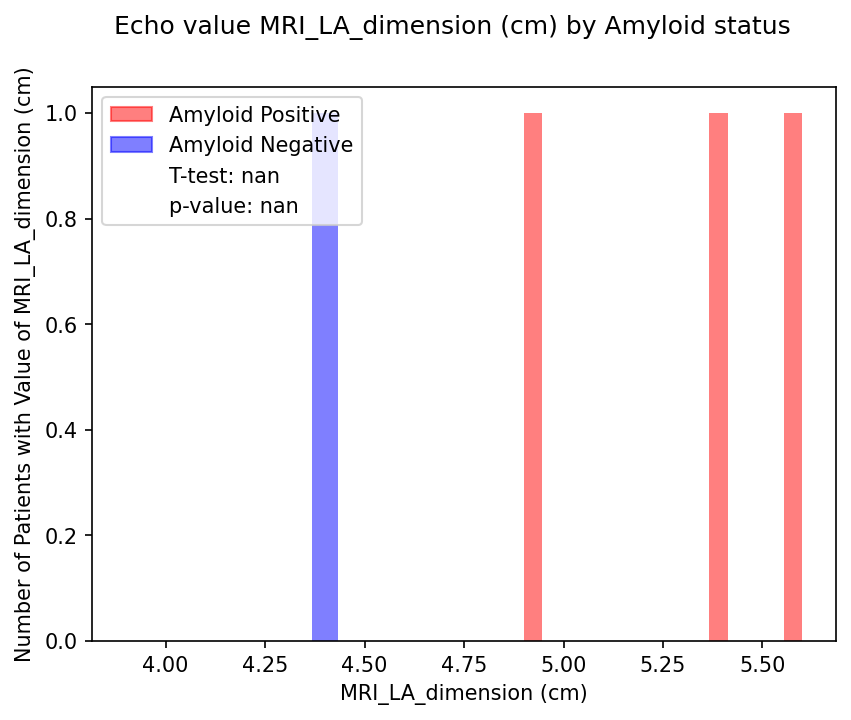

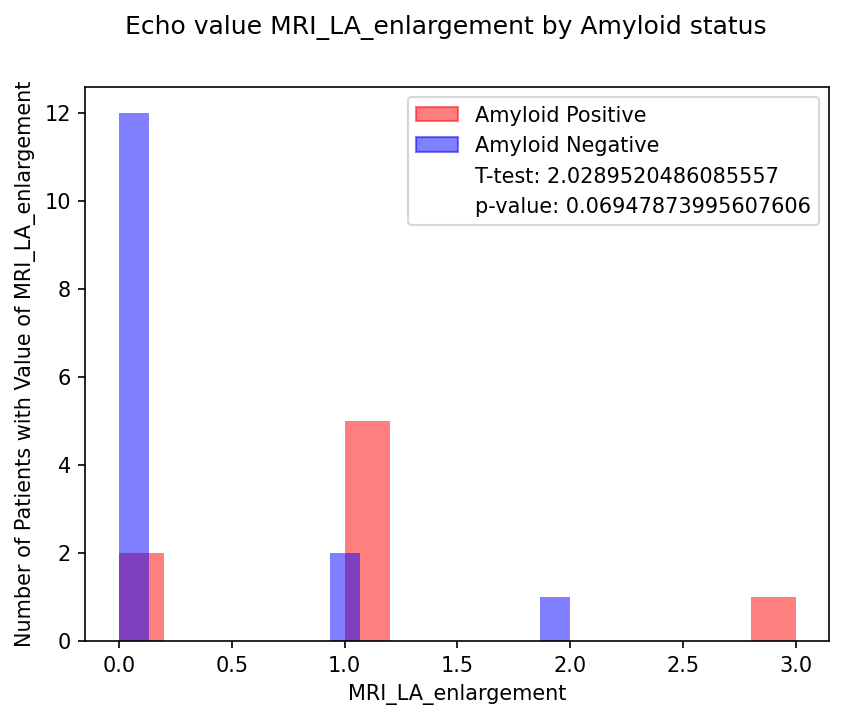

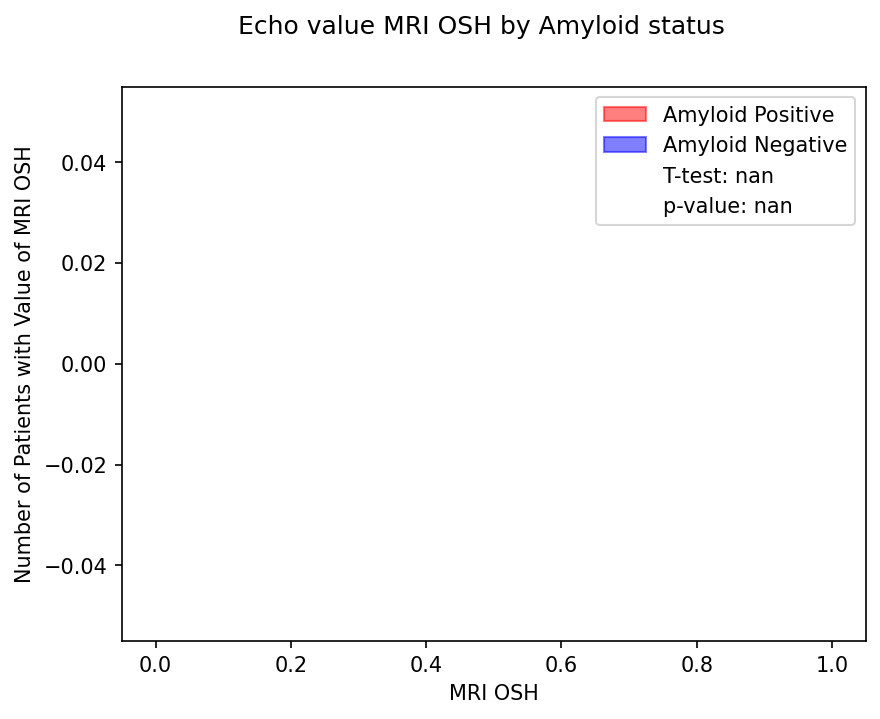

In [159]:
i = 0
for item in p_greater_than_005:
    #addition of a way to remove the missing or penalty values... penalty = -1

    dataPostive = df_ALPositive_Echo.loc[df_ALPositive_Echo[item] > penalty_echo].dropna(axis = 'index')
    dataNegative = df_ALNegative_Echo.loc[df_ALNegative_Echo[item] > penalty_echo].dropna(axis = 'index')

    fig, ax = plt.subplots()
    ax.hist(dataPostive[item], bins = 15, color = "red", alpha =0.5)
    ax.hist(dataNegative[item], bins = 15,  color = "blue", alpha = 0.5)
    ax.set_xlabel(item)
    ax.set_ylabel("Number of Patients with Value of " + item)
    amyloidpositive_patch = mpatches.Patch(color = 'red', alpha = 0.5, label = "Amyloid Positive")
    amyloidnegative_patch = mpatches.Patch(color = "blue", alpha = 0.5, label = "Amyloid Negative")
    stats_T_patch = mpatches.Patch(color = "white", label = "T-test: " + str(df_imagingValue_stats_2.at[item, 'statistic']))
    stats_pvalue_patch = mpatches.Patch(color = "white", label = "p-value: " + str(df_imagingValue_stats_2.at[item, 'pvalue']))
    ax.legend(handles = [amyloidpositive_patch, amyloidnegative_patch, stats_T_patch, stats_pvalue_patch])
    fig.suptitle("Echo value " + item + " by Amyloid status")

    fig_file_out = outputFiguresPath(fileName_header=fileNameHeader_all, fileName_mid= "phigh_" + str(i) + "_fig_" , 
                                 fileName_suff= fileNameSuffix, parent_dir=outputDir, folderName=folder_data_out)
    
    fig.savefig(fig_file_out, bbox_inches = "tight")
    i = i+1